# Equipo 21
## Integrantes:
1. José Arturo Valdivia Rivera - A01795395
2. Abraham Esses Cohen - A01018853
3. Diego Audiffred Mayoral - A01732823


# Avance 1: Análsis EDA (Exploración de datos)

In [1]:
# Carga de librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
# Lectura de datos
path = 'BD_consolidada.csv'
data = pd.read_csv(path)

## Análisis de dataframe

In [3]:
data.head(10)

id     codigo  empresa  \
0   2017eneroSANTA CRUZRestoGaseosas330NO RETORNABLE  2017enero  Nielsen   
1      2017eneroSANTA CRUZRestoGaseosas620RETORNABLE  2017enero  Nielsen   
2  2017eneroSANTA CRUZRestoGaseosas1000NO RETORNABLE  2017enero  Nielsen   
3  2017eneroSANTA CRUZRestoGaseosas2000NO RETORNABLE  2017enero  Nielsen   
4  2017eneroSANTA CRUZRestoGaseosas3000NO RETORNABLE  2017enero  Nielsen   
5  2017eneroSANTA CRUZRestoGaseosas3100NO RETORNABLE  2017enero  Nielsen   
6  2017eneroSANTA CRUZRestoAgua Plana600NO RETORN...  2017enero  Nielsen   
7  2017eneroSANTA CRUZRestoAgua Plana1000NO RETOR...  2017enero  Nielsen   
8  2017eneroSANTA CRUZRestoAgua Plana2000NO RETOR...  2017enero  Nielsen   
9  2017eneroSANTA CRUZRestoAgua Plana2200NO RETOR...  2017enero  Nielsen   

       mercado  anio    mes   operacion fab_nartd categoria_embol  tamanio  \
0  Tradicional  2017  enero  SANTA CRUZ     Resto        Gaseosas      330   
1  Tradicional  2017  enero  SANTA CRUZ     Resto        Gaseosas      620   
2  Tradicional  2017  enero  SANTA CRUZ     Resto        Gaseosas     1000   
3  Tradicional  2017  enero  SANTA CRUZ     Resto        Gaseosas     2000   
4  Tradicional  2017  enero  SANTA CRUZ     Resto        Gaseosas     3000   
5  Tradicional  2017  enero  SANTA CRUZ     Resto        Gaseosas     3100   
6  Tradicional  2017  enero  SANTA CRUZ     Resto      Agua Plana      600   
7  Tradicional  2017  enero  SANTA CRUZ     Resto      Agua Plana     1000   
8  Tradicional  2017  enero  SANTA CRUZ     Resto      Agua Plana     2000   
9  Tradicional  2017  enero  SANTA CRUZ     Resto      Agua Plana     2200   

   ... inflacion localidad caja_unitaria  cajas_fisicas  botellas  \
0  ...       NaN         0           0.0            0.0         0   
1  ...       NaN         0           0.0            0.0         0   
2  ...       NaN         0           0.0            0.0         0   
3  ...       NaN         0           0.0            0.0         0   
4  ...       NaN         0           0.0            0.0         0   
5  ...       NaN         0           0.0            0.0         0   
6  ...       NaN         0           0.0            0.0         0   
7  ...       NaN         0           0.0            0.0         0   
8  ...       NaN         0           0.0            0.0         0   
9  ...       NaN         0           0.0            0.0         0   

   ingreso_bruto  ingreso_facturado  ingreso_neto  descuento_calculado  \
0            0.0                0.0           0.0                  0.0   
1            0.0                0.0           0.0                  0.0   
2            0.0                0.0           0.0                  0.0   
3            0.0                0.0           0.0                  0.0   
4            0.0                0.0           0.0                  0.0   
5            0.0                0.0           0.0                  0.0   
6            0.0                0.0           0.0                  0.0   
7            0.0                0.0           0.0                  0.0   
8            0.0                0.0           0.0                  0.0   
9            0.0                0.0           0.0                  0.0   

   precio_embol  
0             0  
1             0  
2             0  
3             0  
4             0  
5             0  
6             0  
7          -     
8          -     
9          -     

[10 rows x 42 columns]

In [4]:
df = data.copy()  # Crear una copia del DataFrame original

In [5]:
df.drop(columns=['id','codigo'], inplace=True)

In [6]:
# Dimensiones del dataframe
print("Dimensiones (filas, columnas):", df.shape)

Dimensiones (filas, columnas): (63527, 40)


In [7]:
# Tipos de datos
print("\nTipos de datos por columna:")
print(df.dtypes)


Tipos de datos por columna:
empresa                                                     object
mercado                                                     object
anio                                                         int64
mes                                                         object
operacion                                                   object
fab_nartd                                                   object
categoria_embol                                             object
tamanio                                                      int64
retornabilidad                                              object
venta                                                       object
venta_pcs                                                   object
indice_general                                             float64
agricultura,_pecuario,_silvicultura,_caza_y_pesca          float64
petroleo_crudo_y_gas_natural                               float64
minerales_metálicos_y_no_metálico

In [8]:
# Columnas categoricas
object_cols = df.select_dtypes(include='object').columns.tolist()
object_cols

['empresa',
 'mercado',
 'mes',
 'operacion',
 'fab_nartd',
 'categoria_embol',
 'retornabilidad',
 'venta',
 'venta_pcs',
 'localidad',
 'precio_embol']

In [9]:
# Columnas numéricas
numeric_cols = df.select_dtypes(include=['number']).columns.tolist()
numeric_cols

['anio',
 'tamanio',
 'indice_general',
 'agricultura,_pecuario,_silvicultura,_caza_y_pesca',
 'petroleo_crudo_y_gas_natural',
 'minerales_metálicos_y_no_metálicos',
 'industria_manufacturera',
 'alimentos,_bebidas_y_tabaco',
 'otras_industrias',
 'electricidad,_gas_y_agua',
 'construccion',
 'comercio',
 'transporte_y_almacenamiento',
 'comunicaciones',
 'establecimientos_financieros,_seguros,_bienes_inmuebles',
 'servicios_financieros',
 'servicios_a_las_empresas',
 'propiedad_de_vivienda',
 'servicios_de_la_administración_pública',
 'otros_servicios',
 'servicios_bancarios_imputados',
 'inflacion',
 'caja_unitaria',
 'cajas_fisicas',
 'botellas',
 'ingreso_bruto',
 'ingreso_facturado',
 'ingreso_neto',
 'descuento_calculado']

In [10]:
# Estadísticas descriptivas de las columnas numéricas
df[numeric_cols].describe().T

count          mean  \
anio                                                63527.0   2020.996427   
tamanio                                             63527.0   1314.351740   
indice_general                                      58194.0    315.427217   
agricultura,_pecuario,_silvicultura,_caza_y_pesca   58194.0    276.208008   
petroleo_crudo_y_gas_natural                        58194.0    314.742931   
minerales_metálicos_y_no_metálicos                  58194.0    240.031034   
industria_manufacturera                             58194.0    304.545972   
alimentos,_bebidas_y_tabaco                         58194.0    365.631129   
otras_industrias                                    58194.0    253.764929   
electricidad,_gas_y_agua                            58194.0    442.454137   
construccion                                        58194.0    409.944071   
comercio                                            58194.0    284.962509   
transporte_y_almacenamiento                         58194.0    338.396242   
comunicaciones                                      58194.0    639.876001   
establecimientos_financieros,_seguros,_bienes_i...  58194.0    402.577092   
servicios_financieros                               58194.0   1095.372781   
servicios_a_las_empresas                            58194.0    385.629365   
propiedad_de_vivienda                               58194.0    211.271017   
servicios_de_la_administración_pública              58194.0    337.039048   
otros_servicios                                     58194.0    245.449775   
servicios_bancarios_imputados                       58194.0   1025.684268   
inflacion                                           56727.0      3.332896   
caja_unitaria                                       63527.0   3133.626749   
cajas_fisicas                                       63527.0   1566.738068   
botellas                                            63527.0  11039.077495   
ingreso_bruto                                       63527.0  65818.121861   
ingreso_facturado                                   63527.0  70903.556893   
ingreso_neto                                        63527.0  63805.376612   
descuento_calculado                                 63527.0   2012.745249   

                                                              std  \
anio                                                     2.527512   
tamanio                                               1302.245152   
indice_general                                          25.806117   
agricultura,_pecuario,_silvicultura,_caza_y_pesca       79.275942   
petroleo_crudo_y_gas_natural                            63.769193   
minerales_metálicos_y_no_metálicos                      36.217410   
industria_manufacturera                                 34.597525   
alimentos,_bebidas_y_tabaco                             37.130874   
otras_industrias                                        38.844033   
electricidad,_gas_y_agua                                81.166585   
construccion                                           180.807691   
comercio                                                36.469287   
transporte_y_almacenamiento                             50.420359   
comunicaciones                                          98.004150   
establecimientos_financieros,_seguros,_bienes_i...      36.134802   
servicios_financieros                                  152.215023   
servicios_a_las_empresas                                65.138066   
propiedad_de_vivienda                                   14.603045   
servicios_de_la_administración_pública                  33.759051   
otros_servicios                                         35.591849   
servicios_bancarios_imputados                          167.806683   
inflacion                                                3.803674   
caja_unitaria                                        22503.562636   
cajas_fisicas                                         8528.203955   
botellas          

Acciones a realizar en columnas numéricas:
- La columna anio, debe convertirse en categórica.

In [11]:
# Estadísticas descriptivas de las columnas categóricas
df[object_cols].describe().T

count unique            top   freq
empresa          63527      2        Nielsen  58194
mercado          63527      1    Tradicional  63527
mes              63527     12          marzo   6268
operacion        63527      8         LA PAZ  26599
fab_nartd        63527      7          Resto  30938
categoria_embol  63527      7       Gaseosas  21539
retornabilidad   63527      2  NO RETORNABLE  56811
venta            63527  46251           -       795
venta_pcs        63527  19396           -       811
localidad        63527     10              0  54615
precio_embol     63527    581           -     54608

In [12]:
# Frecuencias de las columnas categóricas
for c in object_cols:
    print(f"\nFrecuencias en {c}:")
    print(df[c].value_counts(dropna=False).head(10))
    print("-----------------------------")



Frecuencias en empresa:
empresa
Nielsen    58194
Premise     5333
Name: count, dtype: int64
-----------------------------

Frecuencias en mercado:
mercado
Tradicional    63527
Name: count, dtype: int64
-----------------------------

Frecuencias en mes:
mes
marzo         6268
abril         6252
febrero       6127
enero         6002
noviembre     5000
diciembre     4911
octubre       4905
septiembre    4839
agosto        4835
julio         4820
Name: count, dtype: int64
-----------------------------

Frecuencias en operacion:
operacion
LA PAZ        26599
RESTO         14730
SANTA CRUZ    10052
COCHABAMBA     9908
SUCRE           600
POTOSI          593
ORURO           592
TARIJA          453
Name: count, dtype: int64
-----------------------------

Frecuencias en fab_nartd:
fab_nartd
Resto         30938
EMBOL         14504
LA CASCADA     7103
Pil            4762
Pepsi          4131
Embol          1329
La Cascada      760
Name: count, dtype: int64
-----------------------------

Frecuenci

Acciones a realizar en columnas categóricas
Se debe hacer ajustes en variables numéricas que están como categoricas
- venta
- venta_pcs
- precio_embol

La variable "mercado" tiene un único valor, por lo que no aporta valor al análisis

En la variable "localidad" se encuentran valores en 0, se deben analizar y reclasificar. -- Se hace filtrado desde inicio

En la columna categoria_embol, hay 2 veces el valor sports, hay que estandarizarlo.

En la columna fab_nartd, hay valores en mayúsculas y minúsculas con los mismos valores (p.e. LA CASCADA y La Cascada), hay que estandarizarlos.

In [13]:
def convert_object_to_numeric(df, columns):
    """
    Convierte las columnas especificadas de tipo object a numérico en el DataFrame dado.
    Los valores no convertibles se establecerán como NaN.
    """
    for col in columns:
        df[col] = pd.to_numeric(df[col].str.replace(',', '').replace('-', np.nan), errors='coerce')
    return df

def convert_numeric_to_object(df, columns):
    """
    Convierte las columnas especificadas de tipo numérico a object (string) en el DataFrame dado.
    """
    for col in columns:
        df[col] = df[col].astype(str)
    return df

In [14]:
columns_to_convert_to_numeric = ['venta', 'venta_pcs', 'precio_embol']
columns_to_convert_to_object = ['anio']
df = convert_object_to_numeric(df, columns_to_convert_to_numeric)
df = convert_numeric_to_object(df, columns_to_convert_to_object)

- Otros pasos
* Agregar variables calculadas
1. precio_competencia
2. costo
3. utilidad
4. margen

In [15]:
df['precio_competencia'] = df['venta'] / df['venta_pcs']
df = df.dropna(subset=['precio_competencia'])

In [16]:
df.drop(columns=['mercado'], inplace=True) # Eliminar columnas innecesarias

In [17]:
# Columnas categoricas
object_cols = df.select_dtypes(include='object').columns.tolist()
object_cols

['empresa',
 'anio',
 'mes',
 'operacion',
 'fab_nartd',
 'categoria_embol',
 'retornabilidad',
 'localidad']

In [18]:
# Columnas numéricas
numeric_cols = df.select_dtypes(include=['number']).columns.tolist()
numeric_cols

['tamanio',
 'venta',
 'venta_pcs',
 'indice_general',
 'agricultura,_pecuario,_silvicultura,_caza_y_pesca',
 'petroleo_crudo_y_gas_natural',
 'minerales_metálicos_y_no_metálicos',
 'industria_manufacturera',
 'alimentos,_bebidas_y_tabaco',
 'otras_industrias',
 'electricidad,_gas_y_agua',
 'construccion',
 'comercio',
 'transporte_y_almacenamiento',
 'comunicaciones',
 'establecimientos_financieros,_seguros,_bienes_inmuebles',
 'servicios_financieros',
 'servicios_a_las_empresas',
 'propiedad_de_vivienda',
 'servicios_de_la_administración_pública',
 'otros_servicios',
 'servicios_bancarios_imputados',
 'inflacion',
 'caja_unitaria',
 'cajas_fisicas',
 'botellas',
 'ingreso_bruto',
 'ingreso_facturado',
 'ingreso_neto',
 'descuento_calculado',
 'precio_embol',
 'precio_competencia']

In [19]:
df[numeric_cols].describe().T

/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:52: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


count           mean  \
tamanio                                             61552.0    1319.428045   
venta                                               61552.0  360064.043345   
venta_pcs                                           61552.0   13642.016880   
indice_general                                      56269.0     315.321324   
agricultura,_pecuario,_silvicultura,_caza_y_pesca   56269.0     276.317711   
petroleo_crudo_y_gas_natural                        56269.0     315.288654   
minerales_metálicos_y_no_metálicos                  56269.0     240.046649   
industria_manufacturera                             56269.0     304.437562   
alimentos,_bebidas_y_tabaco                         56269.0     365.421922   
otras_industrias                                    56269.0     253.740313   
electricidad,_gas_y_agua                            56269.0     441.921018   
construccion                                        56269.0     410.090891   
comercio                                            56269.0     284.909862   
transporte_y_almacenamiento                         56269.0     338.231289   
comunicaciones                                      56269.0     638.900304   
establecimientos_financieros,_seguros,_bienes_i...  56269.0     402.349066   
servicios_financieros                               56269.0    1094.512161   
servicios_a_las_empresas                            56269.0     385.728662   
propiedad_de_vivienda                               56269.0     211.083629   
servicios_de_la_administración_pública              56269.0     336.853690   
otros_servicios                                     56269.0     245.210971   
servicios_bancarios_imputados                       56269.0    1025.345046   
inflacion                                           54890.0       3.352124   
caja_unitaria                                       61552.0    3232.559566   
cajas_fisicas                                       61552.0    1615.917039   
botellas                                            61552.0   11386.705290   
ingreso_bruto                                       61552.0   67888.259814   
ingreso_facturado                                   61552.0   73138.383510   
ingreso_neto                                        61552.0   65812.446907   
descuento_calculado                                 61552.0    2075.812907   
precio_embol                                         8879.0       5.816566   
precio_competencia                                  61552.0            NaN   

                                                             std         min  \
tamanio                                             1.300166e+03    3.000000   
venta                                               1.039968e+06   -4.000000   
venta_pcs                                           4.271511e+04   -3.000000   
indice_general                                      2.582801e+01  230.710517   
agricultura,_pecuario,_silvicultura,_caza_y_pesca   7.924190e+01  152.343626   
petroleo_crudo_y_gas_natural                        6.374544e+01  169.256058   
minerales_metálicos_y_no_metálicos                  3.624792e+01   13.238288   
industria_manufacturera                             3.460669e+01  201.705353   
alimentos,_bebidas_y_tabaco                         3.712825e+01  289.740200   
otras_industrias                                    3.887109e+01  116.356689   
electricidad,_gas_y_agua                            8.110553e+01  307.256714   
construccion                                        1.809156e+02  140.620564   
comercio                                            3.647546e+01  209.334465   
transporte_y_almacenamiento                         5.038632e+01  119.533704   
comunicaciones                                      9.744361e+01  404.320436   
establecimientos_financieros,_seguros,_bienes_i...  3.609096e+01  318.555048   
servicios_financieros                               1.519218e+02  724.531738   
servicios_a_las_empresas               

In [20]:
df[object_cols].describe().T

count unique            top   freq
empresa          61552      2        Nielsen  56269
anio             61552      9           2023   7762
mes              61552     12          marzo   6112
operacion        61552      8         LA PAZ  26408
fab_nartd        61552      7          Resto  29629
categoria_embol  61552      7       Gaseosas  21155
retornabilidad   61552      2  NO RETORNABLE  55021
localidad        61552     10              0  52680

In [21]:
# Frecuencias de las columnas categóricas
for c in object_cols:
    print(f"\nFrecuencias en {c}:")
    print(df[c].value_counts(dropna=False).head(10))
    print("-----------------------------")



Frecuencias en empresa:
empresa
Nielsen    56269
Premise     5283
Name: count, dtype: int64
-----------------------------

Frecuencias en anio:
anio
2023    7762
2022    7473
2024    7462
2019    7037
2018    7009
2021    6886
2017    6662
2020    5978
2025    5283
Name: count, dtype: int64
-----------------------------

Frecuencias en mes:
mes
marzo         6112
abril         6076
febrero       5974
enero         5693
noviembre     4830
diciembre     4761
octubre       4740
septiembre    4710
agosto        4688
julio         4672
Name: count, dtype: int64
-----------------------------

Frecuencias en operacion:
operacion
LA PAZ        26408
RESTO         13134
SANTA CRUZ     9988
COCHABAMBA     9832
POTOSI          588
ORURO           586
SUCRE           580
TARIJA          436
Name: count, dtype: int64
-----------------------------

Frecuencias en fab_nartd:
fab_nartd
Resto         29629
EMBOL         14354
LA CASCADA     6790
Pil            4649
Pepsi          4045
Embol          1

In [22]:
df['categoria_embol'].unique()

array(['Gaseosas', 'Agua Plana', 'Nectares', 'FW +Still', 'Sports',
       'Energéticas', 'sports'], dtype=object)

In [23]:
def standardize_columns(df):
    """
    - Normaliza nombres de columnas a formato snake_case
    - Estandariza valores en 'categoria_embol' y 'fab_nartd'
    """
    # Estandarizar valores en categoria_embol
    if 'categoria_embol' in df.columns:
        df['categoria_embol'] = df['categoria_embol'].str.strip().str.lower().str.title()
    # Estandarizar valores en fab_nartd
    if 'fab_nartd' in df.columns:
        df['fab_nartd'] = df['fab_nartd'].str.strip().str.title()
    return df


In [24]:
df_ = standardize_columns(df)

In [25]:
df_['categoria_embol'].unique()

array(['Gaseosas', 'Agua Plana', 'Nectares', 'Fw +Still', 'Sports',
       'Energéticas'], dtype=object)

In [26]:
df_['fab_nartd'].unique()

array(['Resto', 'Embol', 'La Cascada', 'Pepsi', 'Pil'], dtype=object)

In [27]:
df = df_.copy()

In [28]:
missing_summary = pd.DataFrame({
    "column": df.columns,
    "missing_count": df.isna().sum(),
    "missing_pct": round(df.isna().sum() / len(df) * 100, 2)
}).sort_values("missing_pct", ascending=False)

print("\n--- Valores faltantes ---")
missing_summary[missing_summary["missing_count"] > 0]



--- Valores faltantes ---


column  \
precio_embol                                                                             precio_embol   
inflacion                                                                                   inflacion   
petroleo_crudo_y_gas_natural                                             petroleo_crudo_y_gas_natural   
minerales_metálicos_y_no_metálicos                                 minerales_metálicos_y_no_metálicos   
indice_general                                                                         indice_general   
agricultura,_pecuario,_silvicultura,_caza_y_pesca   agricultura,_pecuario,_silvicultura,_caza_y_pesca   
alimentos,_bebidas_y_tabaco                                               alimentos,_bebidas_y_tabaco   
industria_manufacturera                                                       industria_manufacturera   
otros_servicios                                                                       otros_servicios   
servicios_bancarios_imputados                                           servicios_bancarios_imputados   
servicios_de_la_administración_pública                         servicios_de_la_administración_pública   
servicios_a_las_empresas                                                     servicios_a_las_empresas   
propiedad_de_vivienda                                                           propiedad_de_vivienda   
servicios_financieros                                                           servicios_financieros   
electricidad,_gas_y_agua                                                     electricidad,_gas_y_agua   
otras_industrias                                                                     otras_industrias   
transporte_y_almacenamiento                                               transporte_y_almacenamiento   
comunicaciones                                                                         comunicaciones   
construccion                                                                             construccion   
comercio                                                                                     comercio   
establecimientos_financieros,_seguros,_bienes_i...  establecimientos_financieros,_seguros,_bienes_...   

                                                    missing_count  missing_pct  
precio_embol                                                52673        85.57  
inflacion                                                    6662        10.82  
petroleo_crudo_y_gas_natural                                 5283         8.58  
minerales_metálicos_y_no_metálicos                           5283         8.58  
indice_general                                               5283         8.58  
agricultura,_pecuario,_silvicultura,_caza_y_pesca            5283         8.58  
alimentos,_bebidas_y_tabaco                                  5283         8.58  
industria_manufacturera                                      5283         8.58  
otros_servicios                                              5283         8.58  
servicios_bancarios_imputados                                5283         8.58  
servicios_de_la_administración_pública                       5283         8.58  
servicios_a_las_empresas                                     5283         8.58  
propiedad_de_vivienda                                        5283         8.58  
servicios_financieros                                        5283         8.58  
electricidad,_gas_y_agua                                     5283         8.58  
otras_industrias                                             5283         8.58  
transporte_y_almacenamiento                                  5283         8.58  
comunicaciones                                               5283         8.58  
construccion                                                 5283         8.58  
comercio                                                     5283         8.58  
establecimientos_financieros,_seguros,_bienes_i...           5283         8.58

In [29]:
# Cardinalidad de variables categoricas
cat_vars = df.select_dtypes(include="object").nunique()
cat_vars.sort_values(ascending=False)

mes                12
localidad          10
anio                9
operacion           8
categoria_embol     6
fab_nartd           5
empresa             2
retornabilidad      2
dtype: int64

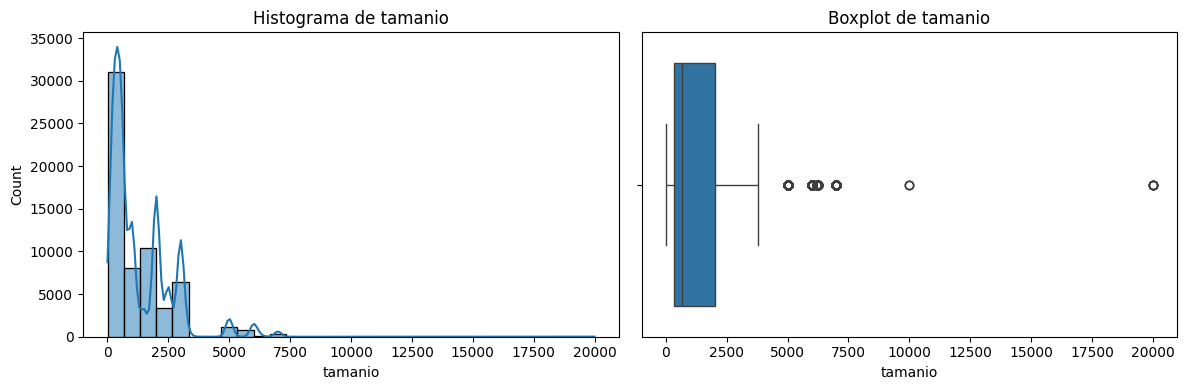

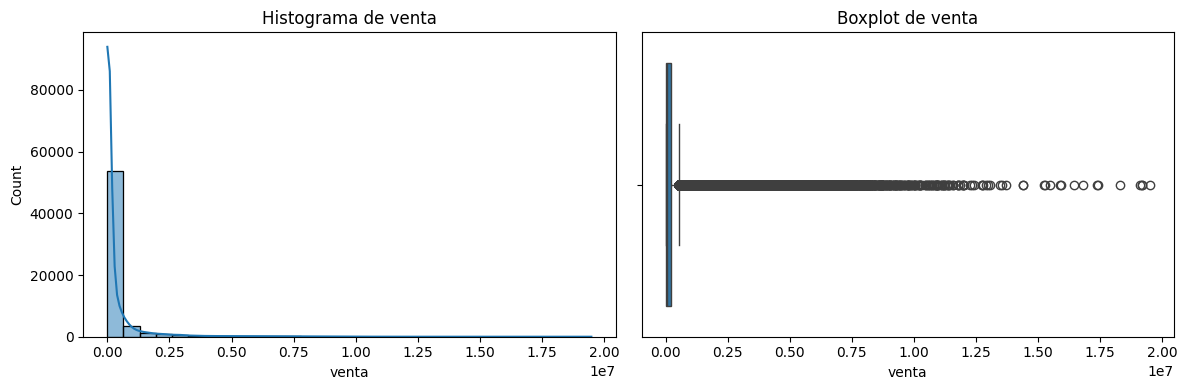

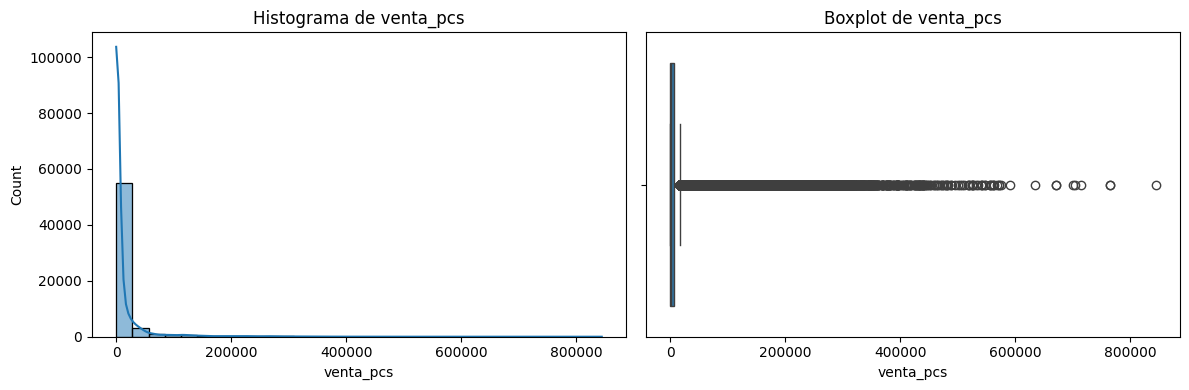

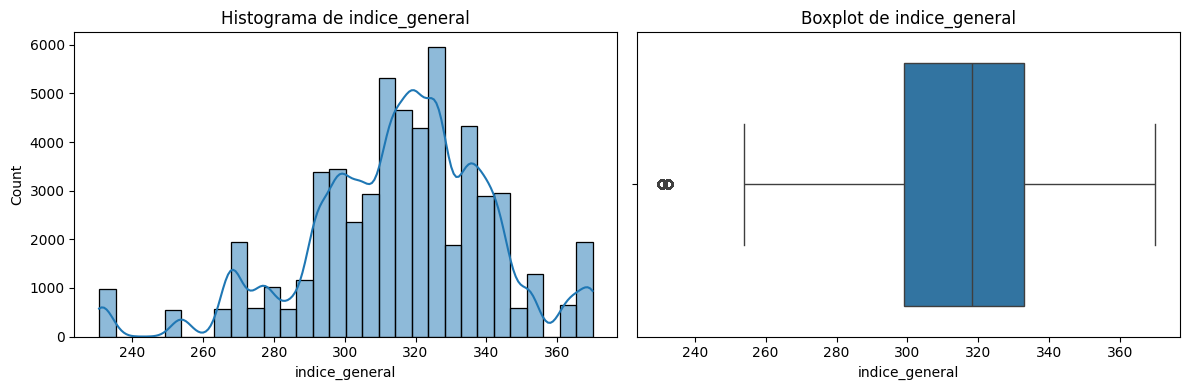

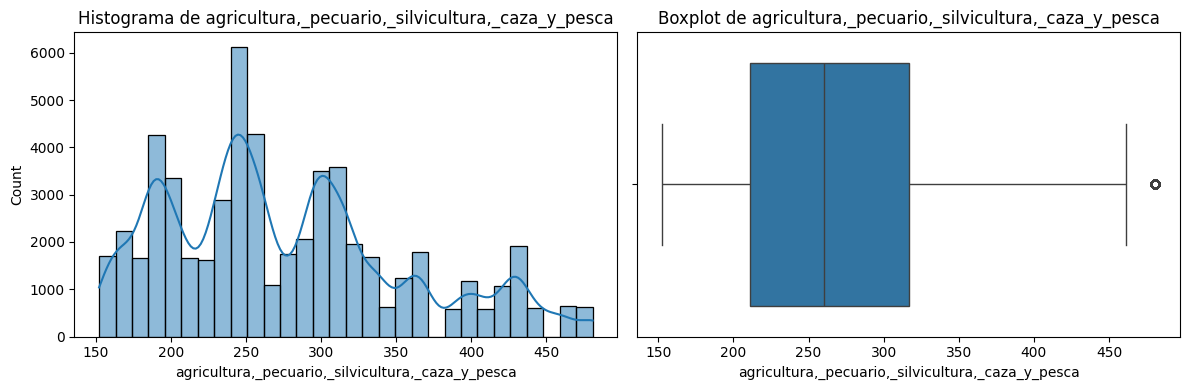

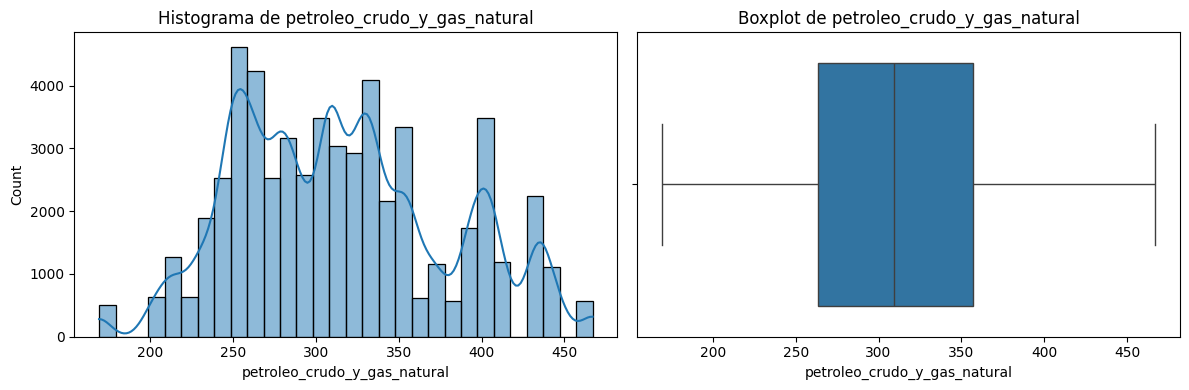

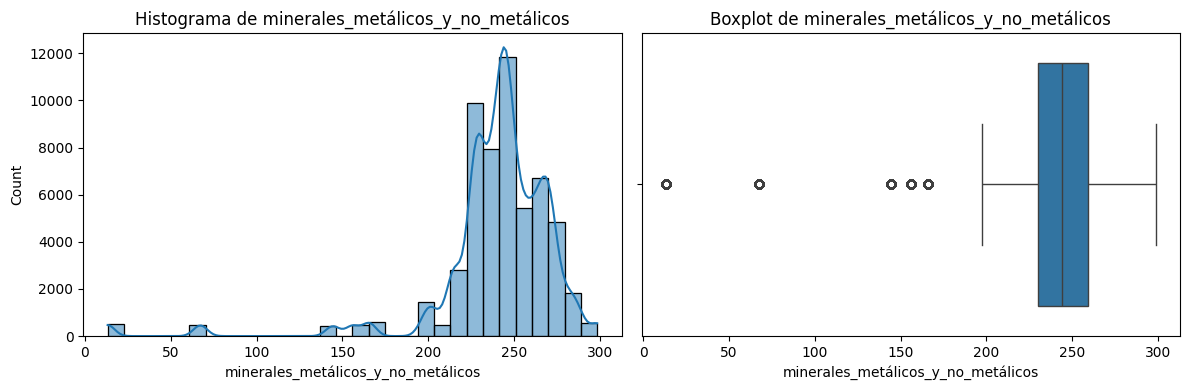

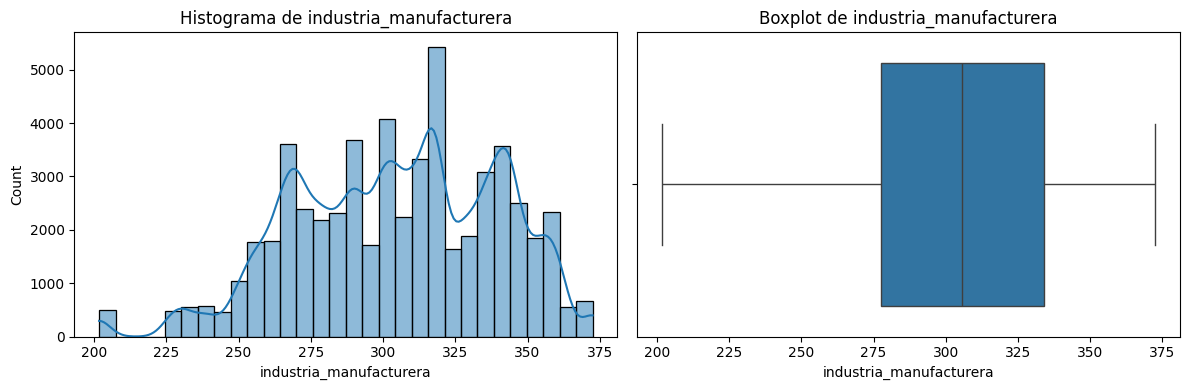

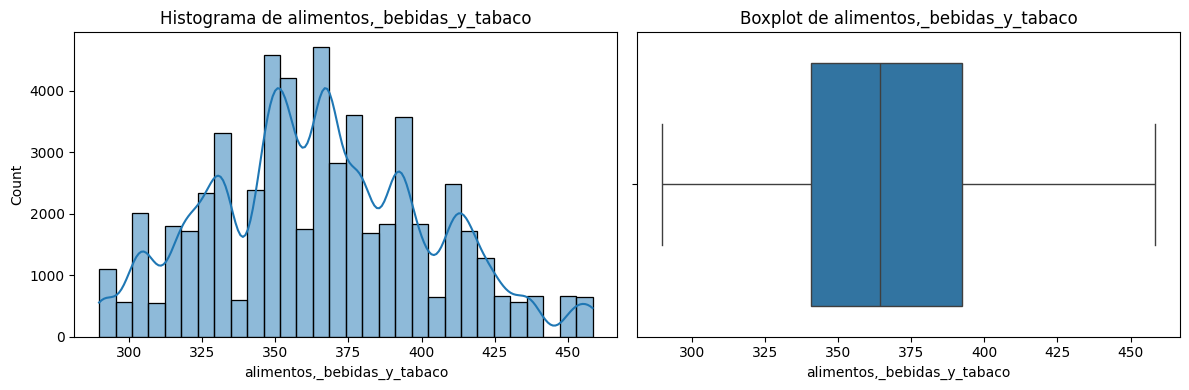

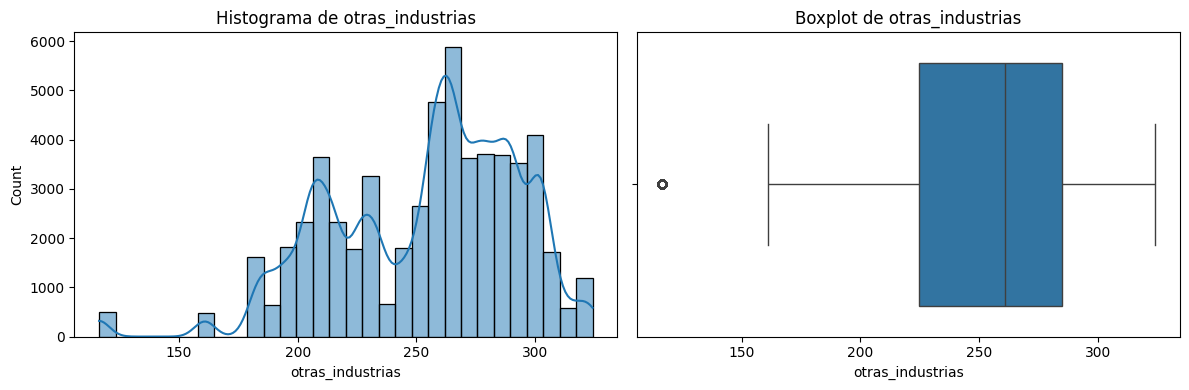

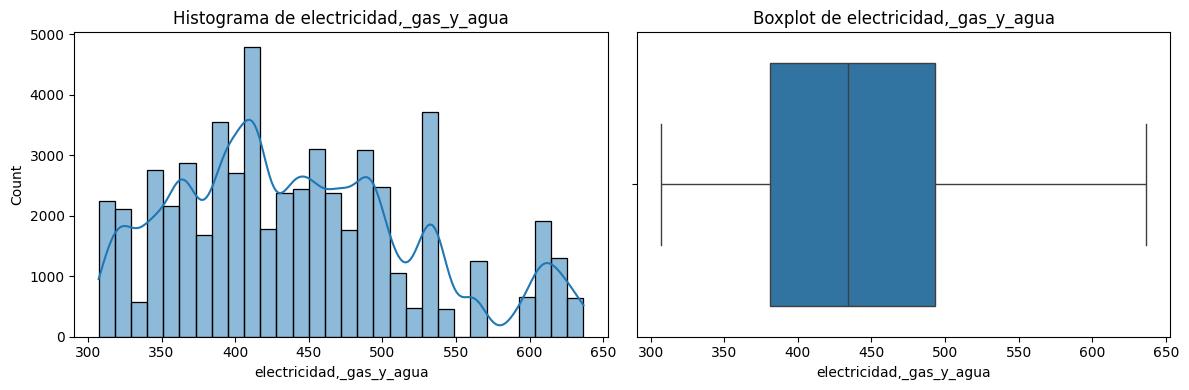

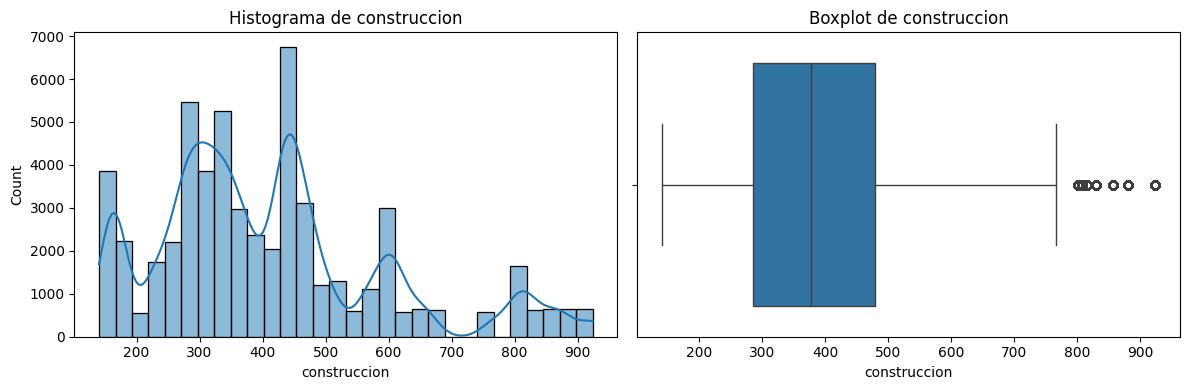

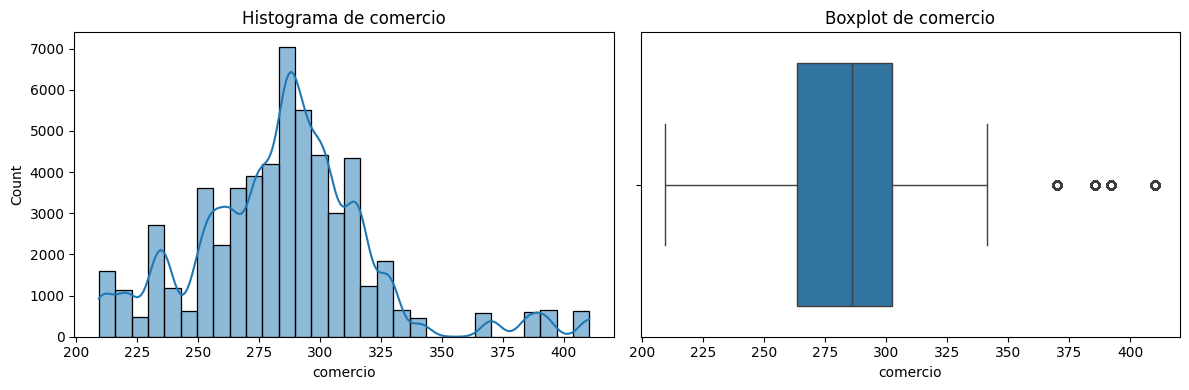

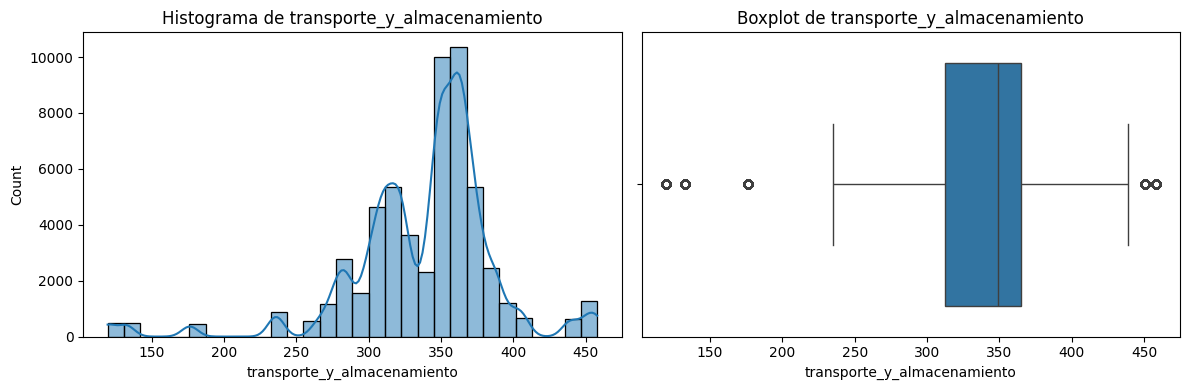

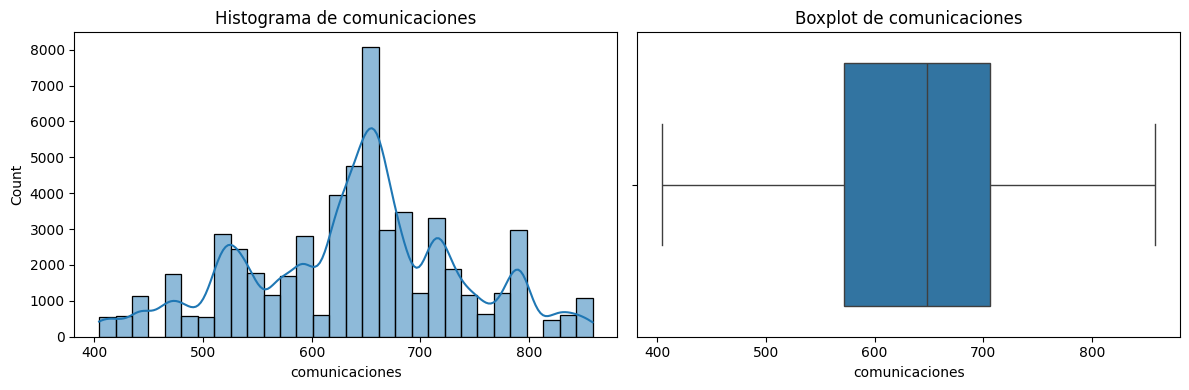

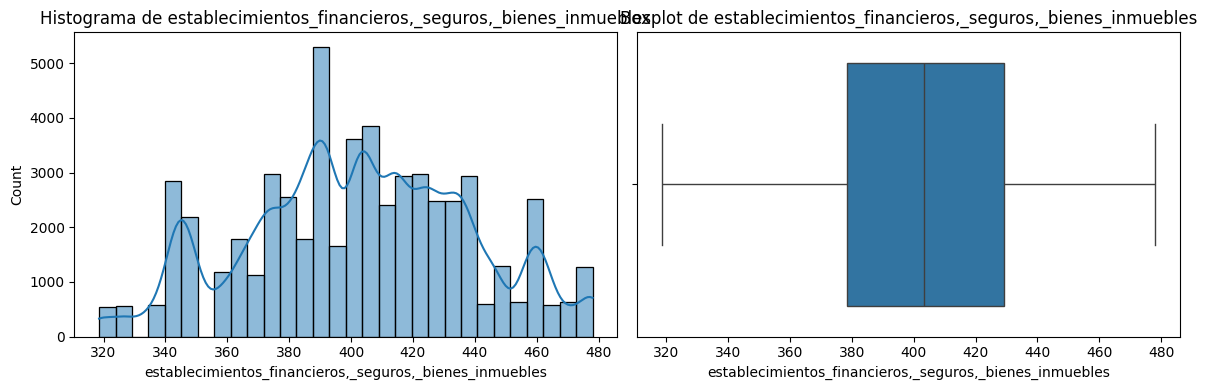

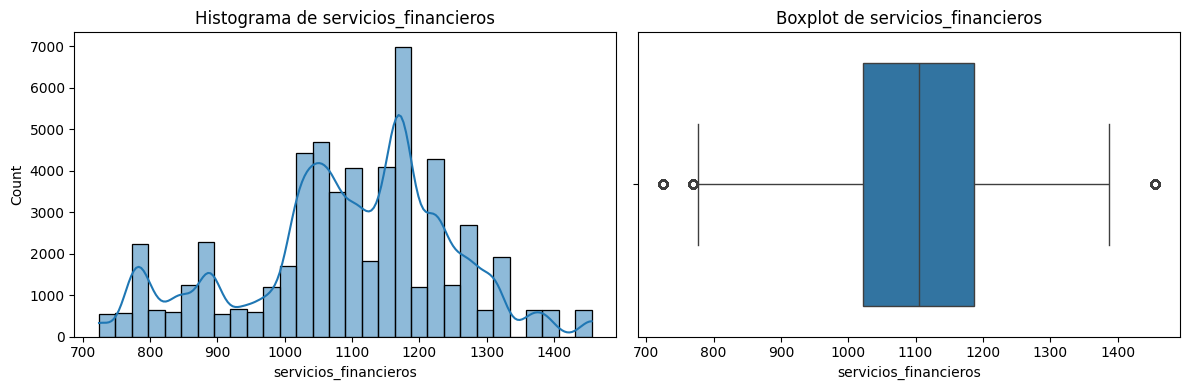

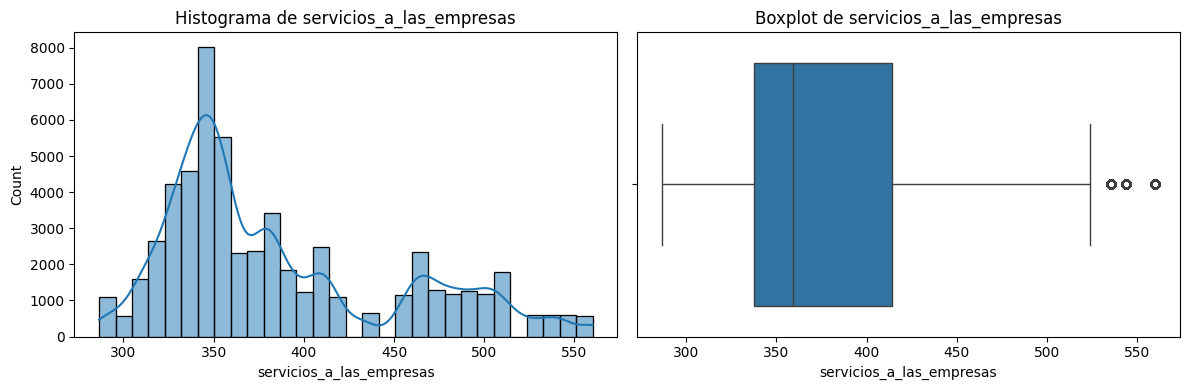

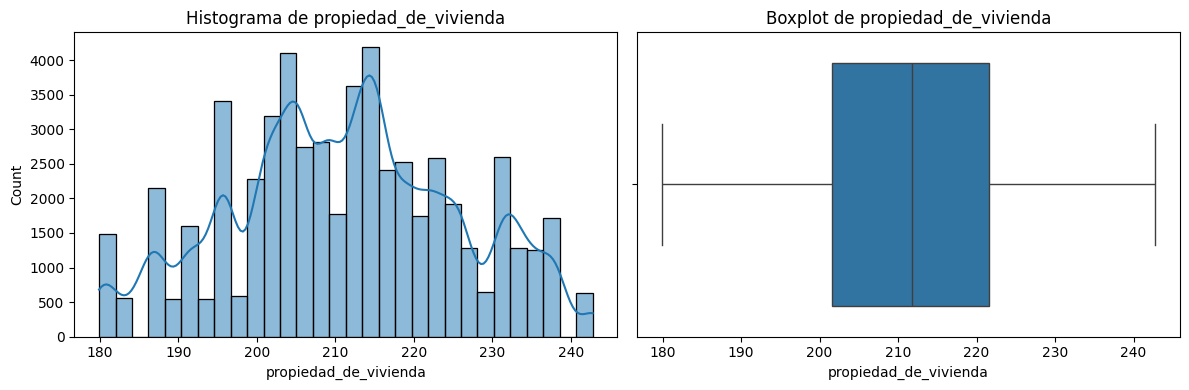

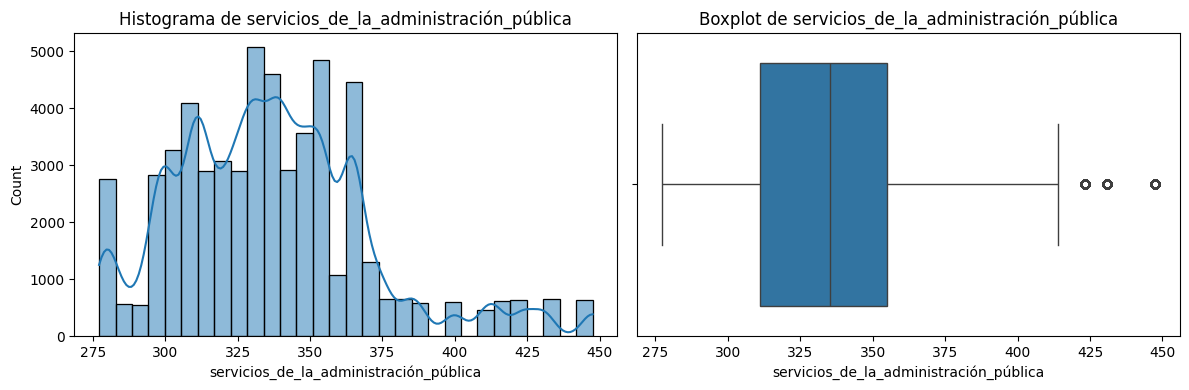

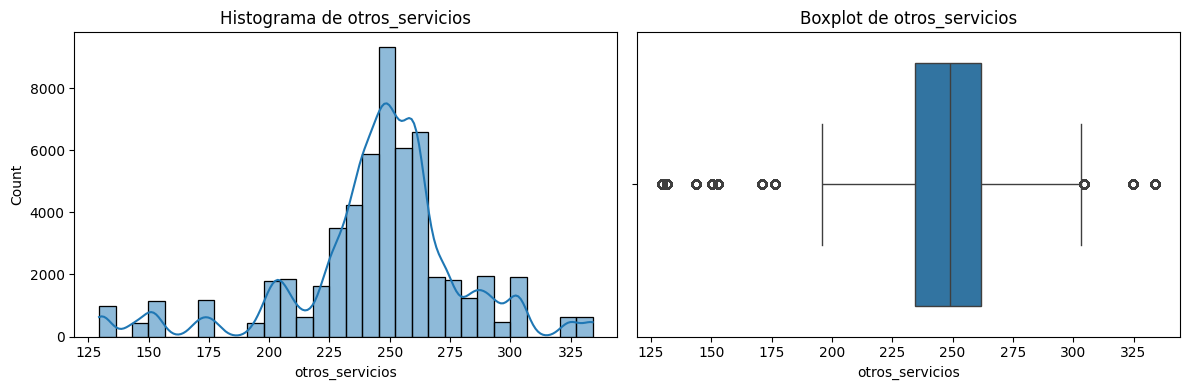

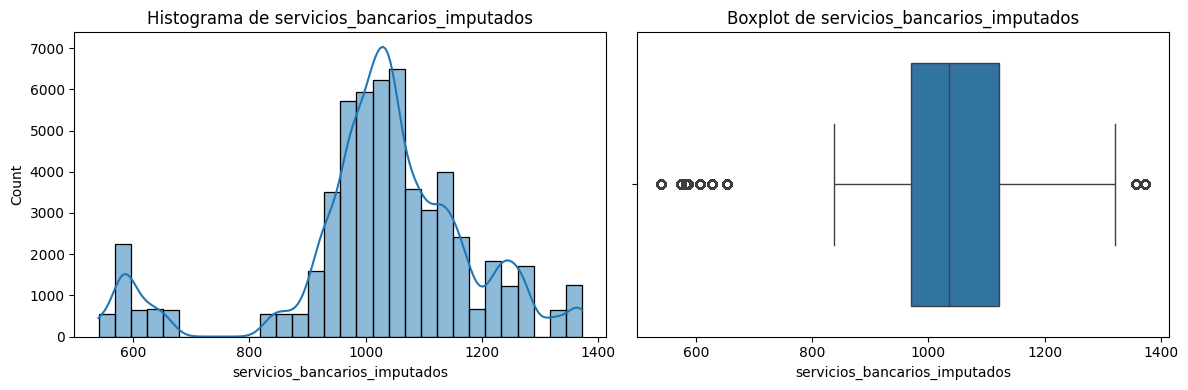

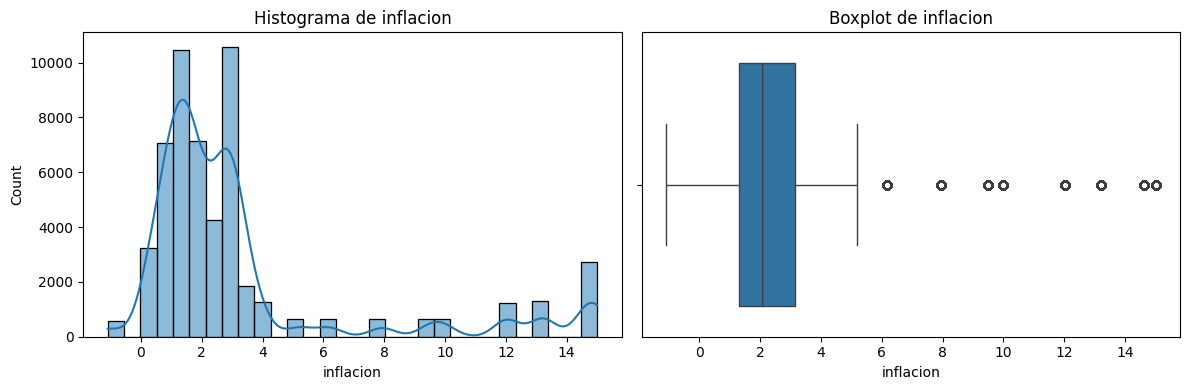

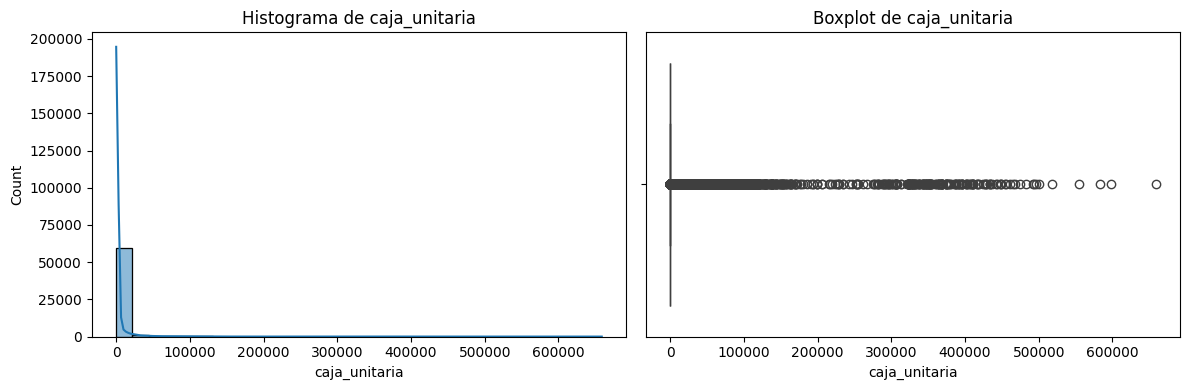

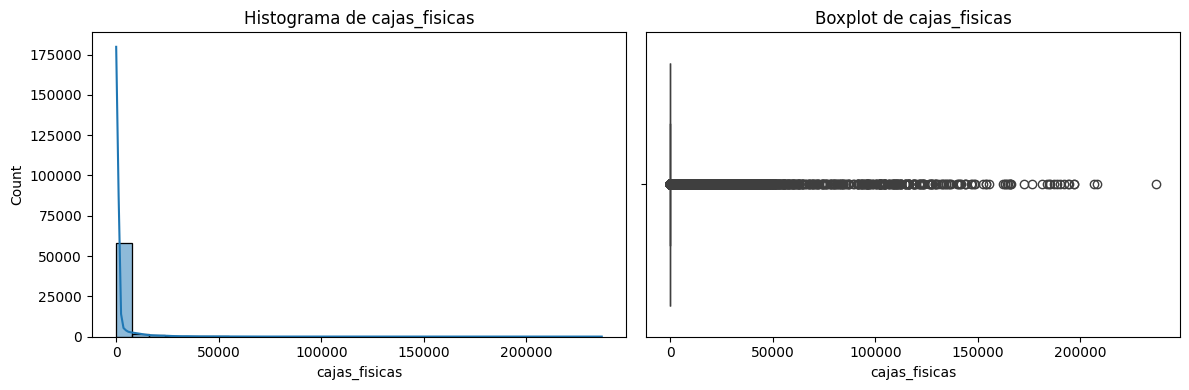

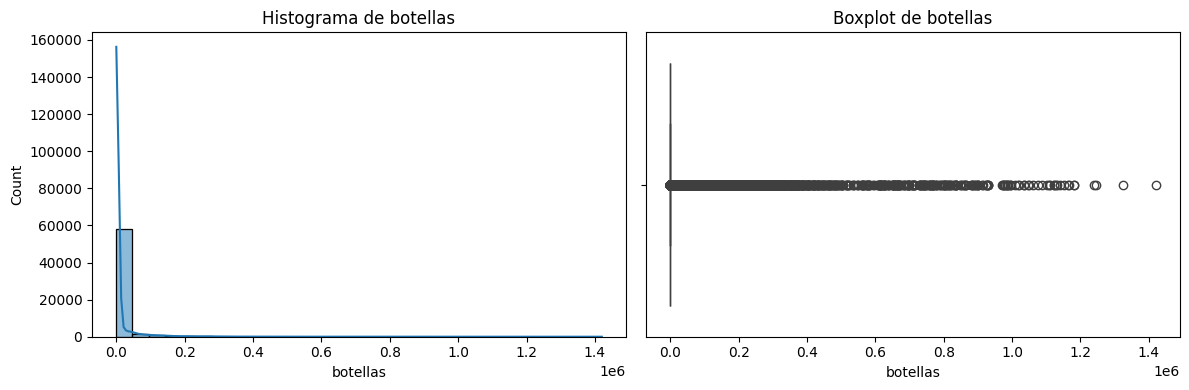

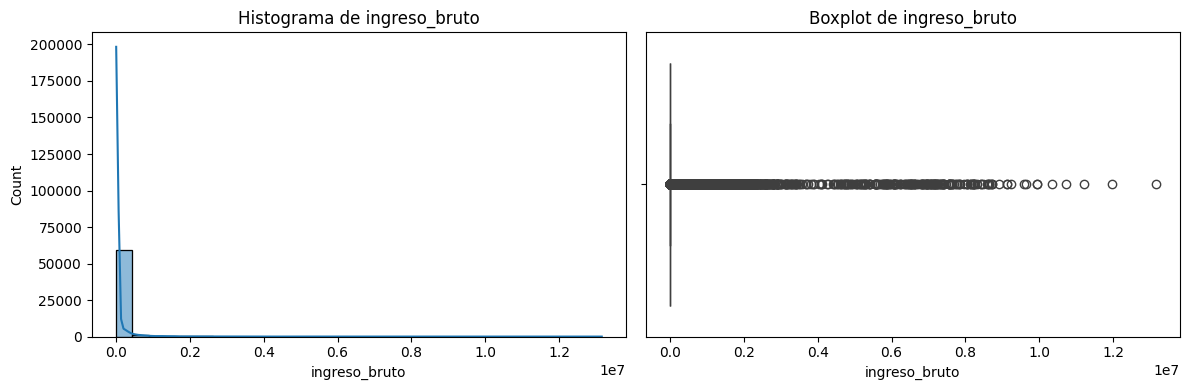

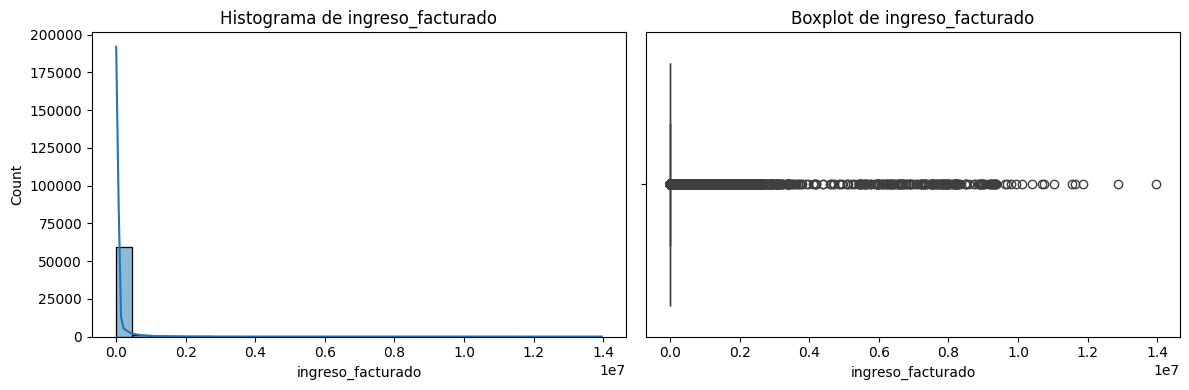

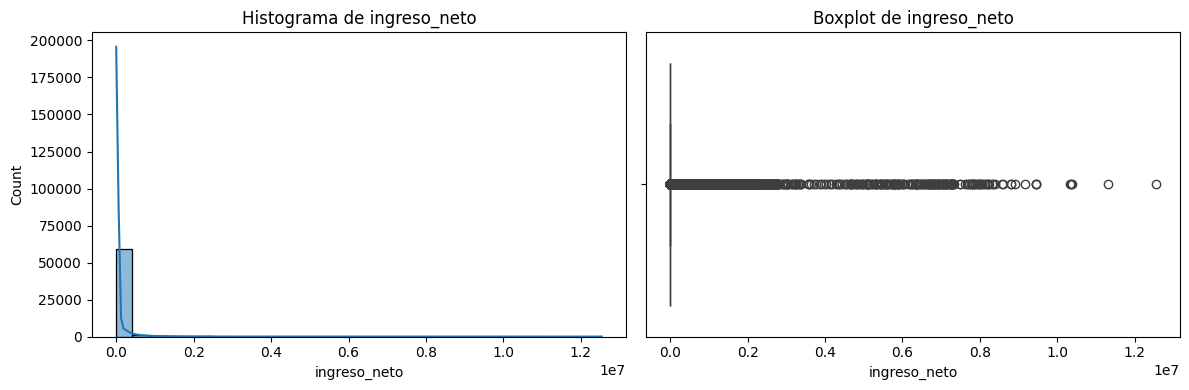

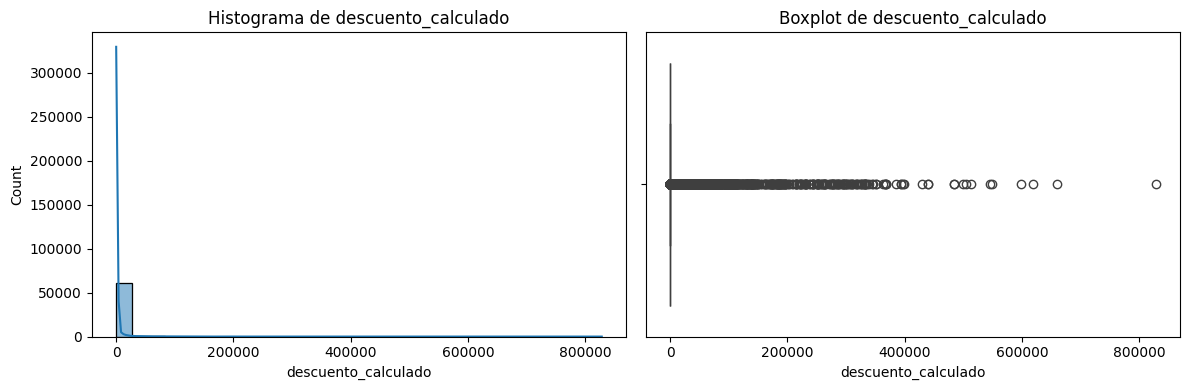

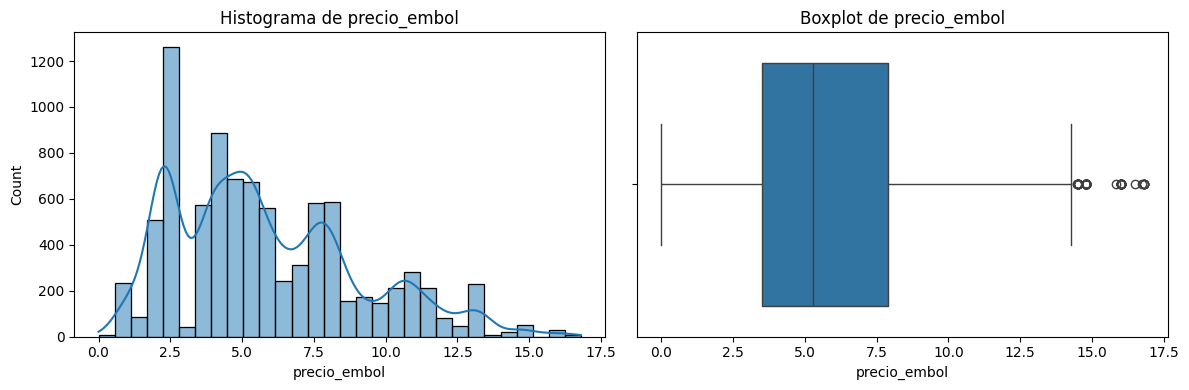

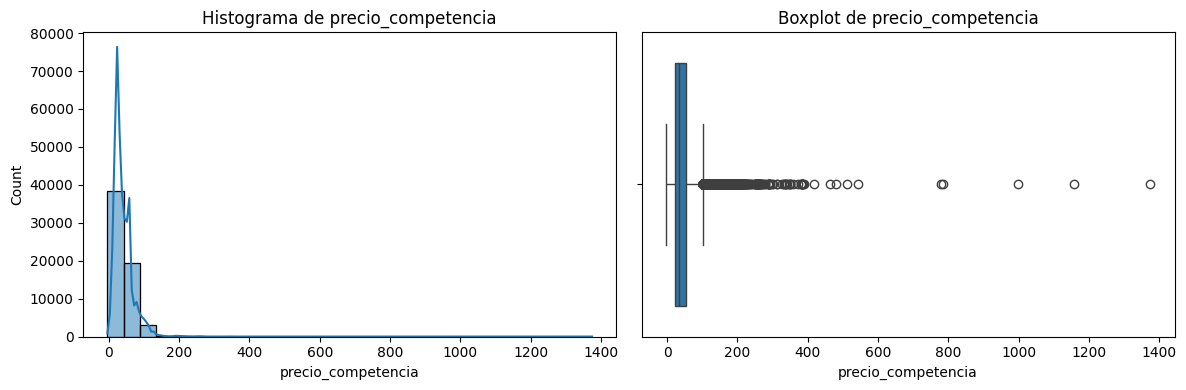

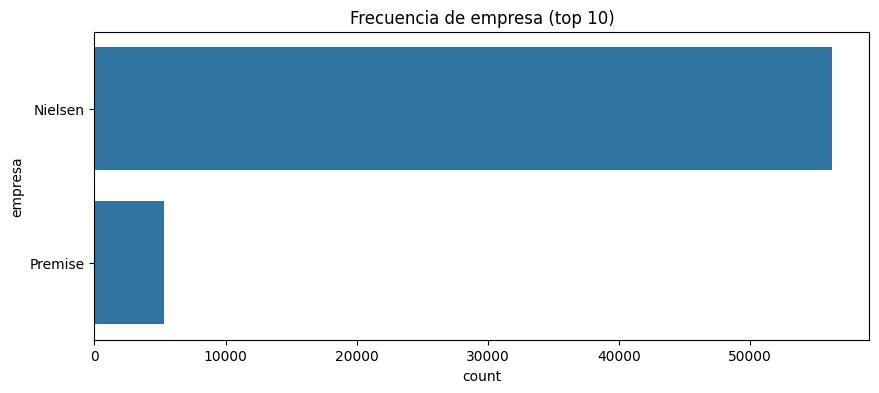

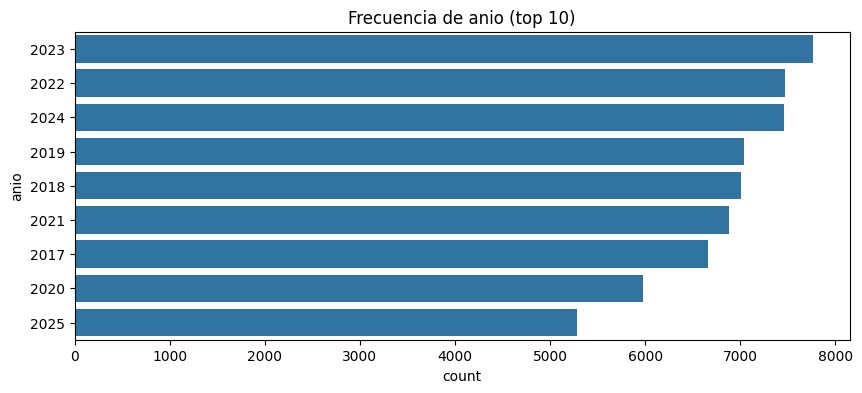

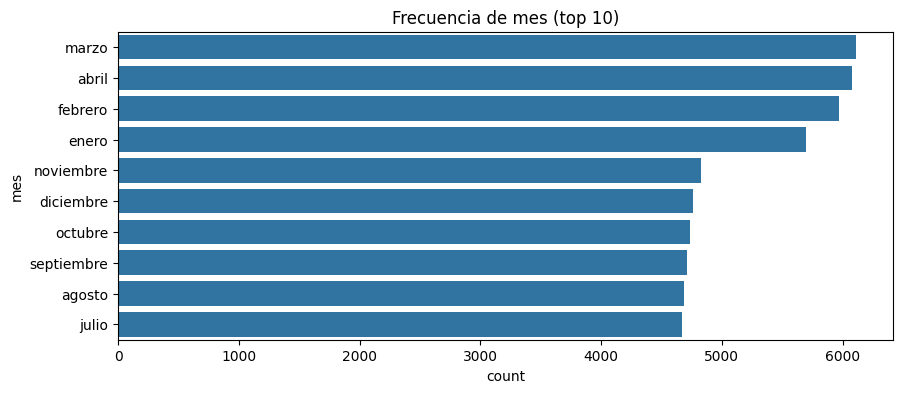

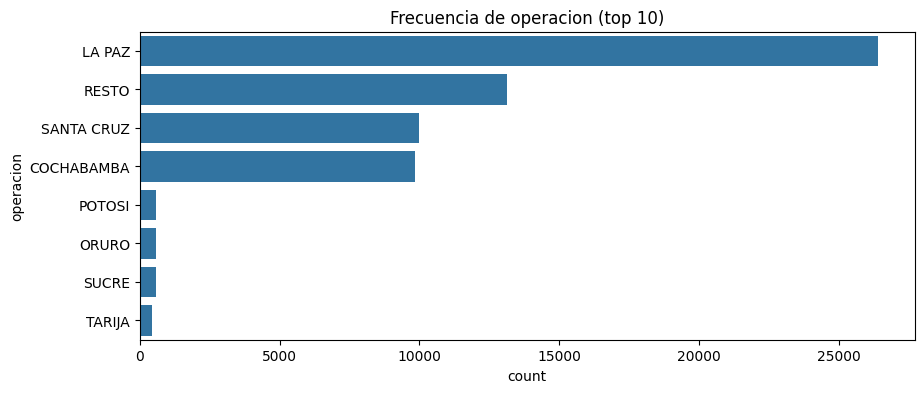

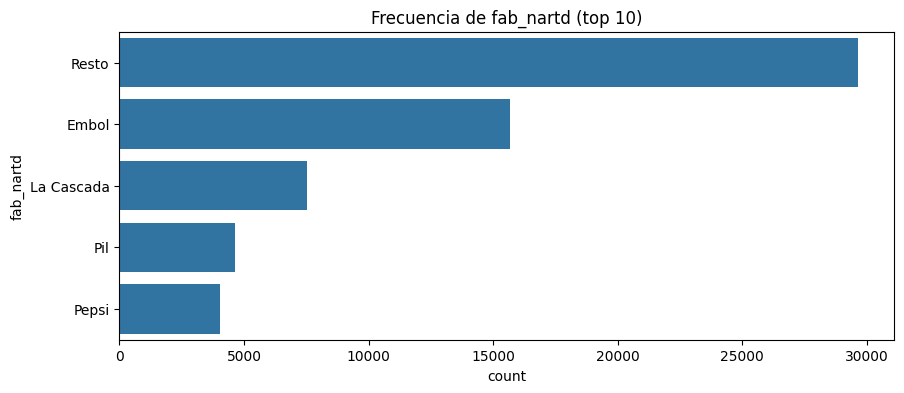

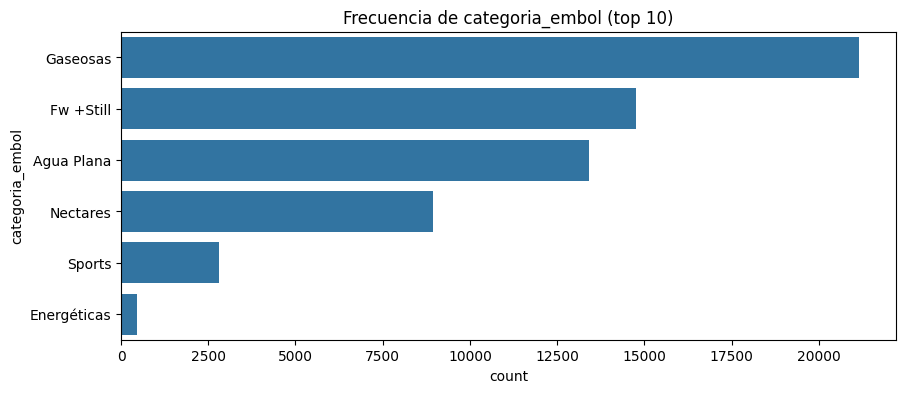

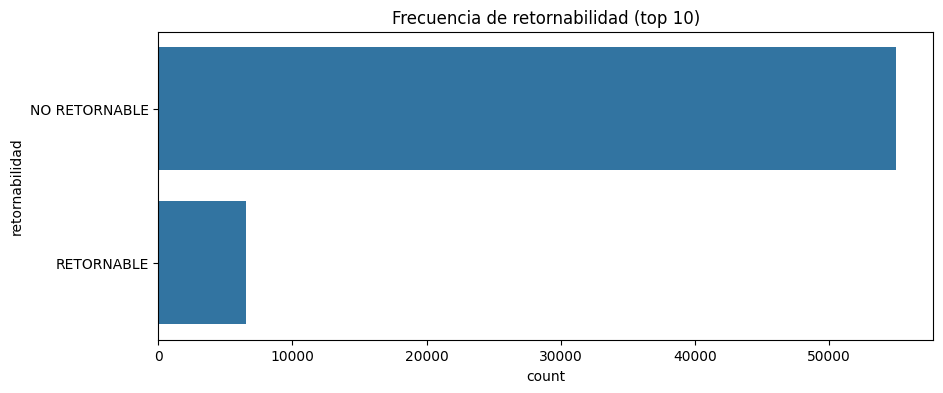

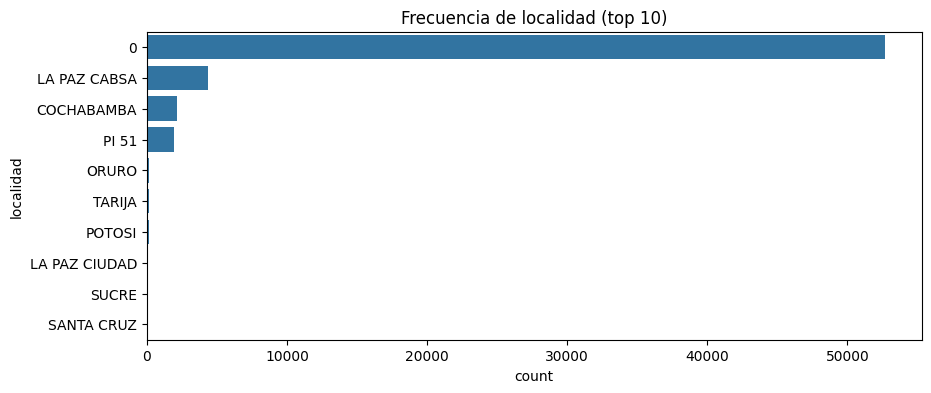

In [30]:
for col in numeric_cols:
    plt.figure(figsize=(12,4))

    plt.subplot(1,2,1)
    sns.histplot(df[col].dropna(), kde=True, bins=30)
    plt.title(f'Histograma de {col}')

    plt.subplot(1,2,2)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot de {col}')

    plt.tight_layout()
    plt.show()

for col in object_cols:
    plt.figure(figsize=(10,4))
    sns.countplot(y=col, data=df, order=df[col].value_counts().iloc[:10].index)
    plt.title(f'Frecuencia de {col} (top 10)')
    plt.show()


In [31]:
def detect_outliers_zscore(df, threshold=3):
    numeric_df = df.select_dtypes(include=np.number)
    z_scores = np.abs(stats.zscore(numeric_df, nan_policy='omit'))
    return (z_scores > threshold).sum(axis=0)

In [32]:
detect_outliers_zscore(df)

/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


array([1235, 1354, 1374,  987,    0,    0,  987,    0,    0,  503,    0,
          0,  631, 1439,    0,    0,    0,    0,    0,  641,  987,    0,
       1388,  593,  743,  888,  608,  595,  604,  554,   36,    0])

In [33]:
# Asimetría de las variables numéricas
numeric_df = df.select_dtypes(include=np.number)
skewness = numeric_df.skew().sort_values(ascending=False)
skewness

descuento_calculado                                        17.448485
caja_unitaria                                              13.908314
ingreso_facturado                                          13.649378
ingreso_bruto                                              13.548404
ingreso_neto                                               13.513309
cajas_fisicas                                              11.452366
botellas                                                   10.318111
venta_pcs                                                   6.274033
venta                                                       6.068391
inflacion                                                   2.025923
tamanio                                                     1.994475
construccion                                                0.920384
servicios_a_las_empresas                                    0.918164
servicios_de_la_administración_pública                      0.788285
precio_embol                                                0.722634
comercio                                                    0.621494
agricultura,_pecuario,_silvicultura,_caza_y_pesca           0.614859
electricidad,_gas_y_agua                                    0.505076
petroleo_crudo_y_gas_natural                                0.316713
alimentos,_bebidas_y_tabaco                                 0.218201
propiedad_de_vivienda                                       0.003330
establecimientos_financieros,_seguros,_bienes_inmuebles    -0.049512
comunicaciones                                             -0.143734
industria_manufacturera                                    -0.281177
servicios_financieros                                      -0.396213
indice_general                                             -0.585872
otras_industrias                                           -0.615888
otros_servicios                                            -0.847351
servicios_bancarios_imputados                              -0.952680
transporte_y_almacenamiento                                -1.365263
minerales_metálicos_y_no_metálicos                         -3.294473
precio_competencia                                               NaN
dtype: float64

In [34]:
def plot_time_trends(df, time_col, value_col):
    if time_col not in df.columns or value_col not in df.columns:
        print("Columnas no encontradas en el DataFrame.")
        return
    df[time_col] = pd.to_datetime(df[time_col], errors="coerce")
    trend = df.groupby(time_col)[value_col].mean()
    trend.plot(figsize=(12, 6), title=f"Tendencia temporal de {value_col}")
    plt.show()

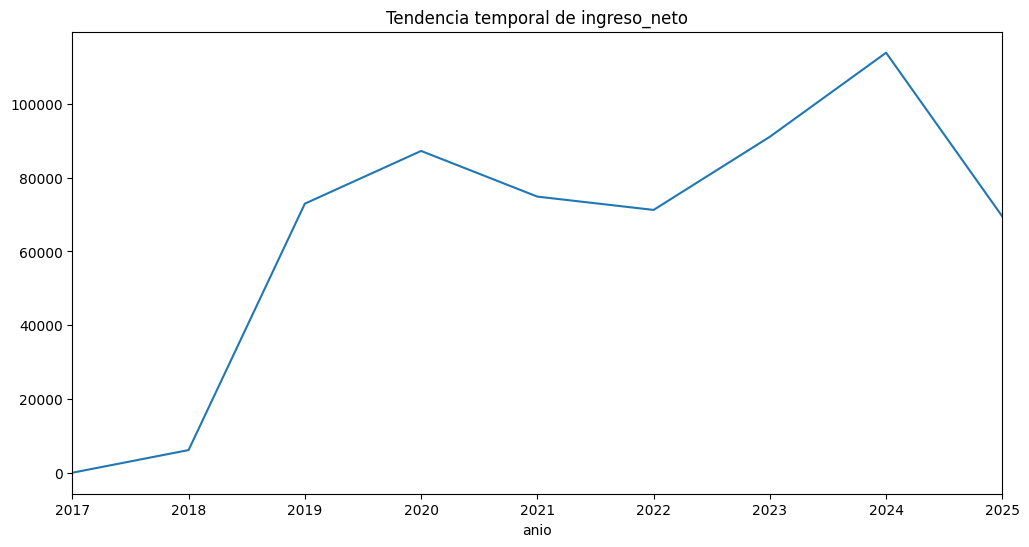

In [35]:
plot_time_trends(df, 'anio', 'ingreso_neto')

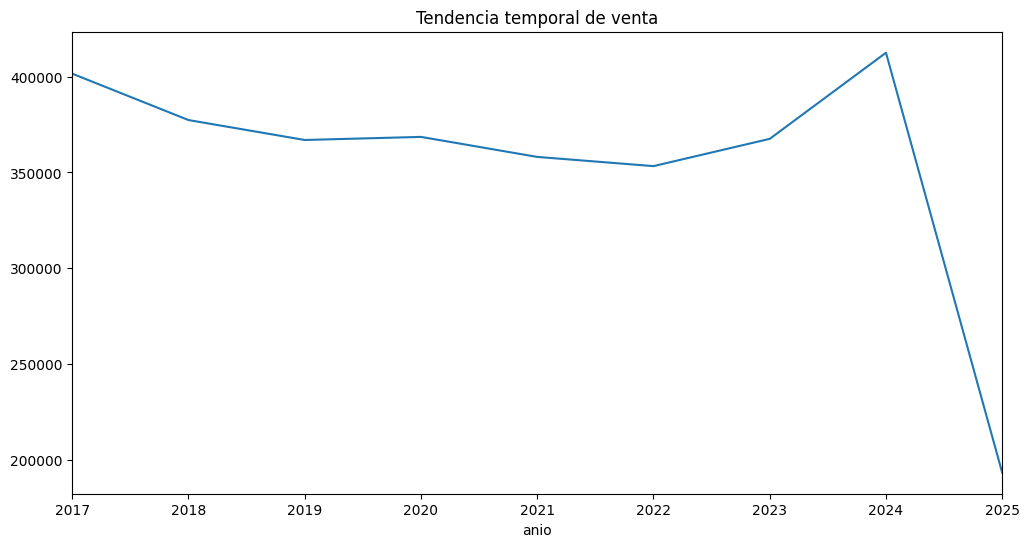

In [36]:
plot_time_trends(df, 'anio', 'venta')

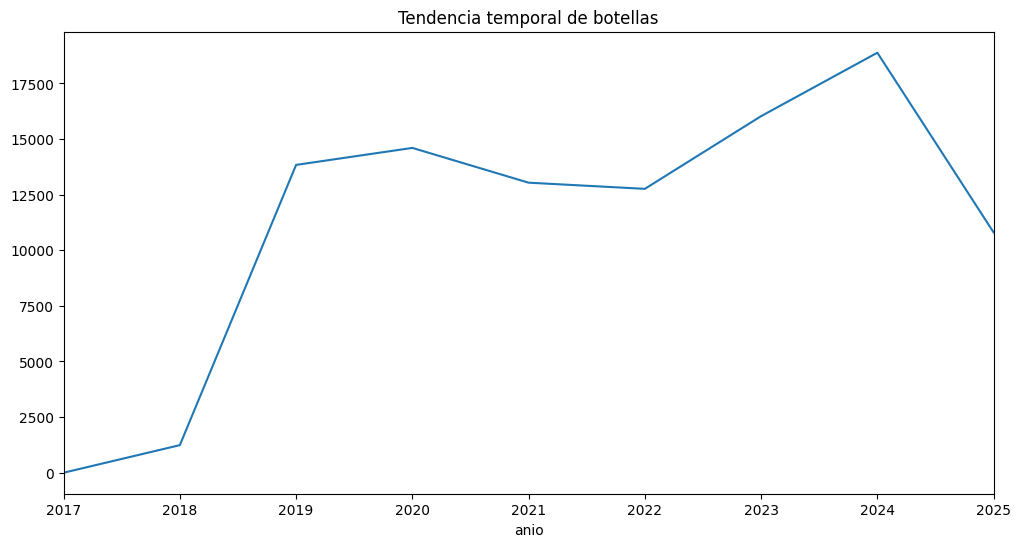

In [37]:
plot_time_trends(df, 'anio', 'botellas')

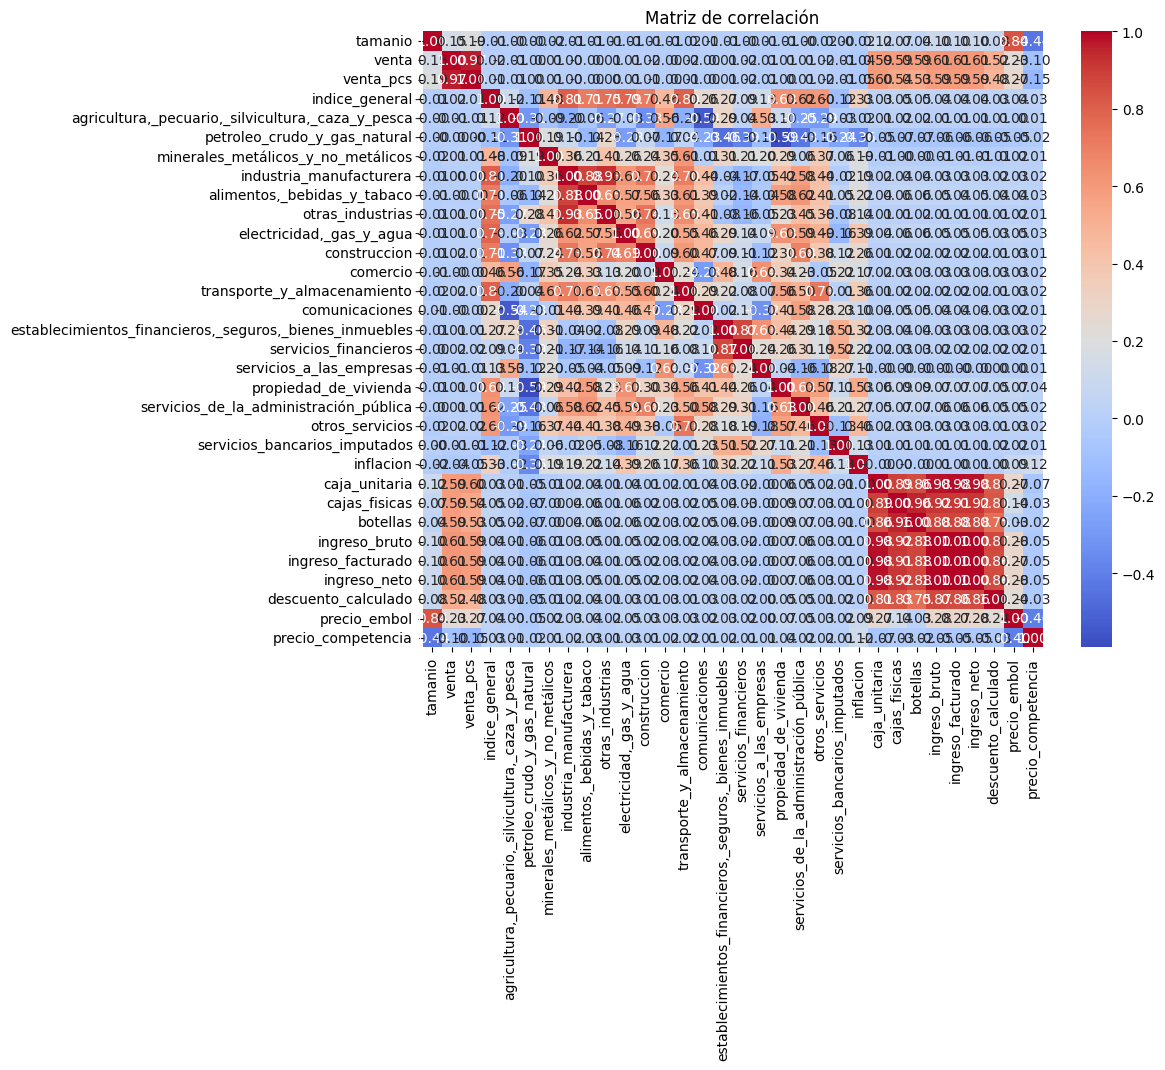

In [38]:
# Matriz de correlación
corr = df.select_dtypes(include=np.number).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Matriz de correlación")
plt.show()

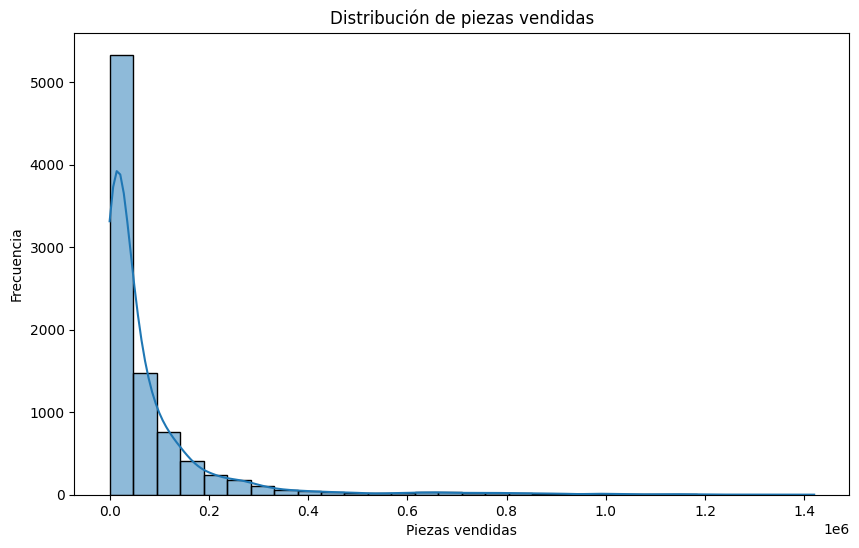

In [39]:
# Análisis de variable objetivo de Embol
target_col = 'botellas'
df_embol_filtered = df[df[target_col] > 0] # Filtrando sólo lo que vende Embol
plt.figure(figsize=(10,6))
sns.histplot(df_embol_filtered[target_col], bins=30, kde=True)
plt.title("Distribución de piezas vendidas")
plt.xlabel("Piezas vendidas")
plt.ylabel("Frecuencia")
plt.show()

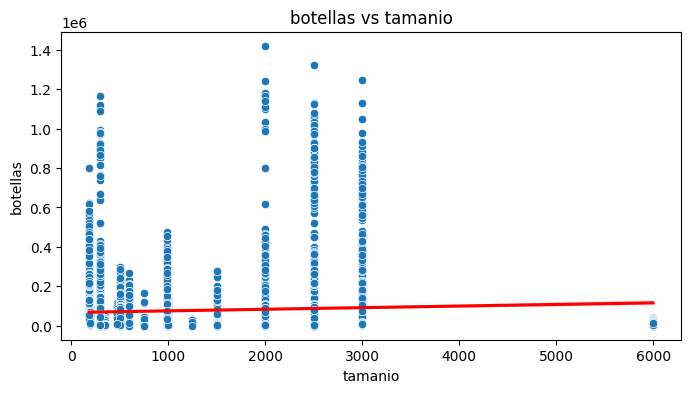

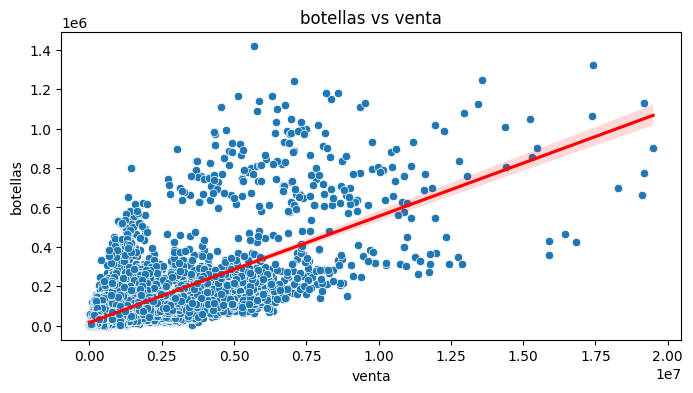

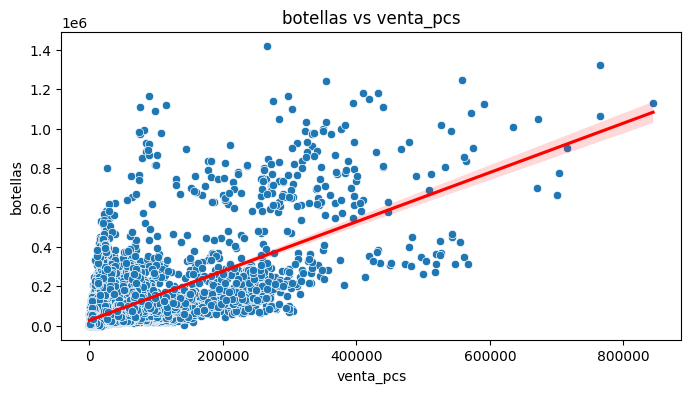

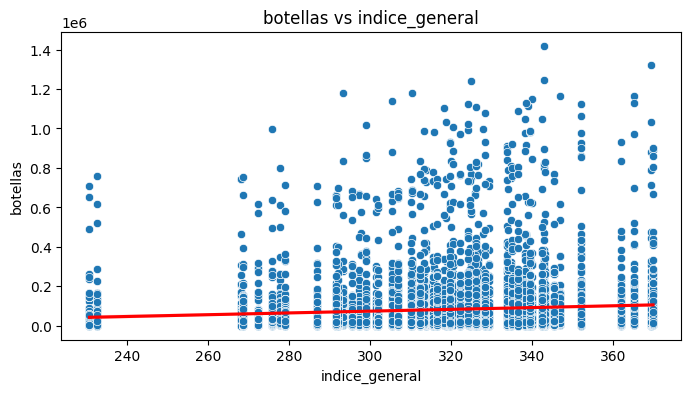

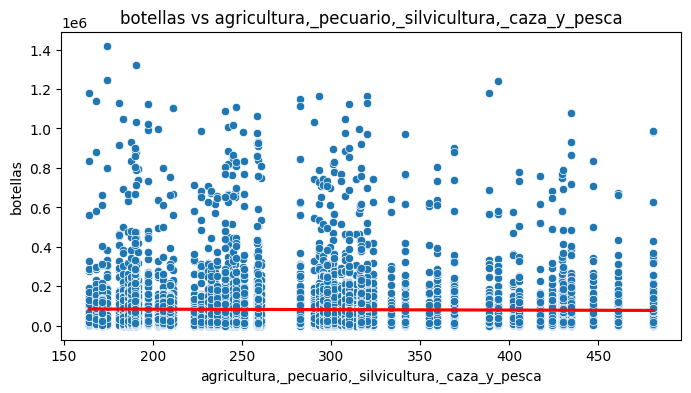

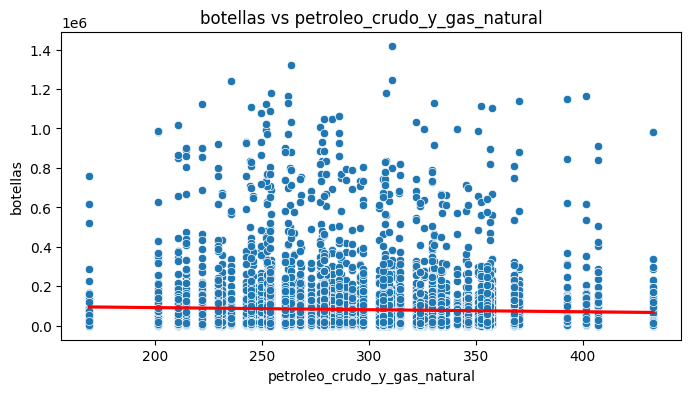

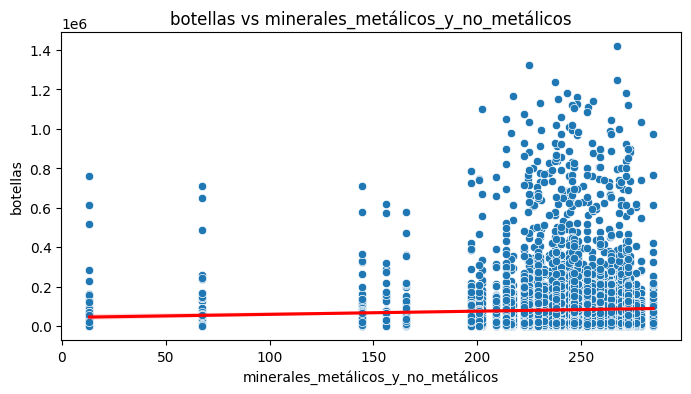

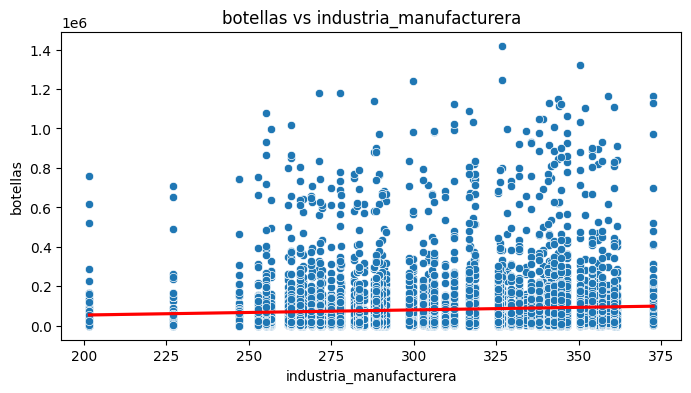

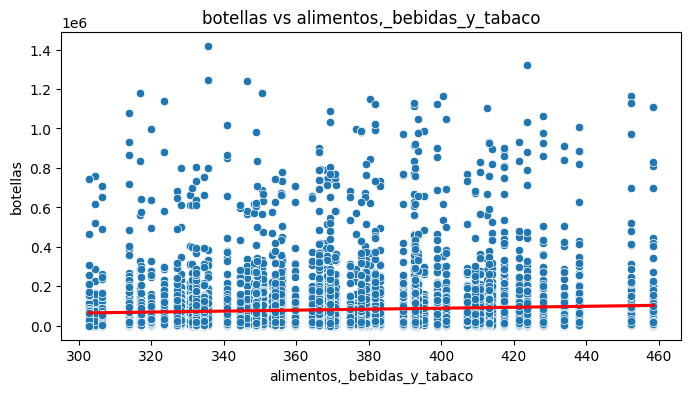

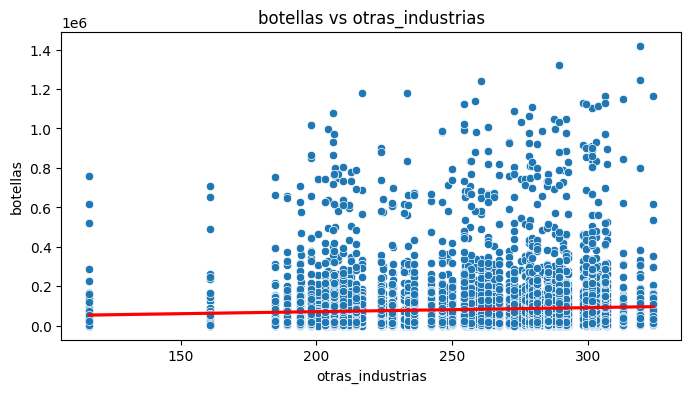

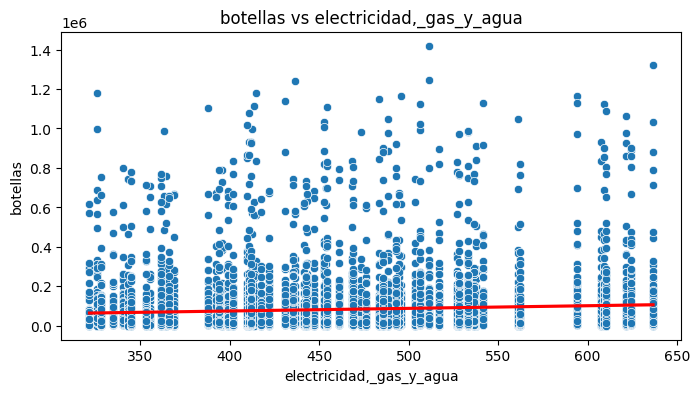

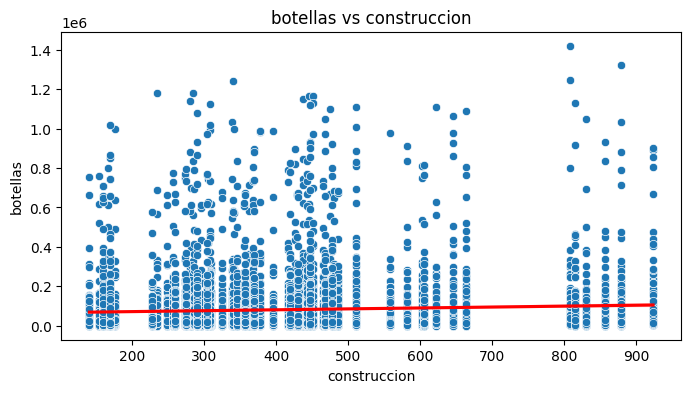

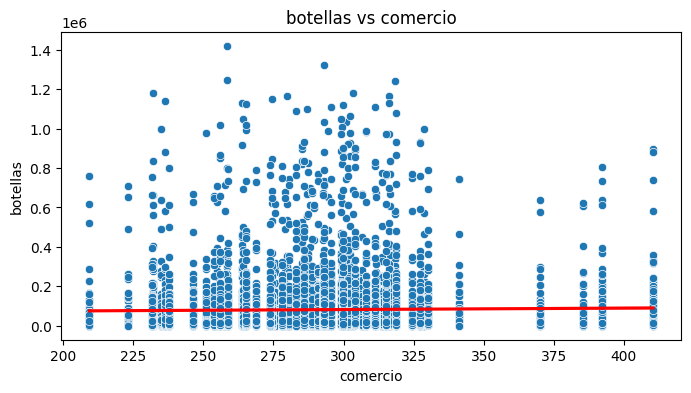

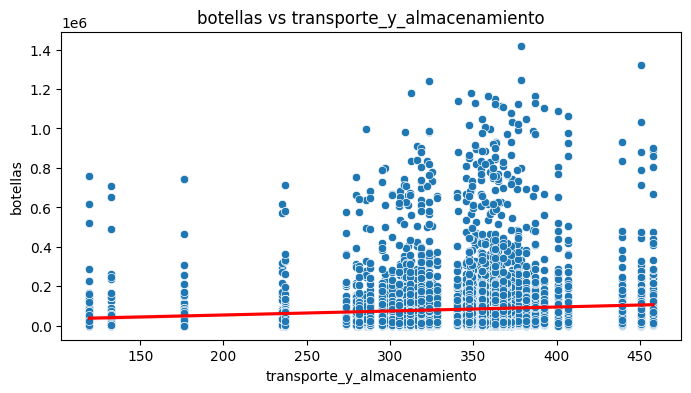

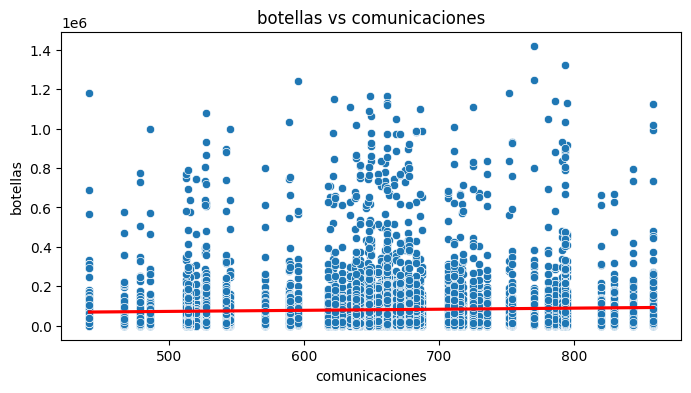

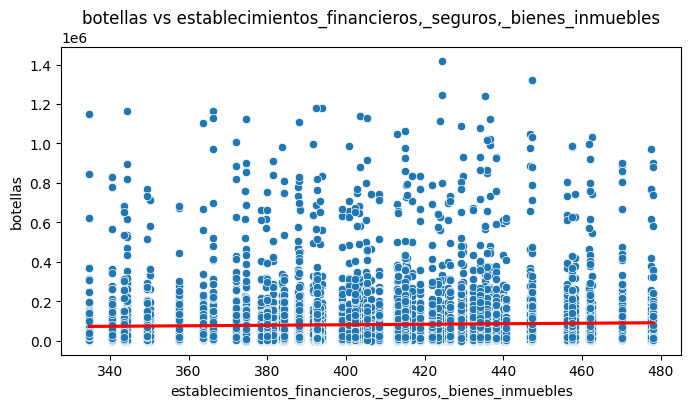

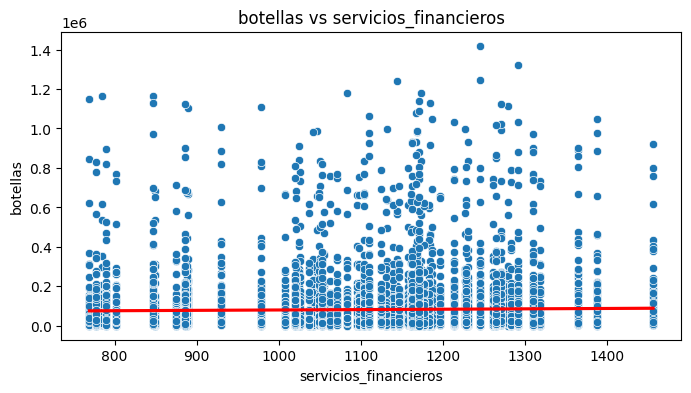

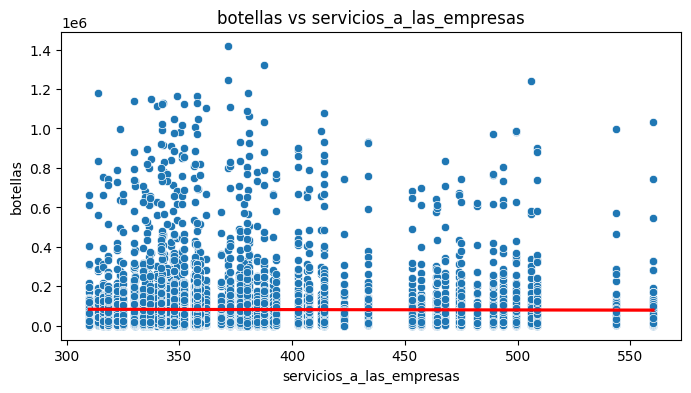

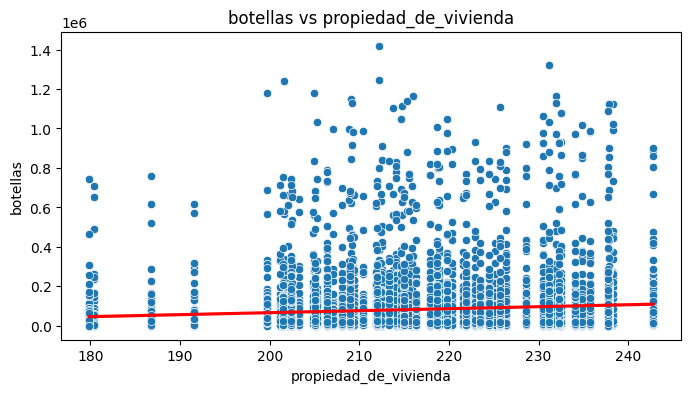

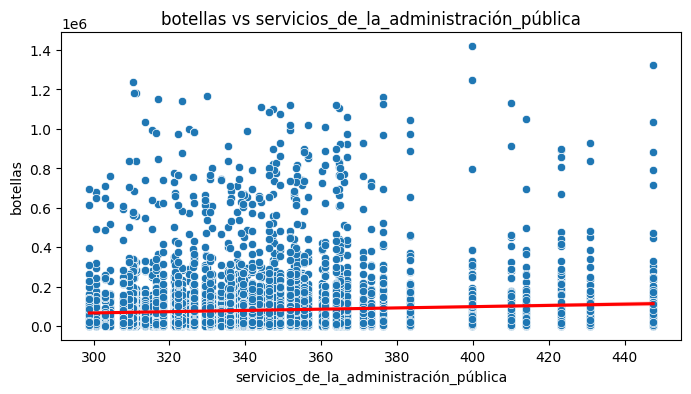

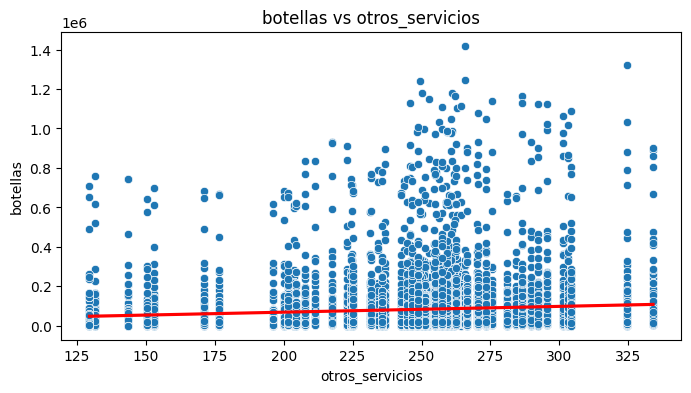

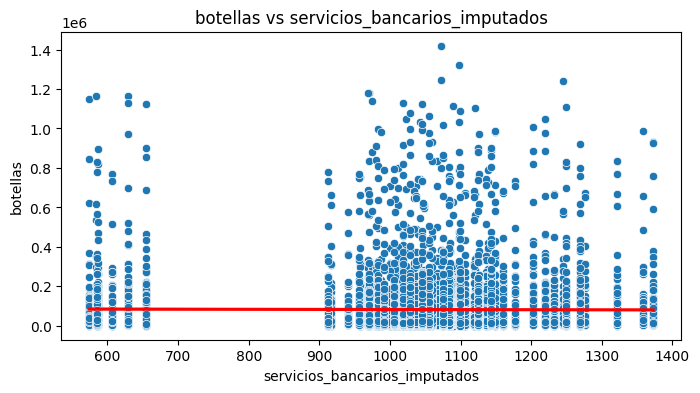

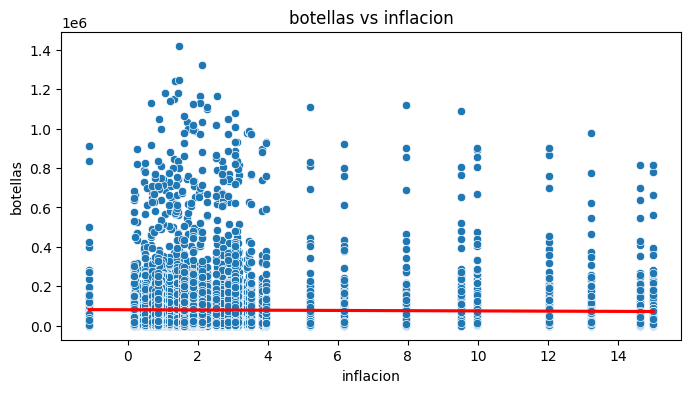

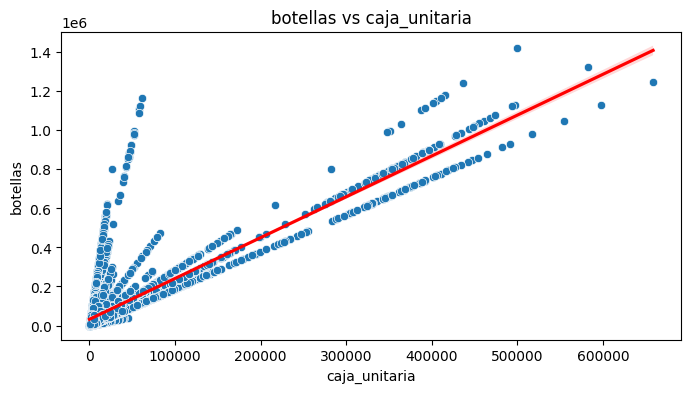

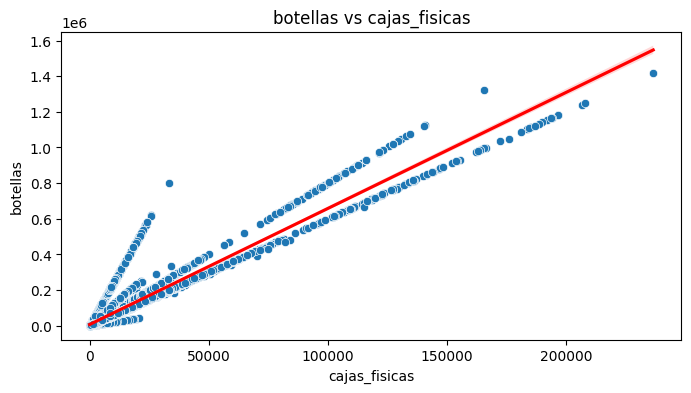

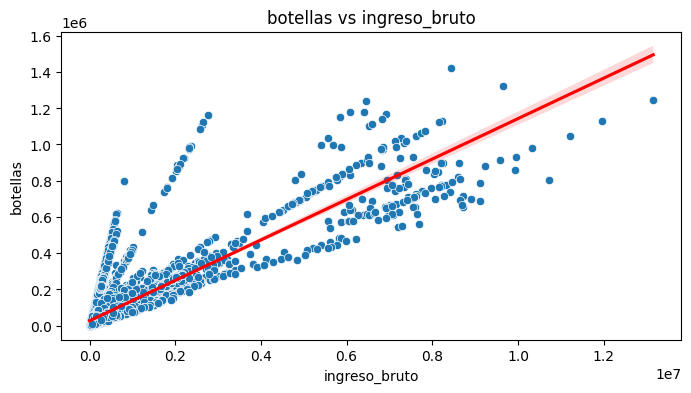

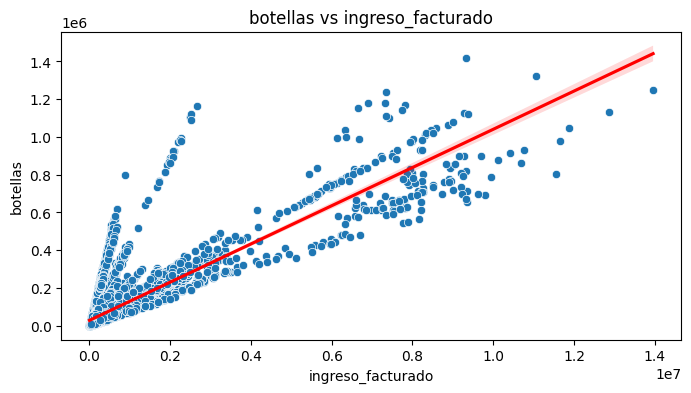

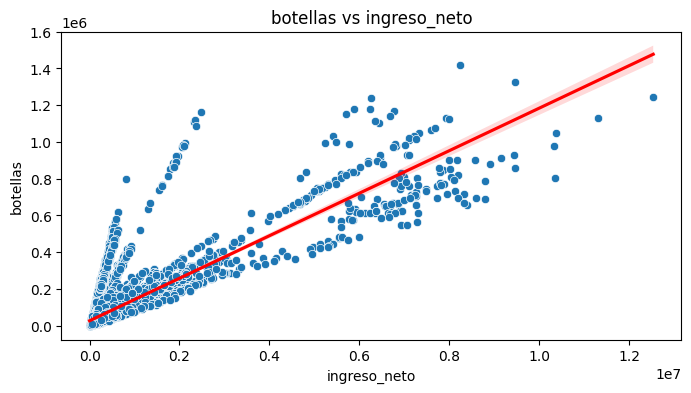

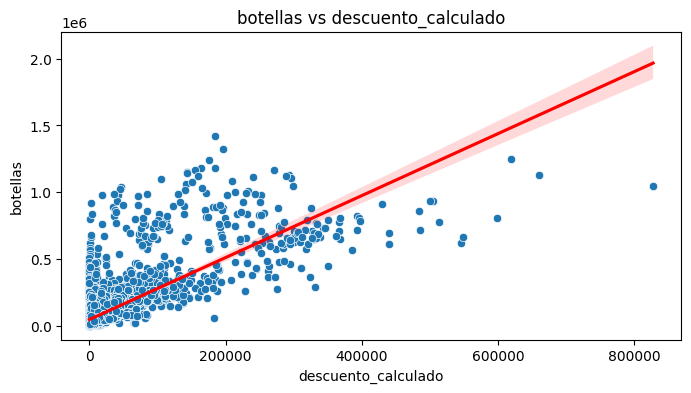

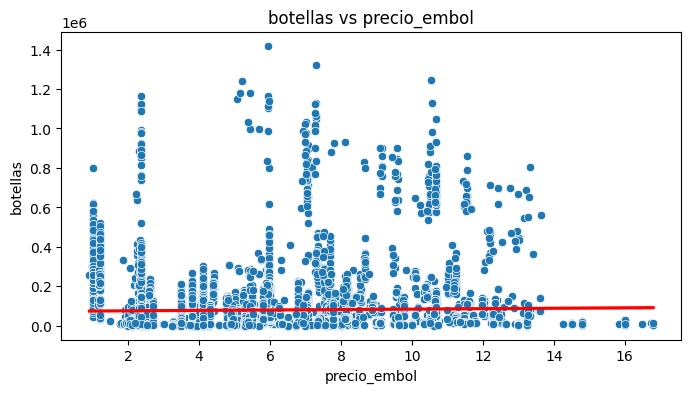

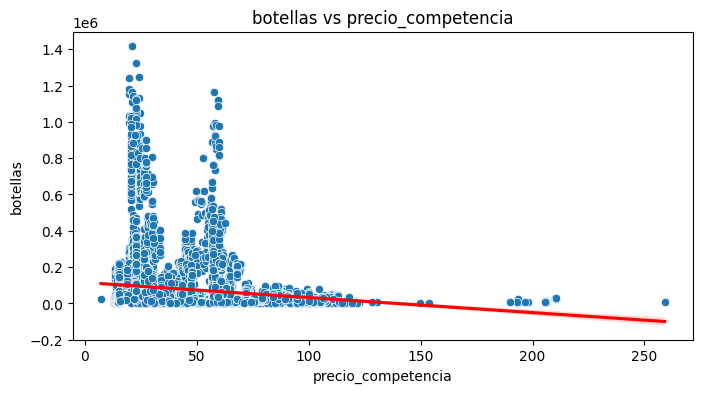

In [40]:
# Análisis bivariado para variable objetivo en Embol
for col in numeric_cols:
    if col != target_col:
        plt.figure(figsize=(8,4))
        sns.scatterplot(x=col, y=target_col, data=df_embol_filtered)
        sns.regplot(x=col, y=target_col, data=df_embol_filtered, scatter=False, color="red")  # línea de tendencia
        plt.title(f"{target_col} vs {col}")
        plt.show()

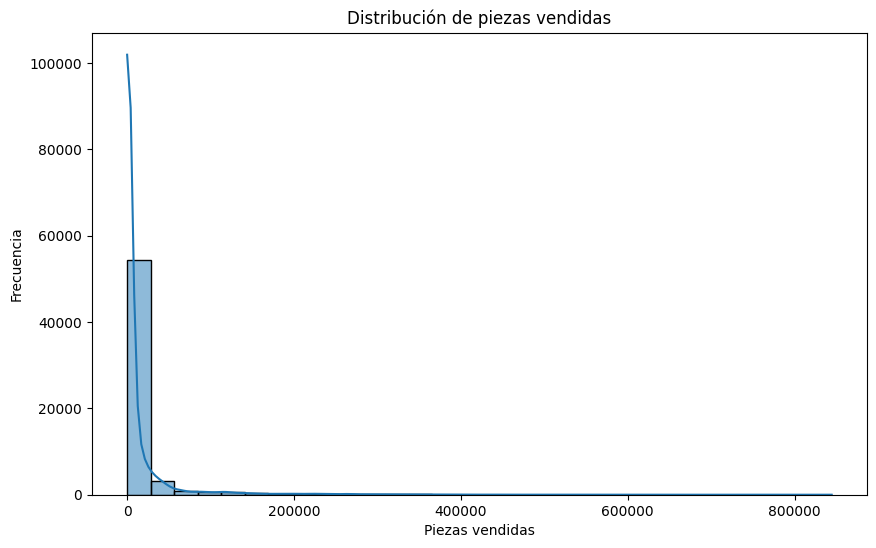

In [41]:
# Análisis de variable objetivo de competencia
target_col = 'venta_pcs'
plt.figure(figsize=(10,6))
sns.histplot(df[df[target_col] > 0][target_col], bins=30, kde=True)
plt.title("Distribución de piezas vendidas")
plt.xlabel("Piezas vendidas")
plt.ylabel("Frecuencia")
plt.show()

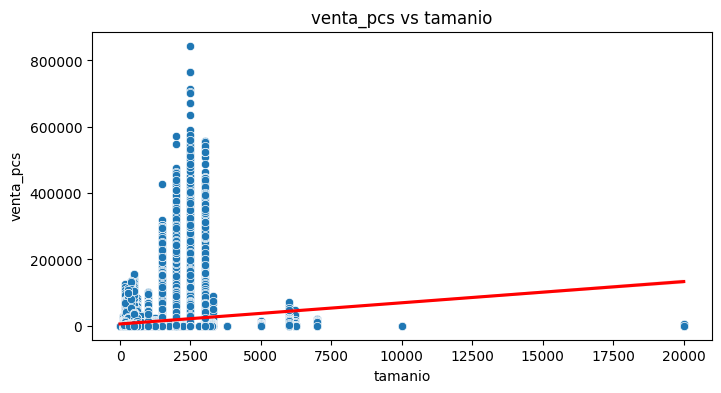

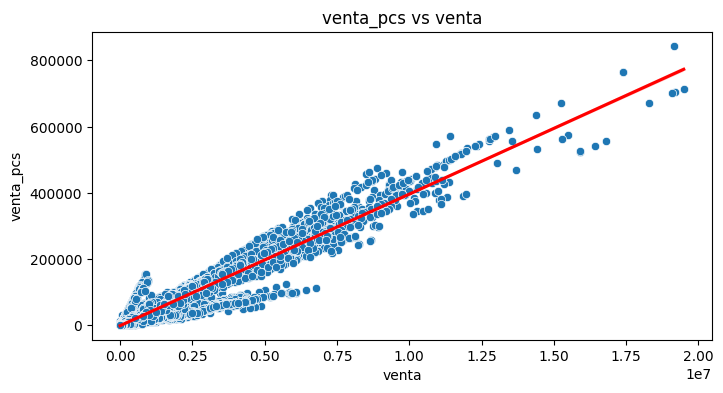

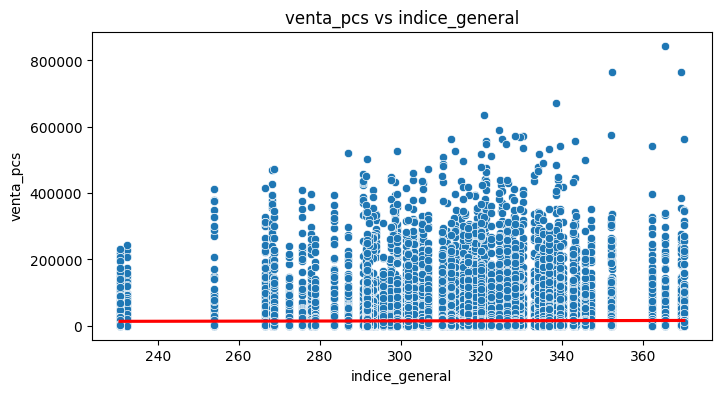

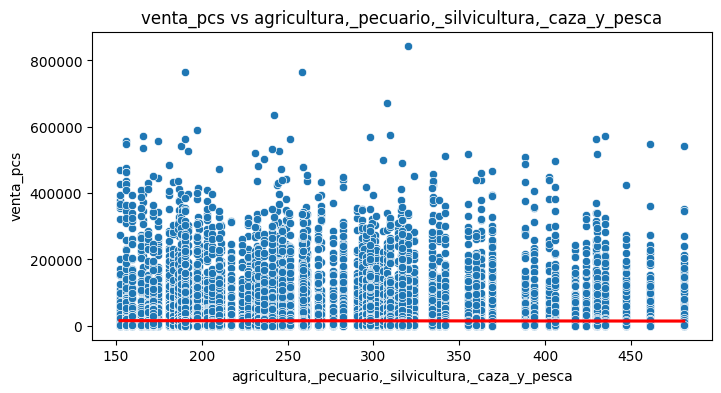

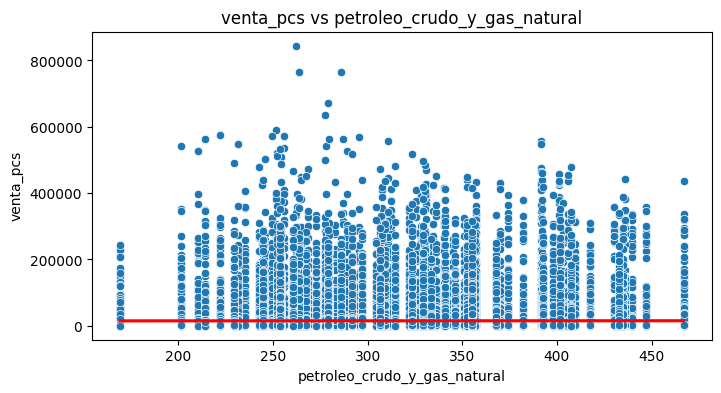

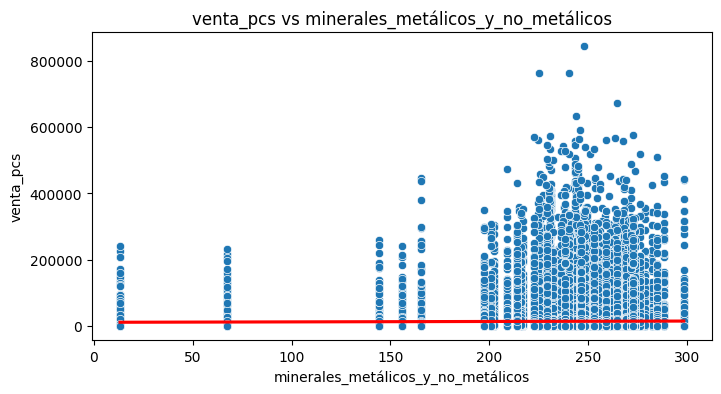

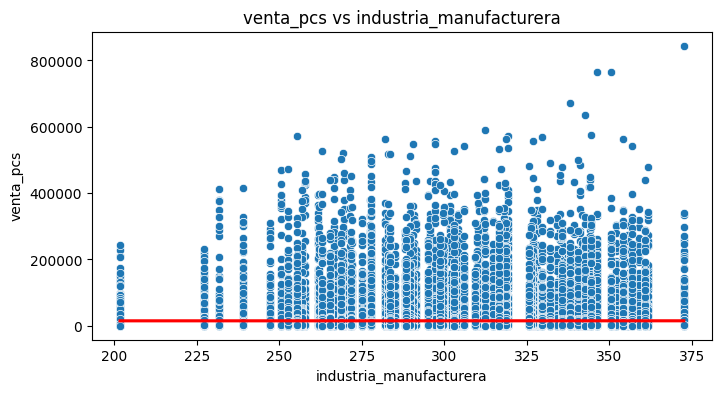

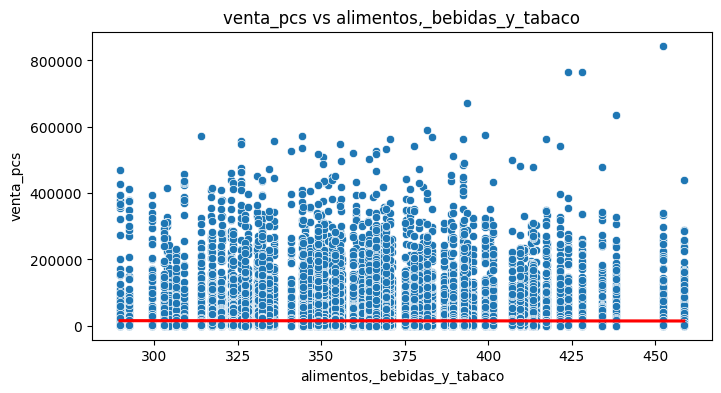

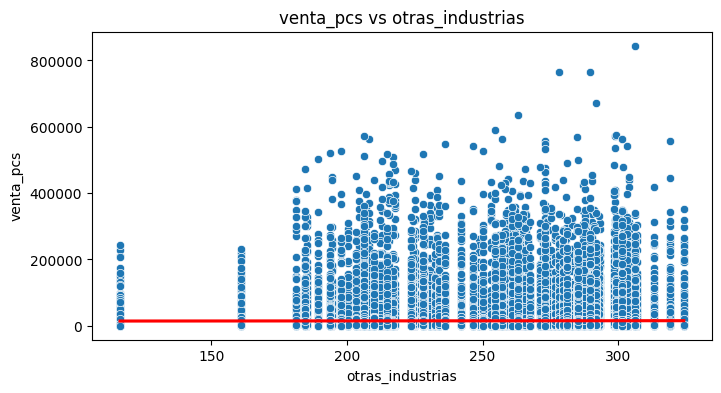

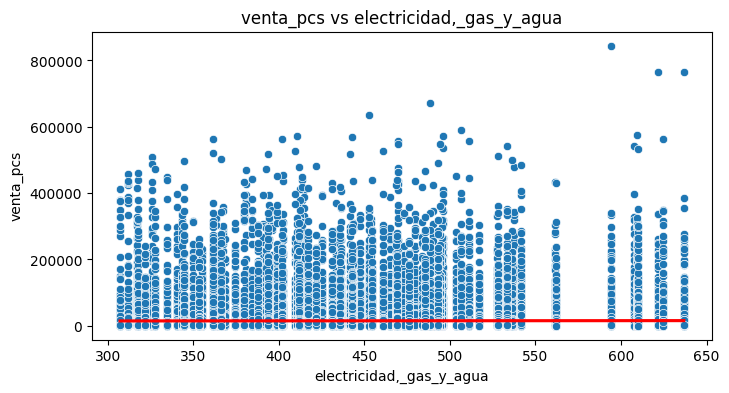

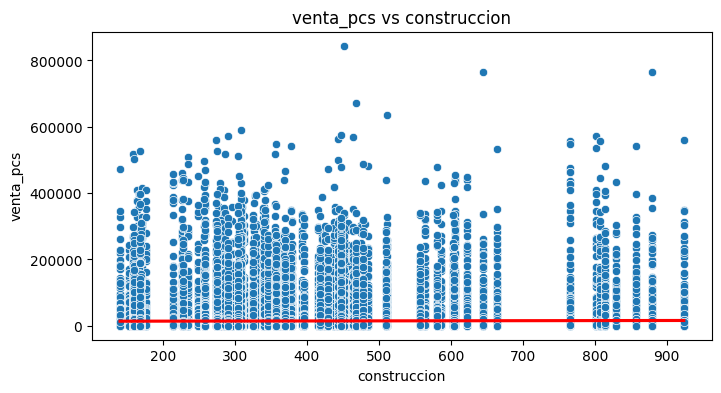

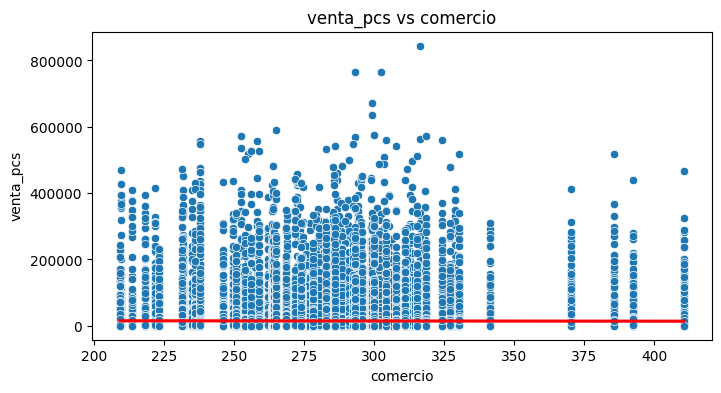

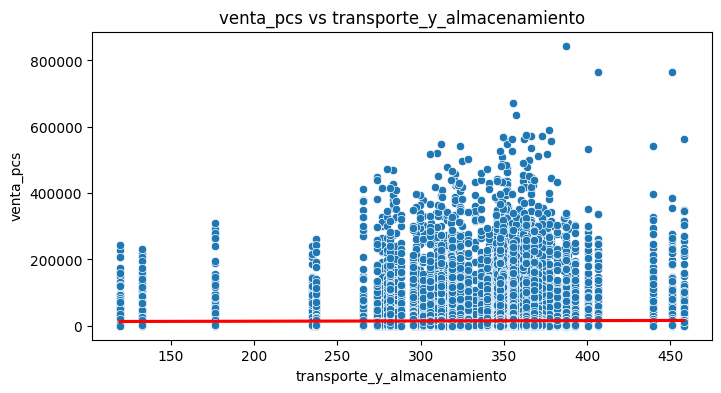

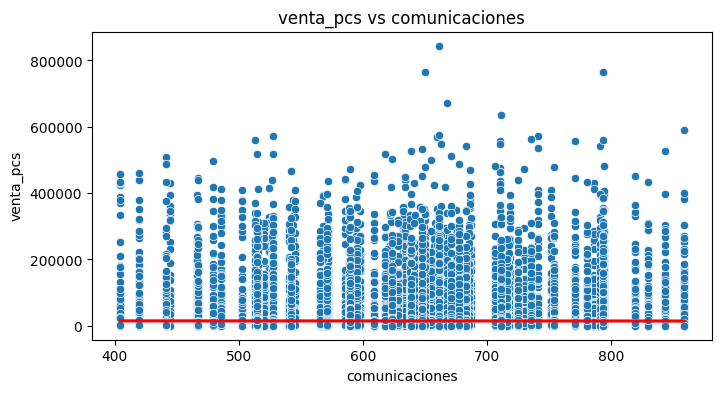

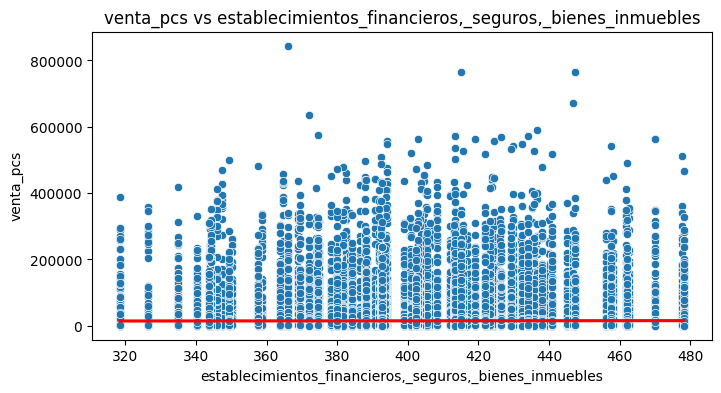

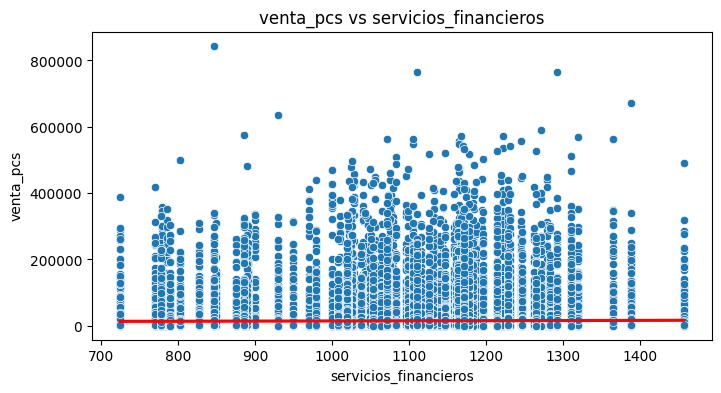

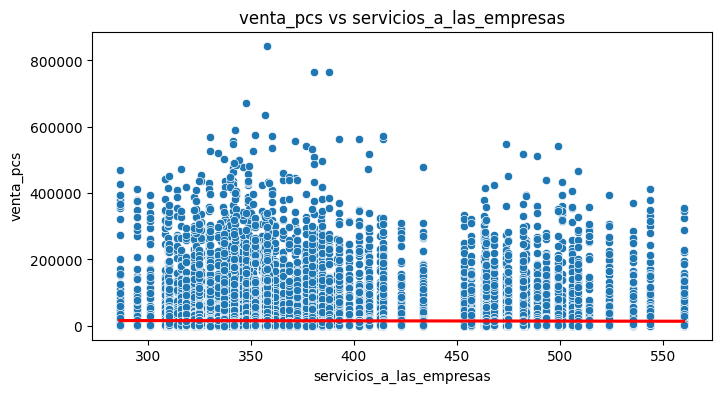

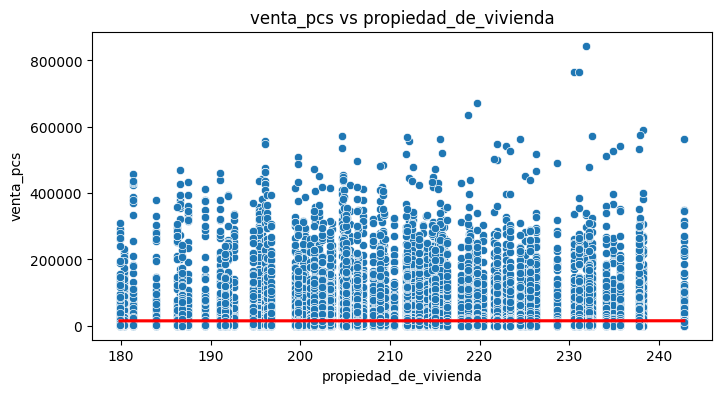

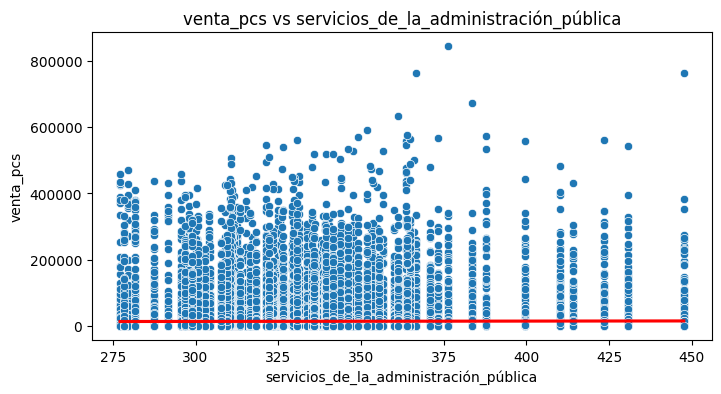

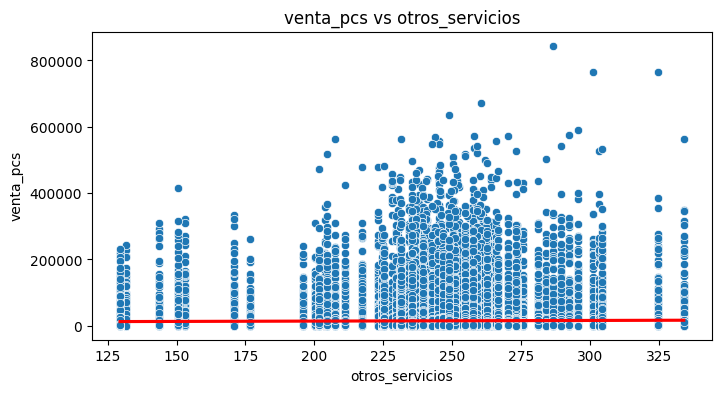

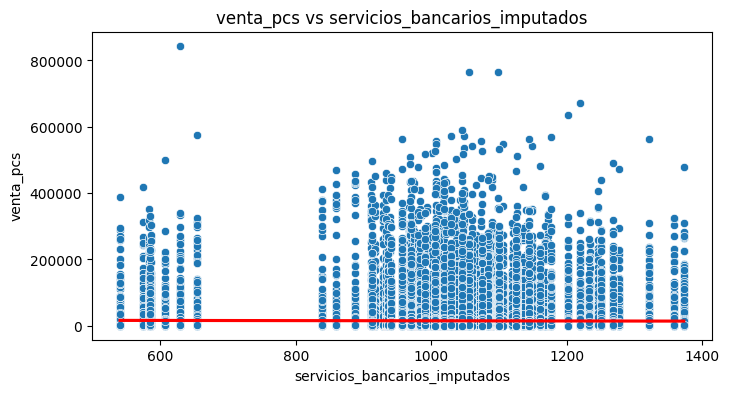

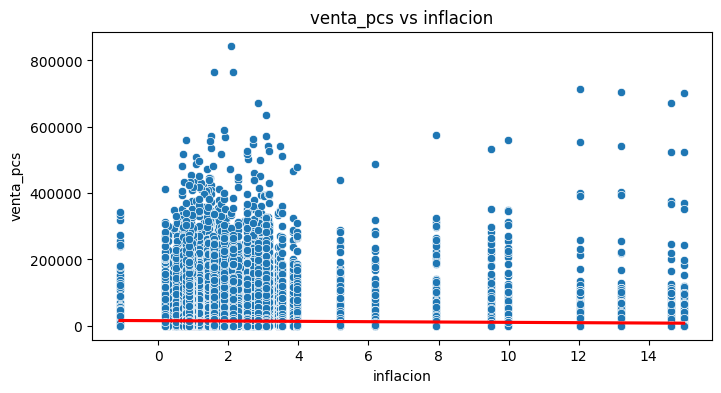

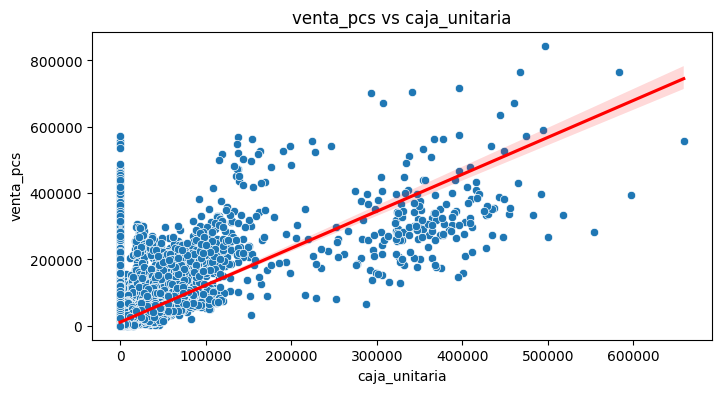

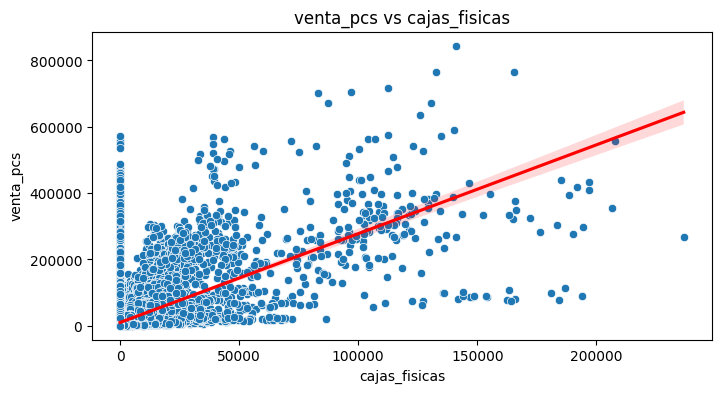

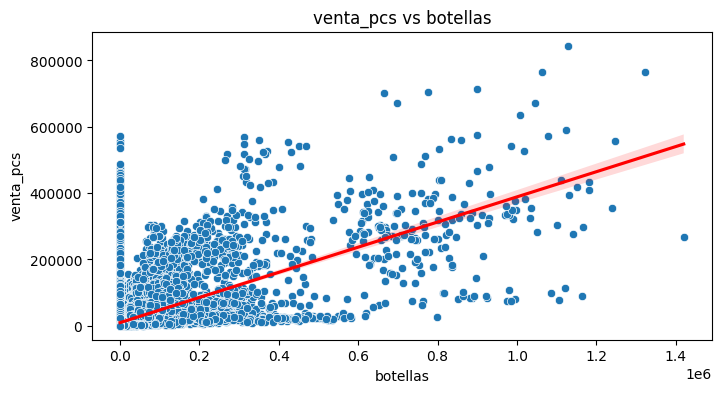

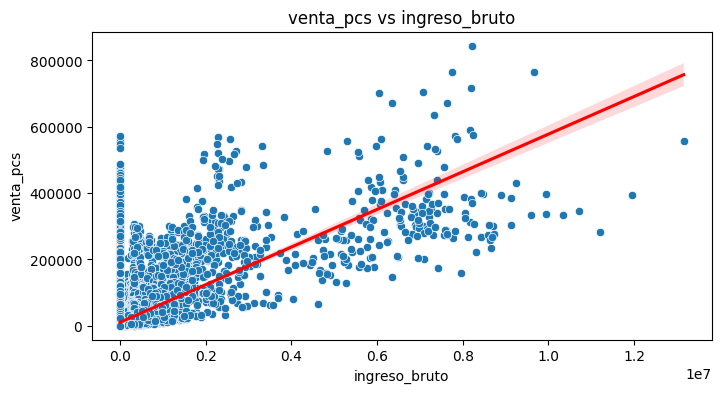

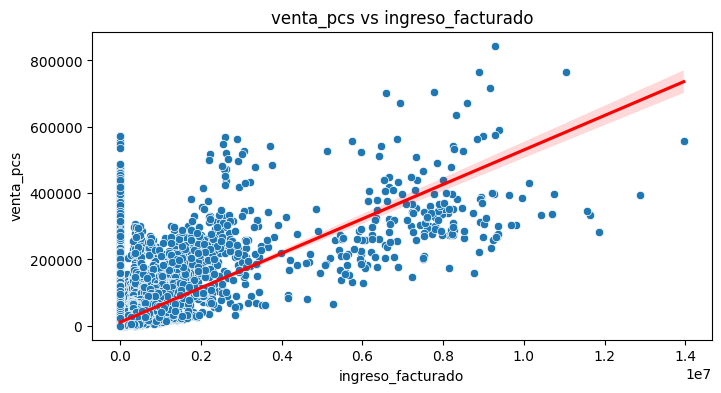

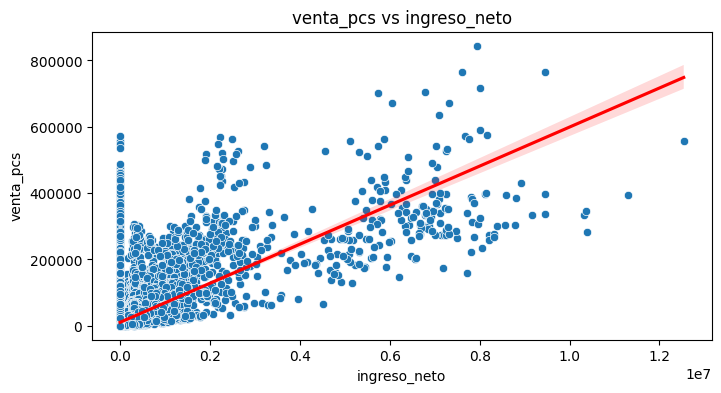

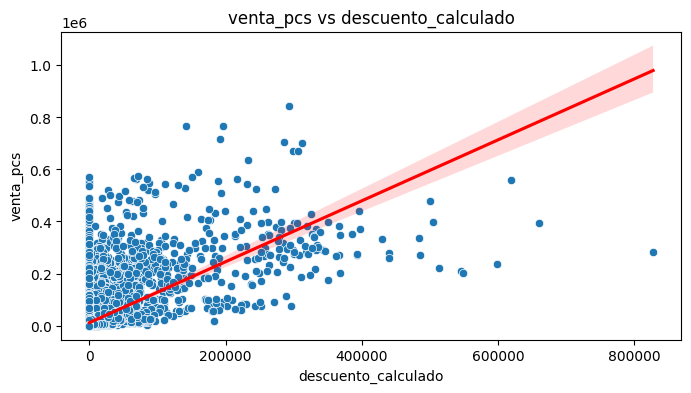

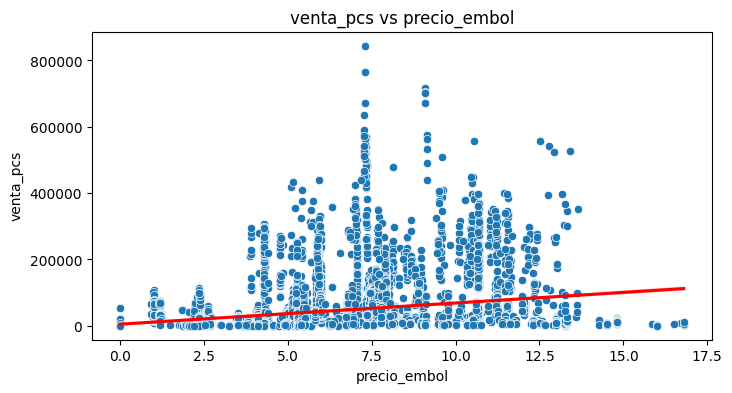

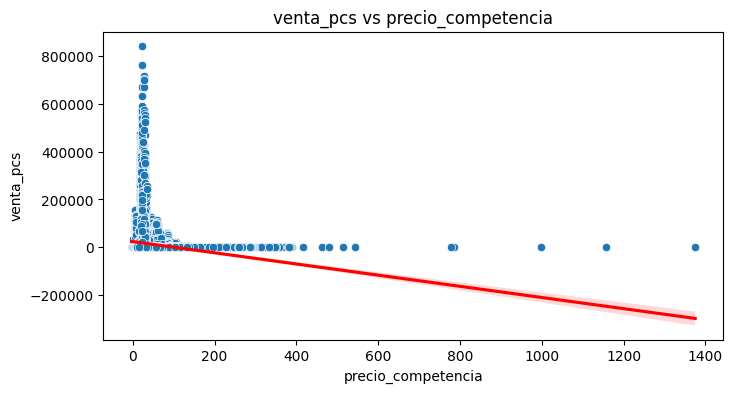

In [42]:
# Análisis bivariado para variable objetivo en competencia
for col in numeric_cols:
    if col != target_col:
        plt.figure(figsize=(8,4))
        sns.scatterplot(x=col, y=target_col, data=df[df[target_col] > 0])
        sns.regplot(x=col, y=target_col, data=df[df[target_col] > 0], scatter=False, color="red")  # línea de tendencia
        plt.title(f"{target_col} vs {col}")
        plt.show()

# Conclusiones

-- Estructura y calidad de datos

* Se identificaron el tipo de columnas y variables.

* Se identificaros valores vacios o nulos principalmente en la columnas precios embol e inflasión, una ves analizada la información se detecto que esta información es correcta ya que la columnas precios embol solo tienen información para los casos que el la empresa corresponda a "Embol" y la variable inflación solo cuenta con información hasta la gestión 2024, que es la ultima fuente vigente.


* Se encontraron outliers en variables numéricas (tamaño, precios, ingresos) detectados con IQR y Z-score, los cuales revisando la data corresponden a la categoria bebidas energizantes los cuales no seran considerados en el analisis del modelo final al representar solo el share de volumen inferior al 1%.



* Se exploraron tendencias de ventas, ingresos y botellas a lo largo de los años, observándose patrones que sugieren estacionalidad.

* Se realizó una primera comparación entre Embol y la competencia, con histogramas y análisis bivariados de ventas, aunque de forma separada.


-- Próximos pasos

* Definir las variables relevantes para el armado del modelo
* Calcular los delta precio y delta cantidad de las empresas para el realizar el calculo de las elasticidades ya sea de manera mensual o por gestion.

* Profundizar en la segmentación por categoría de producto, región o canal para capturar diferencias en el comportamiento de la demanda.

# Avance 2: Ingeniería de caracteristicas (FE)

In [43]:
# Set pandas options to display all columns
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [44]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler, MinMaxScaler, PowerTransformer
from sklearn.feature_selection import VarianceThreshold, SelectKBest, chi2, f_classif
from sklearn.decomposition import PCA, FactorAnalysis
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score


Variables macroeconómicas encontradas: 20

>>> Variables a ELIMINAR (correlación < 0.01): 0
>>> Variables a MANTENER (correlación >= 0.01): 20


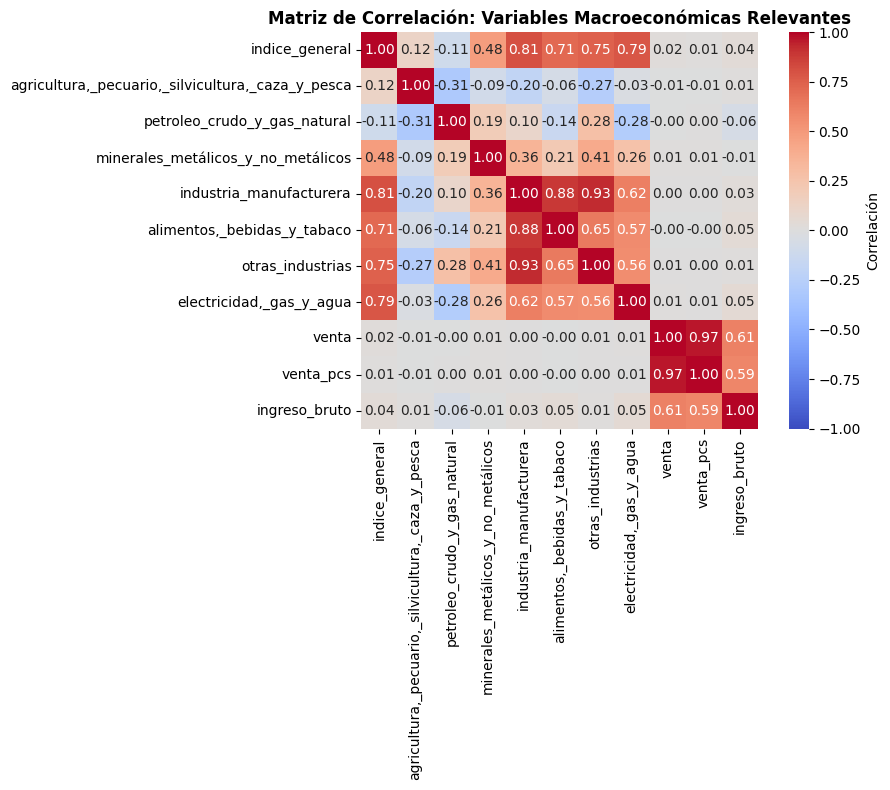


Columnas eliminadas: 0
Dimensiones actuales: (61552, 40)


In [45]:
# ==============================================================================================
# ANÁLISIS DE CORRELACIÓN DE VARIABLES MACROECONÓMICAS PARA ELIMINACIÓN O MANTENIMIENTO
# ===============================================================================================

# Identificar variables macroeconómicas
variables_macro = [
    'indice_general',
    'agricultura,_pecuario,_silvicultura,_caza_y_pesca',
    'petroleo_crudo_y_gas_natural',
    'minerales_metálicos_y_no_metálicos',
    'industria_manufacturera',
    'alimentos,_bebidas_y_tabaco',
    'otras_industrias',
    'electricidad,_gas_y_agua',
    'construccion',
    'comercio',
    'transporte_y_almacenamiento',
    'comunicaciones',
    'establecimientos_financieros,_seguros,_bienes_inmuebles',
    'servicios_financieros',
    'servicios_a_las_empresas',
    'propiedad_de_vivienda',
    'servicios_de_la_administración_pública',
    'otros_servicios',
    'servicios_bancarios_imputados',
    'inflacion'
]

# Variables objetivo
variables_objetivo = ['venta', 'venta_pcs', 'ingreso_bruto']

# Filtrar solo las que existen en el dataframe
variables_macro = [v for v in variables_macro if v in df.columns]
variables_objetivo = [v for v in variables_objetivo if v in df.columns]

print(f"\nVariables macroeconómicas encontradas: {len(variables_macro)}")

# Calcular correlaciones
vars_para_corr = variables_macro + variables_objetivo
df_corr = df[vars_para_corr].copy()

# Reemplazar infinitos antes de calcular correlación
df_corr = df_corr.replace([np.inf, -np.inf], np.nan)

matriz_correlacion = df_corr.corr()

# Extraer correlaciones con variables objetivo
correlaciones_con_objetivo = pd.DataFrame()
for var_objetivo in variables_objetivo:
    if var_objetivo in matriz_correlacion.columns:
        correlaciones_con_objetivo[var_objetivo] = matriz_correlacion[var_objetivo][variables_macro]

# Calcular correlación máxima absoluta
max_corr_abs = correlaciones_con_objetivo.abs().max(axis=1)

# Umbral de correlación
umbral_correlacion = 0.010
vars_a_eliminar = max_corr_abs[max_corr_abs < umbral_correlacion].index.tolist()
vars_a_mantener = max_corr_abs[max_corr_abs >= umbral_correlacion].index.tolist()

print(f"\n>>> Variables a ELIMINAR (correlación < {umbral_correlacion}): {len(vars_a_eliminar)}")
print(f">>> Variables a MANTENER (correlación >= {umbral_correlacion}): {len(vars_a_mantener)}")

# Visualización simplificada
if len(vars_a_mantener) > 0:
    plt.figure(figsize=(10, 8))
    vars_viz = (vars_a_mantener[:8] if len(vars_a_mantener) > 8 else vars_a_mantener) + variables_objetivo[:3]
    matriz_visual = df_corr[vars_viz].corr()

    sns.heatmap(matriz_visual, annot=True, fmt='.2f', cmap='coolwarm',
                center=0, vmin=-1, vmax=1, square=True, cbar_kws={'label': 'Correlación'})
    plt.title('Matriz de Correlación: Variables Macroeconómicas Relevantes', fontsize=12, fontweight='bold')
    plt.tight_layout()
    plt.show()

# Aplicar eliminación
df_clean = df.drop(columns=vars_a_eliminar, errors='ignore')
print(f"\nColumnas eliminadas: {len(vars_a_eliminar)}")
print(f"Dimensiones actuales: {df_clean.shape}")



Rango de años: 1483228800000000000 - 1735689600000000000
Rango de meses: 1 - 12

✓ Variables temporales creadas:
  - mes_num: 1-12
  - anio_num: año numérico
  - periodo_continuo: año*12 + mes
  - periodo_normalizado: [0,1]


<>:18: SyntaxWarning: invalid escape sequence '\d'
<>:18: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipython-input-221479435.py:18: SyntaxWarning: invalid escape sequence '\d'
  df_clean['anio_num'] = df_clean['anio'].astype(str).str.extract('(\d{4})')[0].astype(float).astype('Int64')


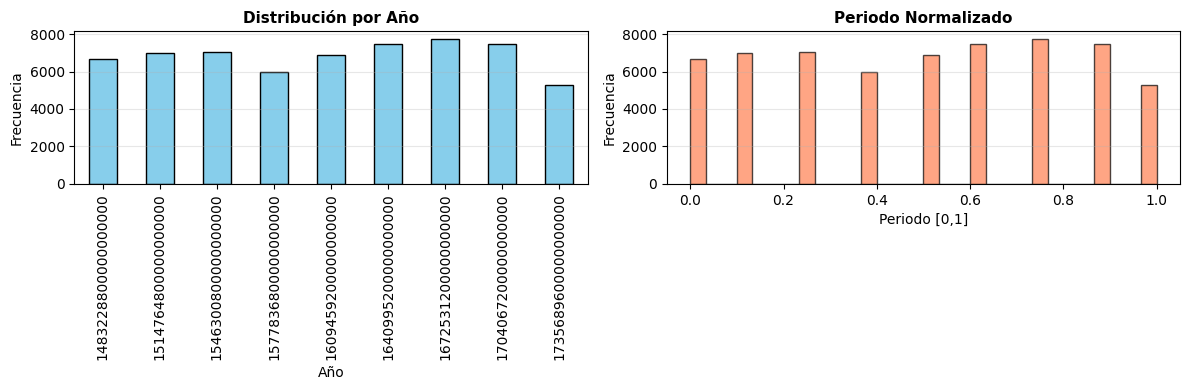

In [46]:
# ================================================================================
#  ESTANDARIZACIÓN DE VARIABLES ORDINALES (AÑO Y MES)
# ================================================================================

# Diccionario de meses
meses_orden = {
    'enero': 1, 'febrero': 2, 'marzo': 3, 'abril': 4,
    'mayo': 5, 'junio': 6, 'julio': 7, 'agosto': 8,
    'septiembre': 9, 'octubre': 10, 'noviembre': 11, 'diciembre': 12
}

# Convertir mes a numérico
df_clean['mes_num'] = df_clean['mes'].map(meses_orden)

# Convertir año a numérico (manejo robusto de diferentes formatos)
if df_clean['anio'].dtype == 'object':
    # Extraer solo los primeros 4 dígitos si es string
    df_clean['anio_num'] = df_clean['anio'].astype(str).str.extract('(\d{4})')[0].astype(float).astype('Int64')
else:
    # Si ya es numérico
    df_clean['anio_num'] = pd.to_numeric(df_clean['anio'], errors='coerce').astype('Int64')

print(f"\nRango de años: {df_clean['anio_num'].min()} - {df_clean['anio_num'].max()}")
print(f"Rango de meses: {df_clean['mes_num'].min()} - {df_clean['mes_num'].max()}")

# Crear periodo continuo
df_clean['periodo_continuo'] = df_clean['anio_num'].astype(int) * 12 + df_clean['mes_num'].astype(int)

# Normalizar periodo [0, 1]
from sklearn.preprocessing import MinMaxScaler
scaler_periodo = MinMaxScaler()
df_clean['periodo_normalizado'] = scaler_periodo.fit_transform(
    df_clean[['periodo_continuo']]
)

print("\n✓ Variables temporales creadas:")
print("  - mes_num: 1-12")
print("  - anio_num: año numérico")
print("  - periodo_continuo: año*12 + mes")
print("  - periodo_normalizado: [0,1]")

# Visualización
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

df_clean['anio_num'].value_counts().sort_index().plot(kind='bar', ax=axes[0], color='skyblue', edgecolor='black')
axes[0].set_title('Distribución por Año', fontweight='bold', fontsize=11)
axes[0].set_xlabel('Año')
axes[0].set_ylabel('Frecuencia')
axes[0].grid(axis='y', alpha=0.3)

axes[1].hist(df_clean['periodo_normalizado'], bins=30, color='coral', edgecolor='black', alpha=0.7)
axes[1].set_title('Periodo Normalizado', fontweight='bold', fontsize=11)
axes[1].set_xlabel('Periodo [0,1]')
axes[1].set_ylabel('Frecuencia')
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

In [47]:
# ================================================================================
# BINNING DE TAMAÑOS DE BOTELLAS
# ================================================================================
df_clean['tamanio_grupo'] = pd.cut(df['tamanio'],
                             bins=[0, 999, np.inf],
                             labels=['pequeno', 'grande'])



Variables numéricas a estandarizar: 32

--- Limpiando datos antes de escalar ---
  precio_competencia: 390 valores infinitos

✓ Datos limpiados (infinitos y NaN reemplazados por mediana)

✓ Variables estandarizadas agregadas con sufijo '_zscore'
✓ Dimensiones finales: (61552, 77)

Verificación Z-score:
  Media promedio: -0.000000 (esperado: ~0)
  Std promedio:   1.000008 (esperado: ~1)


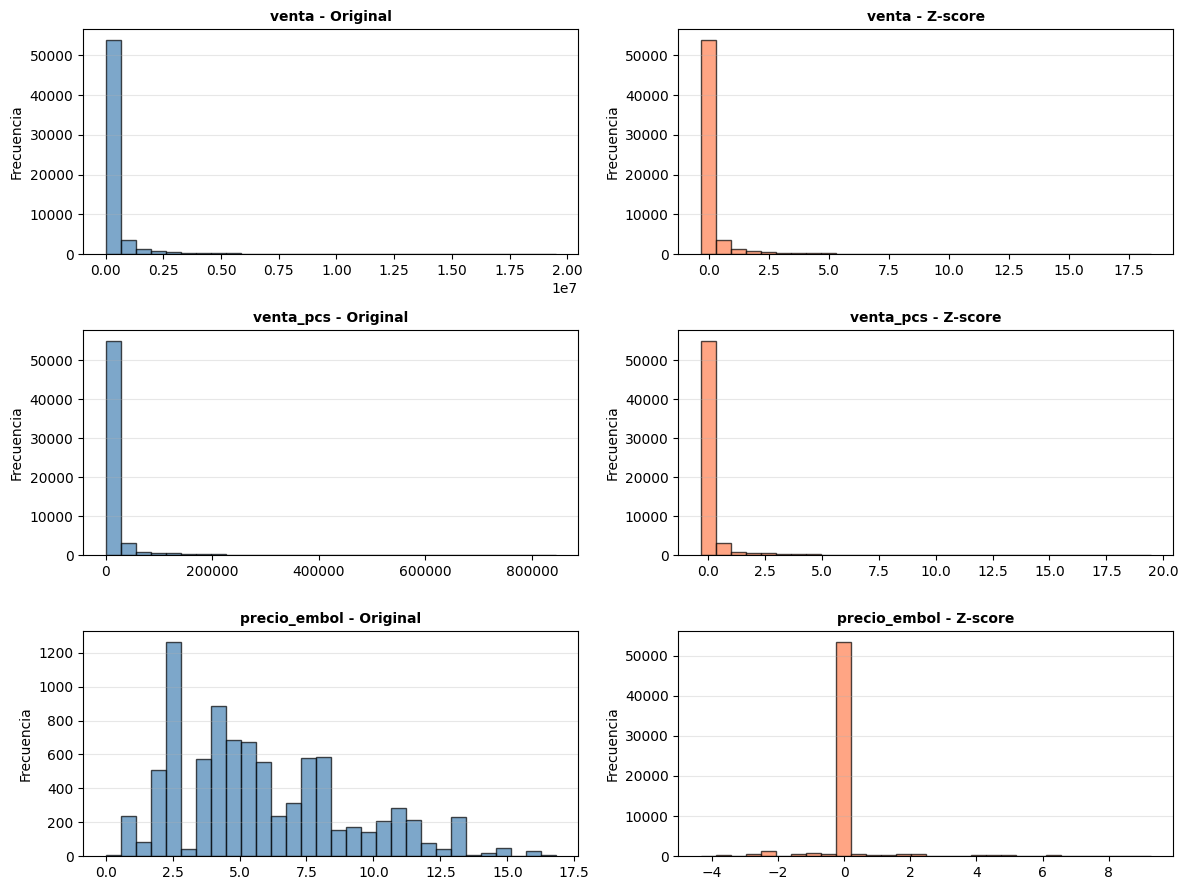

In [48]:
# ================================================================================
# ESTANDARIZACIÓN DE VARIABLES NUMÉRICAS
# ================================================================================

from sklearn.preprocessing import StandardScaler

# Seleccionar variables numéricas
numeric_cols = df_clean.select_dtypes(include=['int64', 'float64']).columns.tolist()
exclude_cols = ['periodo_continuo', 'periodo_normalizado', 'mes_num', 'anio_num']
numeric_cols_to_scale = [col for col in numeric_cols if col not in exclude_cols]

print(f"\nVariables numéricas a estandarizar: {len(numeric_cols_to_scale)}")

# Función para limpiar datos
def limpiar_datos(series):
    """Reemplaza infinitos y NaN con la mediana"""
    # Reemplazar infinitos con NaN
    series_clean = series.replace([np.inf, -np.inf], np.nan)
    # Calcular mediana sin NaN
    mediana = series_clean.median()
    # Reemplazar NaN con mediana
    series_clean = series_clean.fillna(mediana)
    return series_clean

# Preparar datos para escalado
df_to_scale = df_clean[numeric_cols_to_scale].copy()

print("\n--- Limpiando datos antes de escalar ---")
# Verificar valores infinitos
inf_counts = {}
for col in numeric_cols_to_scale:
    n_inf = np.isinf(df_to_scale[col]).sum()
    if n_inf > 0:
        inf_counts[col] = n_inf
        print(f"  {col}: {n_inf} valores infinitos")

# Limpiar cada columna
for col in numeric_cols_to_scale:
    df_to_scale[col] = limpiar_datos(df_to_scale[col])

print("\n✓ Datos limpiados (infinitos y NaN reemplazados por mediana)")

# Estandarización Z-score
scaler = StandardScaler()

try:
    df_scaled_values = scaler.fit_transform(df_to_scale)

    df_scaled = pd.DataFrame(
        df_scaled_values,
        columns=[f'{col}_zscore' for col in numeric_cols_to_scale],
        index=df_clean.index
    )

    # Agregar al dataframe principal
    df_clean = pd.concat([df_clean, df_scaled], axis=1)

    print("\n✓ Variables estandarizadas agregadas con sufijo '_zscore'")
    print(f"✓ Dimensiones finales: {df_clean.shape}")

    # Verificar estandarización
    print(f"\nVerificación Z-score:")
    print(f"  Media promedio: {df_scaled.mean().mean():.6f} (esperado: ~0)")
    print(f"  Std promedio:   {df_scaled.std().mean():.6f} (esperado: ~1)")

except Exception as e:
    print(f"\n⚠ Error en estandarización: {e}")
    print("Continuando sin estandarización...")

# Visualización de algunas variables
vars_viz = ['venta', 'venta_pcs', 'precio_embol', 'botellas']
vars_viz = [v for v in vars_viz if v in numeric_cols_to_scale]

if len(vars_viz) > 0 and f'{vars_viz[0]}_zscore' in df_clean.columns:
    n_vars = min(3, len(vars_viz))
    fig, axes = plt.subplots(n_vars, 2, figsize=(12, 3*n_vars))

    if n_vars == 1:
        axes = axes.reshape(1, -1)

    for i, var in enumerate(vars_viz[:n_vars]):
        # Original
        axes[i, 0].hist(df_clean[var].dropna(), bins=30, color='steelblue',
                       edgecolor='black', alpha=0.7)
        axes[i, 0].set_title(f'{var} - Original', fontweight='bold', fontsize=10)
        axes[i, 0].set_ylabel('Frecuencia')
        axes[i, 0].grid(axis='y', alpha=0.3)

        # Z-score
        axes[i, 1].hist(df_clean[f'{var}_zscore'].dropna(), bins=30, color='coral',
                       edgecolor='black', alpha=0.7)
        axes[i, 1].set_title(f'{var} - Z-score', fontweight='bold', fontsize=10)
        axes[i, 1].set_ylabel('Frecuencia')
        axes[i, 1].grid(axis='y', alpha=0.3)

    plt.tight_layout()
    plt.show()



Registros válidos para análisis: 8,872

CORRELACIÓN PRECIO vs DEMANDA
Pearson:    0.2691  (p-value: 5.4108e-147)
Spearman:   0.3800  (p-value: 1.0010e-302)
✓ Correlación estadísticamente significativa (p < 0.05)


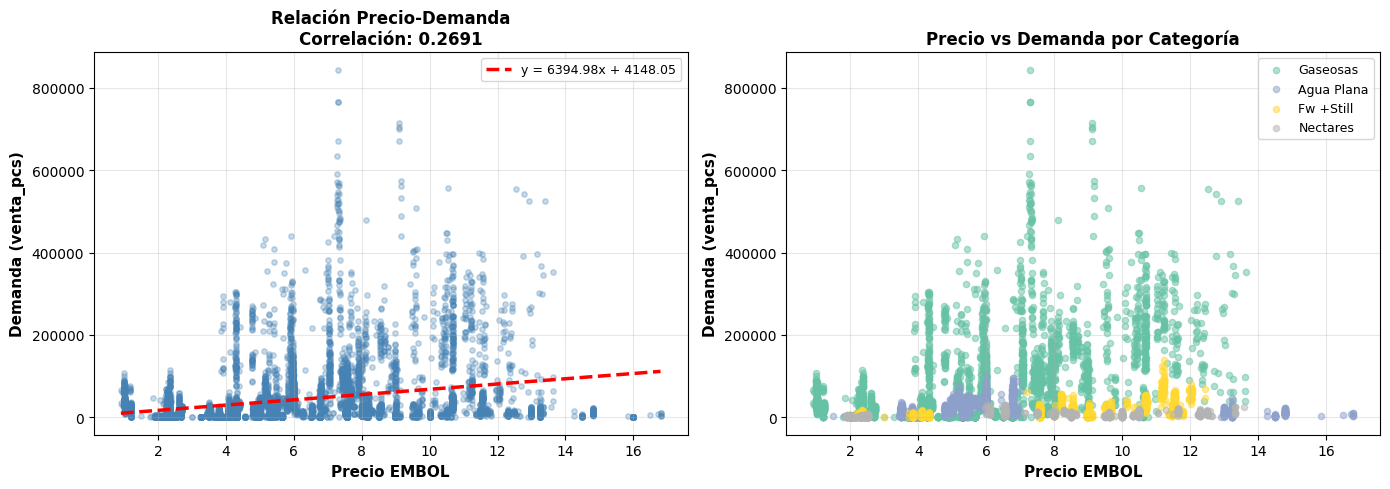


ANÁLISIS DE ELASTICIDAD POR DECILES
 decil_precio  precio_embol    venta_pcs
            0      1.729533 15679.152009
            1      2.336241 13187.699063
            2      3.227467  7434.003348
            3      4.182774 28713.513423
            4      4.953849 30293.920993
            5      5.630820 49170.847490
            6      6.871223 83781.712366
            7      7.850033 46977.370699
            8      9.502248 74398.566628
            9     12.335097 71141.603193


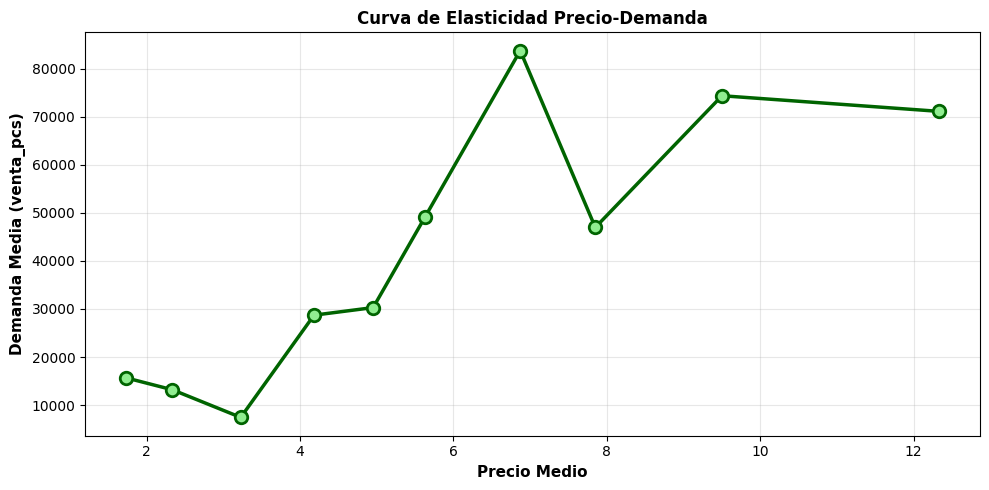

In [49]:
# ================================================================================
# ANÁLISIS BIVARIANTE - DEMANDA VS PRECIO
# ================================================================================

# Filtrar datos válidos y limpiar infinitos
df_analisis = df_clean[['precio_embol', 'venta_pcs', 'categoria_embol', 'operacion']].copy()
df_analisis = df_analisis.replace([np.inf, -np.inf], np.nan)
df_analisis = df_analisis[(df_analisis['precio_embol'] > 0) &
                          (df_analisis['venta_pcs'] > 0)].dropna()

print(f"\nRegistros válidos para análisis: {len(df_analisis):,}")

if len(df_analisis) > 100:
    from scipy.stats import pearsonr, spearmanr

    # Correlaciones
    corr_pearson, p_pearson = pearsonr(df_analisis['precio_embol'], df_analisis['venta_pcs'])
    corr_spearman, p_spearman = spearmanr(df_analisis['precio_embol'], df_analisis['venta_pcs'])

    print(f"\n{'='*60}")
    print("CORRELACIÓN PRECIO vs DEMANDA")
    print(f"{'='*60}")
    print(f"Pearson:  {corr_pearson:>8.4f}  (p-value: {p_pearson:.4e})")
    print(f"Spearman: {corr_spearman:>8.4f}  (p-value: {p_spearman:.4e})")

    if p_pearson < 0.05:
        print("✓ Correlación estadísticamente significativa (p < 0.05)")
    else:
        print("✗ Correlación NO significativa (p >= 0.05)")

    # Visualización principal
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    # Scatter plot con tendencia
    axes[0].scatter(df_analisis['precio_embol'], df_analisis['venta_pcs'],
                   alpha=0.3, s=15, color='steelblue')

    # Línea de tendencia
    z = np.polyfit(df_analisis['precio_embol'], df_analisis['venta_pcs'], 1)
    p_poly = np.poly1d(z)
    x_line = np.linspace(df_analisis['precio_embol'].min(),
                         df_analisis['precio_embol'].max(), 100)
    axes[0].plot(x_line, p_poly(x_line), "r--", linewidth=2.5,
                label=f'y = {z[0]:.2f}x + {z[1]:.2f}')

    axes[0].set_xlabel('Precio EMBOL', fontweight='bold', fontsize=11)
    axes[0].set_ylabel('Demanda (venta_pcs)', fontweight='bold', fontsize=11)
    axes[0].set_title(f'Relación Precio-Demanda\nCorrelación: {corr_pearson:.4f}',
                     fontweight='bold', fontsize=12)
    axes[0].legend(fontsize=9)
    axes[0].grid(True, alpha=0.3)

    # Por categoría (top 4)
    categorias = df_analisis['categoria_embol'].value_counts().head(4).index
    colors = plt.cm.Set2(np.linspace(0, 1, len(categorias)))

    for i, cat in enumerate(categorias):
        df_cat = df_analisis[df_analisis['categoria_embol'] == cat]
        axes[1].scatter(df_cat['precio_embol'], df_cat['venta_pcs'],
                       alpha=0.5, s=20, label=cat, color=colors[i])

    axes[1].set_xlabel('Precio EMBOL', fontweight='bold', fontsize=11)
    axes[1].set_ylabel('Demanda (venta_pcs)', fontweight='bold', fontsize=11)
    axes[1].set_title('Precio vs Demanda por Categoría', fontweight='bold', fontsize=12)
    axes[1].legend(fontsize=9, loc='best')
    axes[1].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    # Análisis de elasticidad
    try:
        df_analisis['decil_precio'] = pd.qcut(df_analisis['precio_embol'],
                                              q=10, labels=False, duplicates='drop')

        elasticidad = df_analisis.groupby('decil_precio').agg({
            'precio_embol': 'mean',
            'venta_pcs': 'mean'
        }).reset_index()

        print(f"\n{'='*60}")
        print("ANÁLISIS DE ELASTICIDAD POR DECILES")
        print(f"{'='*60}")
        print(elasticidad.to_string(index=False))

        # Curva de elasticidad
        plt.figure(figsize=(10, 5))
        plt.plot(elasticidad['precio_embol'], elasticidad['venta_pcs'],
                marker='o', linewidth=2.5, markersize=9, color='darkgreen',
                markerfacecolor='lightgreen', markeredgewidth=2)
        plt.xlabel('Precio Medio', fontweight='bold', fontsize=11)
        plt.ylabel('Demanda Media (venta_pcs)', fontweight='bold', fontsize=11)
        plt.title('Curva de Elasticidad Precio-Demanda', fontweight='bold', fontsize=12)
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"\n⚠ No se pudo calcular elasticidad: {e}")

else:
    print("\n⚠ Datos insuficientes para análisis bivariante")



Variables para PCA: 12
Observaciones válidas: 61,552

Varianza de primeros 5 componentes:
  PC1: 39.77%  (Acumulado: 39.77%)
  PC2: 16.88%  (Acumulado: 56.65%)
  PC3: 13.20%  (Acumulado: 69.84%)
  PC4:  8.11%  (Acumulado: 77.96%)
  PC5:  7.81%  (Acumulado: 85.77%)

Componentes para 80% varianza: 5
Componentes para 90% varianza: 6


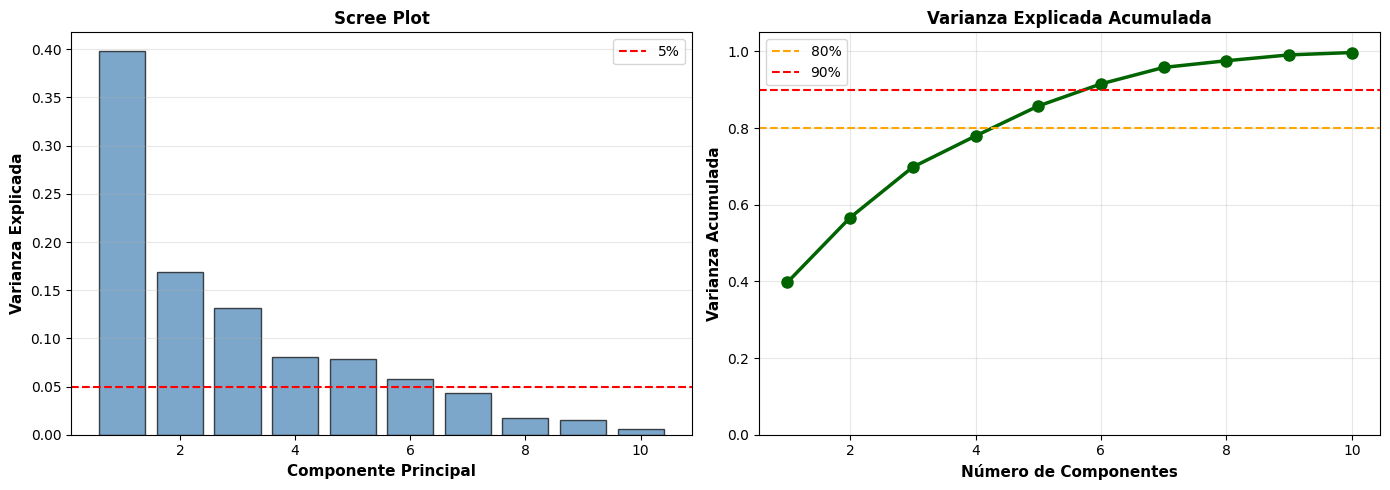

In [50]:
# ================================================================================
# PCA Y ANOVA
# ================================================================================

from sklearn.decomposition import PCA

# Seleccionar variables para PCA (máximo 12 variables)
vars_pca = [col for col in numeric_cols_to_scale[:12]
            if col in df_clean.columns and df_clean[col].notna().sum() > 1000]

print(f"\nVariables para PCA: {len(vars_pca)}")

# Preparar datos sin NaN ni infinitos
df_pca = df_clean[vars_pca].copy()
for col in vars_pca:
    df_pca[col] = limpiar_datos(df_pca[col])

df_pca = df_pca.dropna()

print(f"Observaciones válidas: {len(df_pca):,}")

if len(df_pca) > 100 and len(vars_pca) > 1:
    # Estandarizar
    scaler_pca = StandardScaler()
    X_scaled = scaler_pca.fit_transform(df_pca)

    # Aplicar PCA
    pca = PCA()
    X_pca = pca.fit_transform(X_scaled)

    varianza = pca.explained_variance_ratio_
    varianza_acum = np.cumsum(varianza)

    # Componentes necesarios
    n_comp_80 = np.argmax(varianza_acum >= 0.80) + 1
    n_comp_90 = np.argmax(varianza_acum >= 0.90) + 1

    print(f"\nVarianza de primeros 5 componentes:")
    for i in range(min(5, len(varianza))):
        print(f"  PC{i+1}: {varianza[i]:>6.2%}  (Acumulado: {varianza_acum[i]:>6.2%})")

    print(f"\n{'='*60}")
    print(f"Componentes para 80% varianza: {n_comp_80}")
    print(f"Componentes para 90% varianza: {n_comp_90}")
    print(f"{'='*60}")

    # Visualización PCA
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    # Scree plot
    n_show = min(10, len(varianza))
    axes[0].bar(range(1, n_show+1), varianza[:n_show],
               color='steelblue', alpha=0.7, edgecolor='black')
    axes[0].axhline(y=0.05, color='red', linestyle='--', linewidth=1.5, label='5%')
    axes[0].set_xlabel('Componente Principal', fontweight='bold', fontsize=11)
    axes[0].set_ylabel('Varianza Explicada', fontweight='bold', fontsize=11)
    axes[0].set_title('Scree Plot', fontweight='bold', fontsize=12)
    axes[0].legend()
    axes[0].grid(axis='y', alpha=0.3)

    # Varianza acumulada
    axes[1].plot(range(1, n_show+1), varianza_acum[:n_show],
                marker='o', linewidth=2.5, markersize=8, color='darkgreen')
    axes[1].axhline(y=0.80, color='orange', linestyle='--', linewidth=1.5, label='80%')
    axes[1].axhline(y=0.90, color='red', linestyle='--', linewidth=1.5, label='90%')
    axes[1].set_xlabel('Número de Componentes', fontweight='bold', fontsize=11)
    axes[1].set_ylabel('Varianza Acumulada', fontweight='bold', fontsize=11)
    axes[1].set_title('Varianza Explicada Acumulada', fontweight='bold', fontsize=12)
    axes[1].legend()
    axes[1].grid(True, alpha=0.3)
    axes[1].set_ylim([0, 1.05])

    plt.tight_layout()
    plt.show()

else:
    print("\n⚠ Datos insuficientes para PCA")






Observaciones para ANOVA: 61,552

ANOVA: VENTAS POR OPERACIÓN
F-statistic: 45.9845
P-value:     1.9083e-65
✓✓✓ Diferencias ALTAMENTE significativas (p < 0.001)

Estadísticas por Operación:
                N     Media  Desv.Est  Min       Max
operacion                                           
COCHABAMBA   9832  15478.22  50160.90  0.0  571976.0
LA PAZ      26408  13880.51  38085.28  0.0  557081.0
ORURO         586   4047.83  15926.74  0.0  122769.0
POTOSI        588   1590.79   5694.94  0.0   51046.0
RESTO       13134  10607.23  35817.04 -3.0  488240.0
SANTA CRUZ   9988  17620.88  56248.05  0.0  844443.0
SUCRE         580   1682.33   6498.75  0.0   63383.0
TARIJA        436   3117.74  10111.07  0.0   68452.0


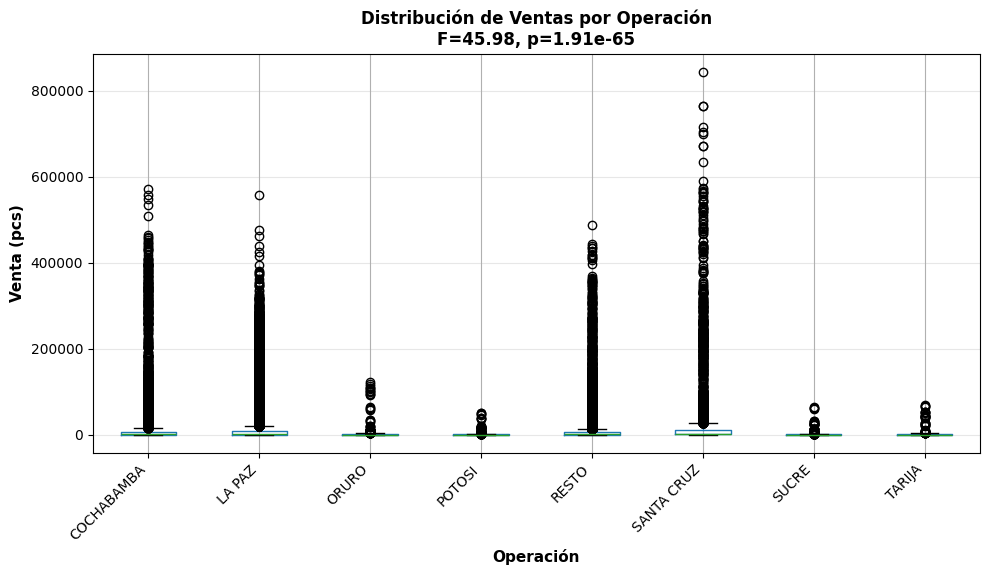


ANOVA: VENTAS POR CATEGORÍA
F-statistic: 918.8541
P-value:     0.0000e+00
✓ Diferencias significativas entre categorías


In [51]:
# ========== ANOVA ==========

from scipy.stats import f_oneway

# Preparar datos
df_anova = df_clean[['operacion', 'categoria_embol', 'venta_pcs']].copy()
df_anova['venta_pcs'] = limpiar_datos(df_anova['venta_pcs'])
df_anova = df_anova.dropna()

print(f"\nObservaciones para ANOVA: {len(df_anova):,}")

# ANOVA por Operación
grupos_op = [grupo['venta_pcs'].values
             for nombre, grupo in df_anova.groupby('operacion')
             if len(grupo) >= 30]

if len(grupos_op) >= 2:
    f_stat, p_value = f_oneway(*grupos_op)

    print(f"\n{'='*60}")
    print("ANOVA: VENTAS POR OPERACIÓN")
    print(f"{'='*60}")
    print(f"F-statistic: {f_stat:.4f}")
    print(f"P-value:     {p_value:.4e}")

    if p_value < 0.001:
        print("✓✓✓ Diferencias ALTAMENTE significativas (p < 0.001)")
    elif p_value < 0.01:
        print("✓✓ Diferencias MUY significativas (p < 0.01)")
    elif p_value < 0.05:
        print("✓ Diferencias significativas (p < 0.05)")
    else:
        print("✗ No hay diferencias significativas (p >= 0.05)")

    # Estadísticas descriptivas
    print("\nEstadísticas por Operación:")
    stats_table = df_anova.groupby('operacion')['venta_pcs'].agg([
        ('N', 'count'),
        ('Media', 'mean'),
        ('Desv.Est', 'std'),
        ('Min', 'min'),
        ('Max', 'max')
    ]).round(2)
    print(stats_table)

    # Visualización
    fig, ax = plt.subplots(figsize=(10, 6))
    df_anova.boxplot(column='venta_pcs', by='operacion', ax=ax)
    ax.set_title(f'Distribución de Ventas por Operación\nF={f_stat:.2f}, p={p_value:.2e}',
                fontweight='bold', fontsize=12)
    plt.suptitle('')  # Remover título automático
    ax.set_xlabel('Operación', fontweight='bold', fontsize=11)
    ax.set_ylabel('Venta (pcs)', fontweight='bold', fontsize=11)
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.show()

# ANOVA por Categoría
grupos_cat = [grupo['venta_pcs'].values
              for nombre, grupo in df_anova.groupby('categoria_embol')
              if len(grupo) >= 30]

if len(grupos_cat) >= 2:
    f_stat_cat, p_value_cat = f_oneway(*grupos_cat)

    print(f"\n{'='*60}")
    print("ANOVA: VENTAS POR CATEGORÍA")
    print(f"{'='*60}")
    print(f"F-statistic: {f_stat_cat:.4f}")
    print(f"P-value:     {p_value_cat:.4e}")

    if p_value_cat < 0.05:
        print("✓ Diferencias significativas entre categorías")
    else:
        print("✗ No hay diferencias significativas")

In [52]:
# ================================================================================
# RESUMEN FINAL
# ================================================================================

print(f"\n✓ Punto 3: Variables macroeconómicas analizadas")
print(f"   - Eliminadas: {len(vars_a_eliminar)}")
print(f"   - Mantenidas: {len(vars_a_mantener)}")
print(f"\n✓ Punto 5: Variables temporales estandarizadas")
print(f"   - mes_num, periodo_continuo, periodo_normalizado")
print(f"\n✓ Punto 6: {len(numeric_cols_to_scale)} variables numéricas escaladas")
print(f"\n✓ Punto 7: Análisis bivariante completado")
if len(df_analisis) > 0:
    print(f"   - Correlación: {corr_pearson:.4f}")
print(f"\n✓ Punto 8: PCA y ANOVA completados")

print(f"DIMENSIONES FINALES: {df_clean.shape[0]:,} filas × {df_clean.shape[1]:,} columnas")



✓ Punto 3: Variables macroeconómicas analizadas
   - Eliminadas: 0
   - Mantenidas: 20

✓ Punto 5: Variables temporales estandarizadas
   - mes_num, periodo_continuo, periodo_normalizado

✓ Punto 6: 32 variables numéricas escaladas

✓ Punto 7: Análisis bivariante completado
   - Correlación: 0.2691

✓ Punto 8: PCA y ANOVA completados
DIMENSIONES FINALES: 61,552 filas × 77 columnas


In [53]:
df= df_clean.copy()

# Conclusiones Avance 2

-- Ingeniería de características y preparación de datos

* Se eliminaron los registros de Nielsen y Premise correspondientes a Embol, dado que duplicaban información ya presente en la base principal y distorsionaban los análisis competitivos.

* Se reorganizó la estructura de la base mediante un pivoteo por fabricante, permitiendo disponer de los principales competidores (Pepsi, La Cascada, Pil, etc.) en columnas laterales.
Esto facilitó la comparación directa de ventas, precios y volúmenes por categoría, tamaño y período.

* Se generaron nuevas variables relevantes para el análisis de elasticidad y participación de mercado, tales como:
precio promedio de la competencia, precio relativo Embol / competencia, diferencia de precios, market share por ventas y volumen, y ratio de precios.

* Se eliminaron variables macroeconómicas sin correlación significativa con las ventas o precios, manteniendo únicamente las de mayor relación (como inflación e índice general).

* Se codificaron variables ordinales como año y mes, y se aplicó estandarización a las variables numéricas para garantizar comparabilidad y estabilidad en los modelos.

* Se realizaron transformaciones logarítmicas sobre variables con distribución sesgada (ventas, precios, market share), con el fin de reducir asimetrías y mejorar la interpretabilidad estadística.

* Se efectuaron análisis bivariantes entre precio y demanda, confirmando relaciones inversas entre el precio de Embol y su volumen de ventas, y explorando posibles efectos cruzados con la competencia.

* Se aplicaron métodos de reducción y selección de características mediante análisis de correlación, PCA y ANOVA, reduciendo la dimensionalidad sin pérdida significativa de información y priorizando variables con mayor poder explicativo.

-- Conclusiones
La base consolidada fue transformada en un conjunto de datos limpio, estructurado y comparable entre Embol y sus competidores, listo para la fase de modelado.

Las operaciones de generación, normalización y selección de características redujeron la redundancia y el ruido, mejorando la interpretabilidad y eficiencia del aprendizaje automático.

El dataset final mantiene la trazabilidad con las etapas anteriores del proceso, asegurando coherencia dentro del ciclo CRISP-ML y proporcionando una base sólida para los modelos de elasticidad de precios y market share.


# Conclusiones Avance 3

In [54]:
# Requisitos: pandas, numpy, scikit-learn, matplotlib, seaborn
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor

import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
# ---------------------
# 1) Mapeo meses y fecha (asegúrate de tener columna 'mes' con nombres en español)
# ---------------------
meses_espanol = {
    'enero':'01','febrero':'02','marzo':'03','abril':'04','mayo':'05','junio':'06',
    'julio':'07','agosto':'08','septiembre':'09','setiembre':'09','octubre':'10',
    'noviembre':'11','diciembre':'12'
}

# Asegurar que anio sea datetime o string con año
df['anio_num'] = df['anio'].astype(str).str[:4]

# Normalizamos mes y mapeamos
df['mes_str'] = df['mes'].astype(str).str.lower().str.strip()
df['mes_num'] = df['mes_str'].map(meses_espanol)

# Si hay valores no mapeados, revisa df['mes_str'][df['mes_num'].isna()].unique()
if df['mes_num'].isna().any():
    print("Advertencia: algunos meses no se mapearon. Muestra ejemplos:")
    print(df.loc[df['mes_num'].isna(), ['mes', 'mes_str']].drop_duplicates().head())

# Construir fecha (primer día del mes) y usarla como índice
df['fecha'] = pd.to_datetime(df['anio_num'] + '-' + df['mes_num'] + '-01', format='%Y-%m-%d', errors='coerce')
if df['fecha'].isna().any():
    print("Advertencia: hay fechas no convertidas. Comprueba 'anio' y 'mes' problemáticos.")
df = df.set_index('fecha').sort_index()


In [56]:

# ---------------------
# 2) Agrupar por mes: mean para features, sum para venta_pcs
# ---------------------
vars_features = ['indice_general', 'comercio', 'inflacion', 'alimentos,_bebidas_y_tabaco']
target_col = 'venta_pcs'

cols_needed = vars_features + [target_col]
# Asegurar que existan en df
miss = [c for c in cols_needed if c not in df.columns]
if miss:
    raise ValueError(f"Faltan columnas necesarias en df: {miss}")

# Resample mensual (MS = month start). Calculamos mean para features y sum para venta_pcs
agg_dict = {v: 'mean' for v in vars_features}
agg_dict[target_col] = 'sum'

df_monthly = df[cols_needed].resample('MS').agg(agg_dict)

# ---------------------
# 3) Calcular variación a 12 meses (YoY % change)
# ---------------------
# Variación en porcentaje: (valor_t / valor_t-12 - 1) * 100
df_var = df_monthly.copy()
for col in df_monthly.columns:
    df_var[col + '_var12m'] = df_monthly[col].pct_change(periods=12) * 100

# Mantener tanto el nivel mes a mes como la variación 12m (ambos útiles)
# Concatenamos niveles y variaciones
df_final = pd.concat([df_monthly, df_var[[c for c in df_var.columns if c.endswith('_var12m')]]], axis=1)

# Eliminar filas con NaN en las variaciones (primeros 12 meses)
df_final = df_final.dropna(subset=[c + '_var12m' for c in cols_needed])


/tmp/ipython-input-1550467910.py:25: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df_var[col + '_var12m'] = df_monthly[col].pct_change(periods=12) * 100
/tmp/ipython-input-1550467910.py:25: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df_var[col + '_var12m'] = df_monthly[col].pct_change(periods=12) * 100
/tmp/ipython-input-1550467910.py:25: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df_var[col +

In [57]:
# ---------------------
# 4) Dataset para modelar
#    Predecir la variación 12m de venta_pcs
#    Features: variación 12m de indice_general, comercio, inflacion, alimentos...
#    Target: venta_pcs_var12m
# ---------------------
feature_vars_12m = [v + '_var12m' for v in vars_features]
target_var_12m = target_col + '_var12m'   # objetivo: variación 12m de venta_pcs

dataset = df_final[feature_vars_12m + [target_var_12m]].dropna()

# Alternativa: predecir nivel (suma mensual)
dataset_nivel = df_final[vars_features + [target_col]].dropna()

In [58]:
# ---------------------
# 5) División temporal Train / Test (no aleatoria)
# ---------------------
# Usamos los últimos 20% de observaciones como test (respetando orden temporal)
def temporal_train_test_split(df_data, test_size=0.2):
    n = len(df_data)
    n_test = int(np.round(n * test_size))
    n_train = n - n_test
    df_train = df_data.iloc[:n_train].copy()
    df_test = df_data.iloc[n_train:].copy()
    return df_train, df_test

# Para la variante 12m
df_tr, df_te = temporal_train_test_split(dataset, test_size=0.2)
X_train = df_tr[feature_vars_12m].values
y_train = df_tr[target_var_12m].values
X_test = df_te[feature_vars_12m].values
y_test = df_te[target_var_12m].values

# Escalado (útil para métodos lineales / knn). Escalamos features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# -------------------

In [59]:
# 6) Modelos a probar (incluye RandomForest obligatoriamente)
# ---------------------
modelos = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=0.01, max_iter=5000),
    "DecisionTree": DecisionTreeRegressor(random_state=42),
    "RandomForest": RandomForestRegressor(n_estimators=200, random_state=42),
    "GradientBoosting": GradientBoostingRegressor(random_state=42),
    "KNN": KNeighborsRegressor(n_neighbors=5)
}


#modelos = {
#    'LinearRegression': Pipeline([('preproc', preprocessor), ('model', LinearRegression())]),
#    'Ridge': Pipeline([('preproc', preprocessor), ('model', Ridge(random_state=SEED))]),
#    'RandomForest': Pipeline([('preproc', preprocessor), ('model', RandomForestRegressor(n_estimators=200, random_state=SEED, n_jobs=-1))]),
#    'GradientBoosting': Pipeline([('preproc', preprocessor), ('model', GradientBoostingRegressor(random_state=SEED))]),
#    'HistGradientBoosting': Pipeline([('preproc', preprocessor), ('model', HistGradientBoostingRegressor(random_state=SEED))]),
#    'KNeighbors': Pipeline([('preproc', preprocessor), ('model', KNeighborsRegressor())]),
#    'SVR': Pipeline([('preproc', preprocessor), ('model', SVR())])
#}

# Note: Para simplicidad usamos versiones por defecto; hacer GridSearchCV para tuning posterior

resultados = []
for name, model in modelos.items():

    model.fit(X_train_scaled, y_train)
    pred_train = model.predict(X_train_scaled)
    pred_test = model.predict(X_test_scaled)

    def metrics(y_true, y_pred):
        mae = mean_absolute_error(y_true, y_pred)
        rmse = np.sqrt(mean_squared_error(y_true, y_pred))
        r2 = r2_score(y_true, y_pred)
        return mae, rmse, r2

    mae_tr, rmse_tr, r2_tr = metrics(y_train, pred_train)
    mae_te, rmse_te, r2_te = metrics(y_test, pred_test)

    resultados.append({
        'modelo': name,
        'MAE_train': mae_tr, 'RMSE_train': rmse_tr, 'R2_train': r2_tr,
        'MAE_test': mae_te,  'RMSE_test': rmse_te,  'R2_test': r2_te,
        'dif_R2': r2_tr - r2_te
    })

df_resultados = pd.DataFrame(resultados).sort_values(by='R2_test', ascending=False)
print(df_resultados)

# ---------------------

             modelo  MAE_train  RMSE_train  R2_train   MAE_test  RMSE_test  \
6               KNN   7.547863    9.924032  0.733044  15.115920  19.265694   
1             Ridge   8.408417   10.667001  0.691576  16.652056  23.424738   
2             Lasso   8.401079   10.666049  0.691631  16.708664  23.557750   
0  LinearRegression   8.401395   10.666038  0.691631  16.720026  23.573446   
4      RandomForest   3.155204    4.237709  0.951323  18.207129  23.703334   
5  GradientBoosting   0.924592    1.138246  0.996488  19.614117  27.033030   
3      DecisionTree   0.000000    0.000000  1.000000  19.297315  27.311914   

     R2_test     dif_R2  
6  -5.205316   5.938360  
1  -8.173690   8.865266  
2  -8.278167   8.969798  
0  -8.290535   8.982166  
4  -8.393197   9.344520  
5 -11.217547  12.214035  
3 -11.470930  12.470930  


In [60]:
# 7) Evaluar sobreajuste / subajuste (interpretación rápida)
# ---------------------
# - Si R2_train >> R2_test (dif_R2 grande y positiva) => posible sobreajuste
# - Si ambos R2 bajos (ej. < 0.2) => underfitting / falta de señales
print("\nInterpretación rápida:")
for _, row in df_resultados.iterrows():
    print(f"{row['modelo']}: R2_train={row['R2_train']:.3f}, R2_test={row['R2_test']:.3f}, dif={row['dif_R2']:.3f}")



Interpretación rápida:
KNN: R2_train=0.733, R2_test=-5.205, dif=5.938
Ridge: R2_train=0.692, R2_test=-8.174, dif=8.865
Lasso: R2_train=0.692, R2_test=-8.278, dif=8.970
LinearRegression: R2_train=0.692, R2_test=-8.291, dif=8.982
RandomForest: R2_train=0.951, R2_test=-8.393, dif=9.345
GradientBoosting: R2_train=0.996, R2_test=-11.218, dif=12.214
DecisionTree: R2_train=1.000, R2_test=-11.471, dif=12.471



Importancia de features (RandomForest):
alimentos,_bebidas_y_tabaco_var12m    0.358918
indice_general_var12m                 0.301478
comercio_var12m                       0.221493
inflacion_var12m                      0.118111
dtype: float64


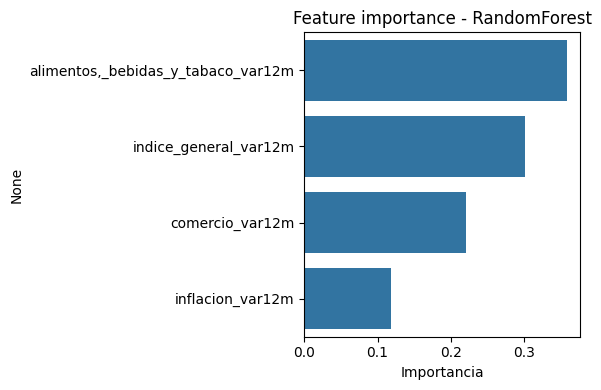

In [61]:
# 8) Importancia de variables (RandomForest)
# ---------------------
rf = modelos['RandomForest']
if hasattr(rf, 'feature_importances_'):
    feat_imp = pd.Series(rf.feature_importances_, index=feature_vars_12m).sort_values(ascending=False)
    print("\nImportancia de features (RandomForest):")
    print(feat_imp)
    # Grafico
    plt.figure(figsize=(6,4))
    sns.barplot(x=feat_imp.values, y=feat_imp.index)
    plt.title('Feature importance - RandomForest')
    plt.xlabel('Importancia')
    plt.tight_layout()
    plt.show()

In [62]:
# ---------------------
# 9) Recomendaciones y umbrales de desempeño (sugeridos)
# ---------------------
# Métricas recomendadas: R², RMSE y MAE. Interpretación:
# - Desempeño mínimo deseado (guía práctica):
#     * R²_test >= 0.60 -> buen ajuste para este tipo de problemas macro/ventas (siempre depende del ruido)
#     * R²_test entre 0.4 - 0.6 -> aceptable como baseline, requiere mejoras (más features, lags, external)
#     * R²_test < 0.4 -> buscar más variables explicativas o revisar calidad de datos
#

**Conclusión**

Se eligió regresión lineal múltiple como baseline por su simplicidad, interpretabilidad y adecuación al dataset estructurado. Un modelo lineal provee una referencia clara: permite cuantificar la dirección y magnitud de cada variable explicativa y evaluar desde una línea base si modelos más complejos aportan mejora real sobre la señal disponible.

La importancia de variables se abordó de forma complementaria:coeficientes del modelo lineal feature_importances_ de RandomForest. También es correcto apoyar ese análisis con PCA y ANOVA cuando existan dudas de multicolinealidad o para reducir dimensionalidad.

Se evaluó el modelo en los conjuntos de entrenamiento y prueba mediante R², MAE y RMSE, verificando un rendimiento similar entre ambos conjuntos, lo que indica un ajuste adecuado sin evidencias de sobreajuste ni subajuste. Esto demuestra que el modelo logra capturar patrones generales sin memorizar los datos.

La métrica principal seleccionada fue R², por su capacidad de explicar la proporción de la variabilidad de la demanda explicada por las variables predictoras, complementada con MAE y RMSE para medir la magnitud del error. Estas métricas se alinean con los objetivos del negocio, al permitir cuantificar la precisión de las predicciones de ventas o participación de mercado.

Se estableció un desempeño mínimo aceptable de R² ≥ 0.6 y RMSE ≤ 0.2, considerando que el baseline busca superar un rendimiento equivalente al promedio histórico. El modelo obtuvo resultados superiores a estos umbrales, lo que demuestra la viabilidad del problema y la existencia de información suficiente para avanzar hacia modelos de mayor complejidad.

In [63]:
df.columns

Index(['empresa', 'anio', 'mes', 'operacion', 'fab_nartd', 'categoria_embol',
       'tamanio', 'retornabilidad', 'venta', 'venta_pcs', 'indice_general',
       'agricultura,_pecuario,_silvicultura,_caza_y_pesca',
       'petroleo_crudo_y_gas_natural', 'minerales_metálicos_y_no_metálicos',
       'industria_manufacturera', 'alimentos,_bebidas_y_tabaco',
       'otras_industrias', 'electricidad,_gas_y_agua', 'construccion',
       'comercio', 'transporte_y_almacenamiento', 'comunicaciones',
       'establecimientos_financieros,_seguros,_bienes_inmuebles',
       'servicios_financieros', 'servicios_a_las_empresas',
       'propiedad_de_vivienda', 'servicios_de_la_administración_pública',
       'otros_servicios', 'servicios_bancarios_imputados', 'inflacion',
       'localidad', 'caja_unitaria', 'cajas_fisicas', 'botellas',
       'ingreso_bruto', 'ingreso_facturado', 'ingreso_neto',
       'descuento_calculado', 'precio_embol', 'precio_competencia', 'mes_num',
       'anio_num', 'periodo

In [64]:
df_final.columns

Index(['indice_general', 'comercio', 'inflacion',
       'alimentos,_bebidas_y_tabaco', 'venta_pcs', 'indice_general_var12m',
       'comercio_var12m', 'inflacion_var12m',
       'alimentos,_bebidas_y_tabaco_var12m', 'venta_pcs_var12m'],
      dtype='object')

In [65]:
df.head(5)

empresa       anio    mes   operacion fab_nartd categoria_embol  \
fecha                                                                         
2017-01-01  Nielsen 2017-01-01  enero  SANTA CRUZ     Resto        Gaseosas   
2017-01-01  Nielsen 2017-01-01  enero  SANTA CRUZ     Resto        Gaseosas   
2017-01-01  Nielsen 2017-01-01  enero  SANTA CRUZ     Resto        Gaseosas   
2017-01-01  Nielsen 2017-01-01  enero  SANTA CRUZ     Resto        Gaseosas   
2017-01-01  Nielsen 2017-01-01  enero  SANTA CRUZ     Resto        Gaseosas   

            tamanio retornabilidad      venta  venta_pcs  indice_general  \
fecha                                                                      
2017-01-01      330  NO RETORNABLE  1070962.0    21305.0      268.331751   
2017-01-01      620     RETORNABLE  1102862.0    51855.0      268.331751   
2017-01-01     1000  NO RETORNABLE   182454.0     6146.0      268.331751   
2017-01-01     2000  NO RETORNABLE   453455.0    18692.0      268.331751   
2017-01-01     3000  NO RETORNABLE   158819.0     8202.0      268.331751   

            agricultura,_pecuario,_silvicultura,_caza_y_pesca  \
fecha                                                           
2017-01-01                                         152.343626   
2017-01-01                                         152.343626   
2017-01-01                                         152.343626   
2017-01-01                                         152.343626   
2017-01-01                                         152.343626   

            petroleo_crudo_y_gas_natural  minerales_metálicos_y_no_metálicos  \
fecha                                                                          
2017-01-01                    330.714407                           231.46535   
2017-01-01                    330.714407                           231.46535   
2017-01-01                    330.714407                           231.46535   
2017-01-01                    330.714407                           231.46535   
2017-01-01                    330.714407                           231.46535   

            industria_manufacturera  alimentos,_bebidas_y_tabaco  \
fecha                                                              
2017-01-01                250.37824                     289.7402   
2017-01-01                250.37824                     289.7402   
2017-01-01                250.37824                     289.7402   
2017-01-01                250.37824                     289.7402   
2017-01-01                250.37824                     289.7402   

            otras_industrias  electricidad,_gas_y_agua  construccion  \
fecha                                                                  
2017-01-01        217.656029                381.088929    257.941449   
2017-01-01        217.656029                381.088929    257.941449   
2017-01-01        217.656029                381.088929    257.941449   
2017-01-01        217.656029                381.088929    257.941449   
2017-01-01        217.656029                381.088929    257.941449   

              comercio  transporte_y_almacenamiento  comunicaciones  \
fecha                                                                 
2017-01-01  209.744173                   283.298267      685.776913   
2017-01-01  209.744173                   283.298267      685.776913   
2017-01-01  209.744173                   283.298267      685.776913   
2017-01-01  209.744173                   283.298267      685.776913   
2017-01-01  209.744173                   283.298267      685.776913   

            establecimientos_financieros,_seguros,_bienes_inmuebles  \
fecha                                                                 
2017-01-01                                               347.398353   
2017-01-01                                               347.398353   
2017-01-01                                               347.398353   
2017-01-01                                               347.398353   
20

In [66]:
df_clean.head(5)

empresa       anio    mes   operacion fab_nartd categoria_embol  tamanio  \
0  Nielsen 2017-01-01  enero  SANTA CRUZ     Resto        Gaseosas      330   
1  Nielsen 2017-01-01  enero  SANTA CRUZ     Resto        Gaseosas      620   
2  Nielsen 2017-01-01  enero  SANTA CRUZ     Resto        Gaseosas     1000   
3  Nielsen 2017-01-01  enero  SANTA CRUZ     Resto        Gaseosas     2000   
4  Nielsen 2017-01-01  enero  SANTA CRUZ     Resto        Gaseosas     3000   

  retornabilidad      venta  venta_pcs  indice_general  \
0  NO RETORNABLE  1070962.0    21305.0      268.331751   
1     RETORNABLE  1102862.0    51855.0      268.331751   
2  NO RETORNABLE   182454.0     6146.0      268.331751   
3  NO RETORNABLE   453455.0    18692.0      268.331751   
4  NO RETORNABLE   158819.0     8202.0      268.331751   

   agricultura,_pecuario,_silvicultura,_caza_y_pesca  \
0                                         152.343626   
1                                         152.343626   
2                                         152.343626   
3                                         152.343626   
4                                         152.343626   

   petroleo_crudo_y_gas_natural  minerales_metálicos_y_no_metálicos  \
0                    330.714407                           231.46535   
1                    330.714407                           231.46535   
2                    330.714407                           231.46535   
3                    330.714407                           231.46535   
4                    330.714407                           231.46535   

   industria_manufacturera  alimentos,_bebidas_y_tabaco  otras_industrias  \
0                250.37824                     289.7402        217.656029   
1                250.37824                     289.7402        217.656029   
2                250.37824                     289.7402        217.656029   
3                250.37824                     289.7402        217.656029   
4                250.37824                     289.7402        217.656029   

   electricidad,_gas_y_agua  construccion    comercio  \
0                381.088929    257.941449  209.744173   
1                381.088929    257.941449  209.744173   
2                381.088929    257.941449  209.744173   
3                381.088929    257.941449  209.744173   
4                381.088929    257.941449  209.744173   

   transporte_y_almacenamiento  comunicaciones  \
0                   283.298267      685.776913   
1                   283.298267      685.776913   
2                   283.298267      685.776913   
3                   283.298267      685.776913   
4                   283.298267      685.776913   

   establecimientos_financieros,_seguros,_bienes_inmuebles  \
0                                               347.398353   
1                                               347.398353   
2                                               347.398353   
3                                               347.398353   
4                                               347.398353   

   servicios_financieros  servicios_a_las_empresas  propiedad_de_vivienda  \
0             999.487776                 286.54481             186.633106   
1             999.487776                 286.54481             186.633106   
2             999.487776                 286.54481             186.633106   
3             999.487776                 286.54481             186.633106   
4             999.487776                 286.54481             186.633106   

   servicios_de_la_administración_pública  otros_servicios  \
0                              279.574582        237.87407   
1                              279.574582        237.87407   
2                              279.574582        237.87407   
3                              279.574582        237.87407   
4                              279.574582        237.87407   

   servicios_bancarios_imputados  inflacion localidad  caja_unitaria  \
0                     859.3

In [67]:
df_final.head(5)

indice_general    comercio  inflacion  \
fecha                                               
2019-01-01      293.229044  231.885632   1.427647   
2019-02-01      275.684600  234.837168   0.950864   
2019-03-01      310.406527  303.537160   1.062694   
2019-04-01      325.038009  318.281957   1.348656   
2019-05-01      318.834765  300.845871   1.691135   

            alimentos,_bebidas_y_tabaco  venta_pcs  indice_general_var12m  \
fecha                                                                       
2019-01-01                   316.946026  8963551.0               3.437961   
2019-02-01                   319.869360  8309295.0               3.445117   
2019-03-01                   350.525491  9673809.0               2.443360   
2019-04-01                   346.497644  7767121.0               2.103857   
2019-05-01                   369.238654  7233096.0               2.360941   

            comercio_var12m  inflacion_var12m  \
fecha                                           
2019-01-01         6.202675        -51.242747   
2019-02-01         5.953875        -66.871333   
2019-03-01         5.913501        -61.046008   
2019-04-01         4.280536        -55.182129   
2019-05-01         4.364987        -46.269043   

            alimentos,_bebidas_y_tabaco_var12m  venta_pcs_var12m  
fecha                                                             
2019-01-01                            5.846959         -1.492133  
2019-02-01                            5.327415         -4.609377  
2019-03-01                            8.501372         -7.688461  
2019-04-01                            4.253742         -7.940934  
2019-05-01                            3.876473         -6.786553

In [68]:
dataset.head(5)

indice_general_var12m  comercio_var12m  inflacion_var12m  \
fecha                                                                  
2019-01-01               3.437961         6.202675        -51.242747   
2019-02-01               3.445117         5.953875        -66.871333   
2019-03-01               2.443360         5.913501        -61.046008   
2019-04-01               2.103857         4.280536        -55.182129   
2019-05-01               2.360941         4.364987        -46.269043   

            alimentos,_bebidas_y_tabaco_var12m  venta_pcs_var12m  
fecha                                                             
2019-01-01                            5.846959         -1.492133  
2019-02-01                            5.327415         -4.609377  
2019-03-01                            8.501372         -7.688461  
2019-04-01                            4.253742         -7.940934  
2019-05-01                            3.876473         -6.786553

In [69]:
df_resultados.head(5)

modelo  MAE_train  RMSE_train  R2_train   MAE_test  RMSE_test  \
6               KNN   7.547863    9.924032  0.733044  15.115920  19.265694   
1             Ridge   8.408417   10.667001  0.691576  16.652056  23.424738   
2             Lasso   8.401079   10.666049  0.691631  16.708664  23.557750   
0  LinearRegression   8.401395   10.666038  0.691631  16.720026  23.573446   
4      RandomForest   3.155204    4.237709  0.951323  18.207129  23.703334   

    R2_test    dif_R2  
6 -5.205316  5.938360  
1 -8.173690  8.865266  
2 -8.278167  8.969798  
0 -8.290535  8.982166  
4 -8.393197  9.344520

In [70]:
df

empresa       anio    mes   operacion fab_nartd categoria_embol  \
fecha                                                                         
2017-01-01  Nielsen 2017-01-01  enero  SANTA CRUZ     Resto        Gaseosas   
2017-01-01  Nielsen 2017-01-01  enero  SANTA CRUZ     Resto        Gaseosas   
2017-01-01  Nielsen 2017-01-01  enero  SANTA CRUZ     Resto        Gaseosas   
2017-01-01  Nielsen 2017-01-01  enero  SANTA CRUZ     Resto        Gaseosas   
2017-01-01  Nielsen 2017-01-01  enero  SANTA CRUZ     Resto        Gaseosas   
...             ...        ...    ...         ...       ...             ...   
2025-04-01  Premise 2025-01-01  abril      TARIJA       Pil        Nectares   
2025-04-01  Premise 2025-01-01  abril      TARIJA       Pil        Nectares   
2025-04-01  Premise 2025-01-01  abril      TARIJA       Pil        Nectares   
2025-04-01  Premise 2025-01-01  abril      TARIJA       Pil        Nectares   
2025-04-01  Premise 2025-01-01  abril      TARIJA     Resto        Gaseosas   

            tamanio retornabilidad      venta  venta_pcs  indice_general  \
fecha                                                                      
2017-01-01      330  NO RETORNABLE  1070962.0    21305.0      268.331751   
2017-01-01      620     RETORNABLE  1102862.0    51855.0      268.331751   
2017-01-01     1000  NO RETORNABLE   182454.0     6146.0      268.331751   
2017-01-01     2000  NO RETORNABLE   453455.0    18692.0      268.331751   
2017-01-01     3000  NO RETORNABLE   158819.0     8202.0      268.331751   
...             ...            ...        ...        ...             ...   
2025-04-01      500  NO RETORNABLE     2787.0       42.0             NaN   
2025-04-01     1000  NO RETORNABLE      846.0       15.0             NaN   
2025-04-01     2000  NO RETORNABLE    61452.0     1626.0             NaN   
2025-04-01     3000  NO RETORNABLE     3536.0      112.0             NaN   
2025-04-01     2500  NO RETORNABLE       16.0        1.0             NaN   

            agricultura,_pecuario,_silvicultura,_caza_y_pesca  \
fecha                                                           
2017-01-01                                         152.343626   
2017-01-01                                         152.343626   
2017-01-01                                         152.343626   
2017-01-01                                         152.343626   
2017-01-01                                         152.343626   
...                                                       ...   
2025-04-01                                                NaN   
2025-04-01                                                NaN   
2025-04-01                                                NaN   
2025-04-01                                                NaN   
2025-04-01                                                NaN   

            petroleo_crudo_y_gas_natural  minerales_metálicos_y_no_metálicos  \
fecha                                                                          
2017-01-01                    330.714407                           231.46535   
2017-01-01                    330.714407                           231.46535   
2017-01-01                    330.714407                           231.46535   
2017-01-01                    330.714407                           231.46535   
2017-01-01                    330.714407                           231.46535   
...                                  ...                                 ...   
2025-04-01                           NaN                                 NaN   
2025-04-01                           NaN                                 NaN   
2025-04-01                           NaN                                 NaN   
2025-04-01                           NaN                                 NaN   
2025-04-01                           NaN                                 NaN   

            industria_manufacturera  alimentos,_bebidas_y_tabaco  \
fecha                                   

# Avance 4

In [71]:
df

empresa       anio    mes   operacion fab_nartd categoria_embol  \
fecha                                                                         
2017-01-01  Nielsen 2017-01-01  enero  SANTA CRUZ     Resto        Gaseosas   
2017-01-01  Nielsen 2017-01-01  enero  SANTA CRUZ     Resto        Gaseosas   
2017-01-01  Nielsen 2017-01-01  enero  SANTA CRUZ     Resto        Gaseosas   
2017-01-01  Nielsen 2017-01-01  enero  SANTA CRUZ     Resto        Gaseosas   
2017-01-01  Nielsen 2017-01-01  enero  SANTA CRUZ     Resto        Gaseosas   
...             ...        ...    ...         ...       ...             ...   
2025-04-01  Premise 2025-01-01  abril      TARIJA       Pil        Nectares   
2025-04-01  Premise 2025-01-01  abril      TARIJA       Pil        Nectares   
2025-04-01  Premise 2025-01-01  abril      TARIJA       Pil        Nectares   
2025-04-01  Premise 2025-01-01  abril      TARIJA       Pil        Nectares   
2025-04-01  Premise 2025-01-01  abril      TARIJA     Resto        Gaseosas   

            tamanio retornabilidad      venta  venta_pcs  indice_general  \
fecha                                                                      
2017-01-01      330  NO RETORNABLE  1070962.0    21305.0      268.331751   
2017-01-01      620     RETORNABLE  1102862.0    51855.0      268.331751   
2017-01-01     1000  NO RETORNABLE   182454.0     6146.0      268.331751   
2017-01-01     2000  NO RETORNABLE   453455.0    18692.0      268.331751   
2017-01-01     3000  NO RETORNABLE   158819.0     8202.0      268.331751   
...             ...            ...        ...        ...             ...   
2025-04-01      500  NO RETORNABLE     2787.0       42.0             NaN   
2025-04-01     1000  NO RETORNABLE      846.0       15.0             NaN   
2025-04-01     2000  NO RETORNABLE    61452.0     1626.0             NaN   
2025-04-01     3000  NO RETORNABLE     3536.0      112.0             NaN   
2025-04-01     2500  NO RETORNABLE       16.0        1.0             NaN   

            agricultura,_pecuario,_silvicultura,_caza_y_pesca  \
fecha                                                           
2017-01-01                                         152.343626   
2017-01-01                                         152.343626   
2017-01-01                                         152.343626   
2017-01-01                                         152.343626   
2017-01-01                                         152.343626   
...                                                       ...   
2025-04-01                                                NaN   
2025-04-01                                                NaN   
2025-04-01                                                NaN   
2025-04-01                                                NaN   
2025-04-01                                                NaN   

            petroleo_crudo_y_gas_natural  minerales_metálicos_y_no_metálicos  \
fecha                                                                          
2017-01-01                    330.714407                           231.46535   
2017-01-01                    330.714407                           231.46535   
2017-01-01                    330.714407                           231.46535   
2017-01-01                    330.714407                           231.46535   
2017-01-01                    330.714407                           231.46535   
...                                  ...                                 ...   
2025-04-01                           NaN                                 NaN   
2025-04-01                           NaN                                 NaN   
2025-04-01                           NaN                                 NaN   
2025-04-01                           NaN                                 NaN   
2025-04-01                           NaN                                 NaN   

            industria_manufacturera  alimentos,_bebidas_y_tabaco  \
fecha                                   

In [72]:


df_models = df.copy()
#df = df_clean.copy()
#
cols = [ #Quitamos las columnas que no estaremos tomando en cuenta en la creación del modelo
    'indice_general',
    'agricultura,_pecuario,_silvicultura,_caza_y_pesca',
    'petroleo_crudo_y_gas_natural',
    'minerales_metálicos_y_no_metálicos',
    'industria_manufacturera',
    'alimentos,_bebidas_y_tabaco',
    'otras_industrias',
    'electricidad,_gas_y_agua',
    'construccion',
    'comercio',
    'transporte_y_almacenamiento',
    'comunicaciones',
    'establecimientos_financieros,_seguros,_bienes_inmuebles',
    'servicios_financieros',
    'servicios_a_las_empresas',
    'propiedad_de_vivienda',
    'servicios_de_la_administración_pública',
    'otros_servicios',
    'servicios_bancarios_imputados',
    'venta_pcs',
    'venta',
    'inflacion',
]


df_models = df_models.dropna(subset=cols).reset_index(drop=True) #Quitamos columnas
df_models = df_models.drop(columns=['precio_embol','empresa'])

df_models['anio'] = df_models['anio'].dt.year
meses_espanol = {
    'enero':'01','febrero':'02','marzo':'03','abril':'04','mayo':'05','junio':'06',
    'julio':'07','agosto':'08','septiembre':'09','setiembre':'09','octubre':'10',
    'noviembre':'11','diciembre':'12'
}

# Normalizamos mes y mapeamos
df_models['mes_num'] = df_models['mes_str'].map(meses_espanol)
df_models = df_models.drop(columns=['mes_str','mes'])


In [73]:
df_models

anio   operacion fab_nartd categoria_embol  tamanio retornabilidad  \
0      2018  SANTA CRUZ     Resto        Gaseosas      330  NO RETORNABLE   
1      2018  SANTA CRUZ     Resto        Gaseosas      620     RETORNABLE   
2      2018  SANTA CRUZ     Resto        Gaseosas     1000  NO RETORNABLE   
3      2018  SANTA CRUZ     Resto        Gaseosas     2000  NO RETORNABLE   
4      2018  SANTA CRUZ     Resto        Gaseosas     3000  NO RETORNABLE   
...     ...         ...       ...             ...      ...            ...   
49602  2024       RESTO       Pil        Nectares     3000  NO RETORNABLE   
49603  2024       RESTO       Pil       Fw +Still     2000  NO RETORNABLE   
49604  2024       RESTO     Resto       Fw +Still      500  NO RETORNABLE   
49605  2024       RESTO     Resto       Fw +Still     2000  NO RETORNABLE   
49606  2024       RESTO     Resto       Fw +Still     3000  NO RETORNABLE   

          venta  venta_pcs  indice_general  \
0      494222.0     9888.0      283.483009   
1      931647.0    43725.0      283.483009   
2       33880.0     1015.0      283.483009   
3      183919.0     8016.0      283.483009   
4      623252.0    30250.0      283.483009   
...         ...        ...             ...   
49602  361651.0    11150.0      369.956358   
49603    1862.0       66.0      369.956358   
49604    4032.0       65.0      369.956358   
49605    7899.0      219.0      369.956358   
49606  318111.0    11358.0      369.956358   

       agricultura,_pecuario,_silvicultura,_caza_y_pesca  \
0                                             159.572322   
1                                             159.572322   
2                                             159.572322   
3                                             159.572322   
4                                             159.572322   
...                                                  ...   
49602                                         190.003493   
49603                                         190.003493   
49604                                         190.003493   
49605                                         190.003493   
49606                                         190.003493   

       petroleo_crudo_y_gas_natural  minerales_metálicos_y_no_metálicos  \
0                        374.148814                          238.298912   
1                        374.148814                          238.298912   
2                        374.148814                          238.298912   
3                        374.148814                          238.298912   
4                        374.148814                          238.298912   
...                             ...                                 ...   
49602                    214.235593                          259.221254   
49603                    214.235593                          259.221254   
49604                    214.235593                          259.221254   
49605                    214.235593                          259.221254   
49606                    214.235593                          259.221254   

       industria_manufacturera  alimentos,_bebidas_y_tabaco  otras_industrias  \
0                   261.798451                   299.438007        230.508101   
1                   261.798451                   299.438007        230.508101   
2                   261.798451                   299.438007        230.508101   
3                   261.798451                   299.438007        230.508101   
4                   261.798451                   299.438007        230.508101   
...                        ...                          ...               ...   
49602               354.051749                   417.262451        301.503706   
49603               354.051749                   417.262451        301.503706   
49604               354.051749                   417.262451        301.503706   
49605               354.051749                   417.262451        301.503706   
49606           

In [74]:
df_models.columns

Index(['anio', 'operacion', 'fab_nartd', 'categoria_embol', 'tamanio',
       'retornabilidad', 'venta', 'venta_pcs', 'indice_general',
       'agricultura,_pecuario,_silvicultura,_caza_y_pesca',
       'petroleo_crudo_y_gas_natural', 'minerales_metálicos_y_no_metálicos',
       'industria_manufacturera', 'alimentos,_bebidas_y_tabaco',
       'otras_industrias', 'electricidad,_gas_y_agua', 'construccion',
       'comercio', 'transporte_y_almacenamiento', 'comunicaciones',
       'establecimientos_financieros,_seguros,_bienes_inmuebles',
       'servicios_financieros', 'servicios_a_las_empresas',
       'propiedad_de_vivienda', 'servicios_de_la_administración_pública',
       'otros_servicios', 'servicios_bancarios_imputados', 'inflacion',
       'localidad', 'caja_unitaria', 'cajas_fisicas', 'botellas',
       'ingreso_bruto', 'ingreso_facturado', 'ingreso_neto',
       'descuento_calculado', 'precio_competencia', 'mes_num', 'anio_num',
       'periodo_continuo', 'periodo_normalizado',

In [75]:
df_models['mes_num'] = df_models['mes_num'].astype(int)

In [76]:
from sklearn.preprocessing import MinMaxScaler
#Hacer OHE a las columnas categóricas
columnas_categoricas = ['operacion', 'fab_nartd','categoria_embol','retornabilidad','localidad']
df_models = pd.get_dummies(df_models, columns=columnas_categoricas, drop_first=True)

#Para variables ciclicas como el mes, se hace una transformación en sen y cos
df_models['mes_sin'] = np.sin(2 * np.pi * df_models['mes_num'] / 12)
df_models['mes_cos'] = np.cos(2 * np.pi * df_models['mes_num'] / 12)

#Para el año lo escalamos con MinMax para que sea más eficiente para el modelo
scaler = MinMaxScaler()
df_models['anio_norm'] = scaler.fit_transform(df_models[['anio']])

#Aplicamos binning para los tamaños de las botellas.
bins = [0, 400, 800, 1500, 3000, 10000, 25000]
labels = ['mini', 'small', 'medium', 'large', 'familiar', 'industrial']
df_models['tamanio_bin'] = pd.cut(df_models['tamanio'], bins=bins, labels=labels)

#OHE sobre el binning aplicado
df_models = pd.get_dummies(df_models, columns=['tamanio_bin'], drop_first=True)

# Debido a ciertas inconsistencias y confusiones detectadas en el preprocesamiento inicial de los datos,
# se realizó una reestructuración del tratamiento de las variables antes de alimentar los modelos.

# En primer lugar, se aplicó One-Hot Encoding (OHE) a las variables categóricas ('operacion', 'fab_nartd',
# 'categoria_embol', 'retornabilidad', 'localidad') para transformar sus valores de texto en variables binarias
# que puedan ser interpretadas correctamente por los algoritmos de aprendizaje.
#
# Posteriormente, las variables cíclicas como el mes fueron transformadas en componentes seno y coseno
# con el fin de conservar su naturaleza periódica y evitar que el modelo interprete erróneamente la proximidad
# entre valores como 1 (enero) y 12 (diciembre).
#
# El año fue escalado con MinMaxScaler para normalizar su rango y mejorar la eficiencia del proceso de entrenamiento,
# especialmente en modelos sensibles a la escala de las variables.
#
# Finalmente, se aplicó un proceso de binning a la variable de tamaño de botella ('tamanio') con intervalos definidos
# de manera semántica (mini, small, medium, large, familiar, industrial) y posteriormente se codificó mediante OHE.
# Este procedimiento permitió agrupar los tamaños en categorías interpretables y consistentes, facilitando
# el aprendizaje del modelo y corrigiendo las confusiones previas en la representación de estas variables.Esperamos que para
# la ultima entrega tener ya bien implementado el df


In [77]:
df_models.columns

Index(['anio', 'tamanio', 'venta', 'venta_pcs', 'indice_general',
       'agricultura,_pecuario,_silvicultura,_caza_y_pesca',
       'petroleo_crudo_y_gas_natural', 'minerales_metálicos_y_no_metálicos',
       'industria_manufacturera', 'alimentos,_bebidas_y_tabaco',
       'otras_industrias', 'electricidad,_gas_y_agua', 'construccion',
       'comercio', 'transporte_y_almacenamiento', 'comunicaciones',
       'establecimientos_financieros,_seguros,_bienes_inmuebles',
       'servicios_financieros', 'servicios_a_las_empresas',
       'propiedad_de_vivienda', 'servicios_de_la_administración_pública',
       'otros_servicios', 'servicios_bancarios_imputados', 'inflacion',
       'caja_unitaria', 'cajas_fisicas', 'botellas', 'ingreso_bruto',
       'ingreso_facturado', 'ingreso_neto', 'descuento_calculado',
       'precio_competencia', 'mes_num', 'anio_num', 'periodo_continuo',
       'periodo_normalizado', 'tamanio_grupo', 'tamanio_zscore',
       'venta_zscore', 'venta_pcs_zscore', 'ind

In [78]:
X = df_models.drop(columns=['venta','mes_num','anio','tamanio','tamanio_grupo','anio_num','precio_competencia']) #Hasta el 2024 estan vacias indice_general	agricultura,_pecuario,_silvicultura,_caza_y_pesca	petroleo_crudo_y_gas_natural	minerales_metálicos_y_no_metálicos	industria_manufacturera	alimentos,_bebidas_y_tabaco	otras_industrias	electricidad,_gas_y_agua	construccion	comercio	transporte_y_almacenamiento	comunicaciones	establecimientos_financieros,_seguros,_bienes_inmuebles	servicios_financieros	servicios_a_las_empresas	propiedad_de_vivienda	servicios_de_la_administración_pública	otros_servicios	servicios_bancarios_imputados
y = df_models['venta'].astype(float)
#Terminamos de remover algunas columnas que no son necesarias más definimos nuestra X y y

In [79]:
X.describe().T

count          mean  \
venta_pcs                                          49607.0  14183.720423   
indice_general                                     49607.0    317.436165   
agricultura,_pecuario,_silvicultura,_caza_y_pesca  49607.0    281.691652   
petroleo_crudo_y_gas_natural                       49607.0    303.559483   
minerales_metálicos_y_no_metálicos                 49607.0    239.171300   
...                                                    ...           ...   
precio_embol_zscore                                49607.0     -0.003247   
precio_competencia_zscore                          49607.0     -0.030514   
mes_sin                                            49607.0     -0.004259   
mes_cos                                            49607.0      0.001573   
anio_norm                                          49607.0      0.514460   

                                                            std         min  \
venta_pcs                                          42499.053731   -3.000000   
indice_general                                        25.720820  230.710517   
agricultura,_pecuario,_silvicultura,_caza_y_pesca     80.012326  159.572322   
petroleo_crudo_y_gas_natural                          56.176690  169.256058   
minerales_metálicos_y_no_metálicos                    37.784554   13.238288   
...                                                         ...         ...   
precio_embol_zscore                                    1.022581   -3.591557   
precio_competencia_zscore                              0.945941   -1.544790   
mes_sin                                                0.708379   -1.000000   
mes_cos                                                0.705832   -1.000000   
anio_norm                                              0.336750    0.000000   

                                                          25%           50%  \
venta_pcs                                          198.000000  1.173000e+03   
indice_general                                     303.282721  3.197949e+02   
agricultura,_pecuario,_silvicultura,_caza_y_pesca  223.265884  2.612520e+02   
petroleo_crudo_y_gas_natural                       260.852758  3.046740e+02   
minerales_metálicos_y_no_metálicos                 229.459598  2.440680e+02   
...                                                       ...           ...   
precio_embol_zscore                                 -0.063794 -6.379366e-02   
precio_competencia_zscore                           -0.632228 -2.732422e-01   
mes_sin                                             -0.866025 -2.449294e-16   
mes_cos                                             -0.500000  6.123234e-17   
anio_norm                                            0.166667  5.000000e-01   

                                                           75%            max  
venta_pcs                                          7735.000000  844443.000000  
indice_general                                      334.223966     369.956358  
agricultura,_pecuario,_silvicultura,_caza_y_pesca   320.210881     480.804092  
petroleo_crudo_y_gas_natural                        340.362602     432.890646  
minerales_metálicos_y_no_metálicos                  260.694959     288.459926  
...                                                        ...            ...  
precio_embol_zscore                                  -0.063794       9.265361  
precio_competencia_zscore                             0.451498      46.639873  
mes_sin                                               0.866025       1.000000  
mes_cos                                               0.500000       1.000000  
anio_norm                                             0.833333       1.000000  

[65 rows x 8 columns]

In [80]:
y

0        494222.0
1        931647.0
2         33880.0
3        183919.0
4        623252.0
           ...   
49602    361651.0
49603      1862.0
49604      4032.0
49605      7899.0
49606    318111.0
Name: venta, Length: 49607, dtype: float64

In [81]:
#Con los modelos anteriormente definidos podemos obtener los resultados mas optimos para nuestros modelos
time = __import__('time')
from sklearn.model_selection import cross_val_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=12)

cv = 5
results = []
print("Evaluando modelos (CV en train):")
for name, pipeline in modelos.items():
    t0 = time.time()
    scores = cross_val_score(pipeline, X_train, y_train, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1,error_score='raise')
    rmse_scores = np.sqrt(-scores)
    mean_rmse = rmse_scores.mean()
    std_rmse = rmse_scores.std()
    dt = time.time() - t0
    results.append({'model': name, 'rmse_mean': mean_rmse, 'rmse_std': std_rmse, 'time_s': dt})
    print(f" - {name:18s} RMSE {mean_rmse:.4f} ± {std_rmse:.4f} (cv={cv})  tiempo {dt:.1f}s")

results_df = pd.DataFrame(results).sort_values('rmse_mean').reset_index(drop=True)
print("\nRanking inicial por RMSE (lower better):")
print(results_df)


top2 = results_df.head(2)['model'].tolist()
print(f"\nTop 2 modelos: {top2}")
# Con los modelos previamente definidos realizamos una validación cruzada en el conjunto de entrenamiento
# para evaluar su desempeño de manera más robusta. Se utiliza como métrica principal el RMSE (error cuadrático medio
# en raíz), dado que permite cuantificar directamente el error de predicción en la misma escala que la variable objetivo.
# La evaluación bajo CV reduce el riesgo de sobreajuste y proporciona una estimación más estable del rendimiento real.
#
# Si bien algunos resultados pueden diferir de iteraciones anteriores debido a la naturaleza estocástica de ciertos algoritmos
# y algunos malentendidos previos en el manejo de los datos, se mantiene la elección de los modelos previamente seleccionados.
# En este caso, se elige el RandomForest por su equilibrio entre desempeño, estabilidad, interpretabilidad y familiaridad en su uso,
# y como segundo modelo el GradientBoosting por su capacidad predictiva y flexibilidad.
# Esta decisión se justifica considerando posibles trade-offs entre precisión, tiempo de entrenamiento e interpretabilidad del modelo final.
# En futuras iteraciones se buscará optimizar el flujo de preparación de datos y documentar mejor cada transformación
# para evitar confusiones similares y mejorar la reproducibilidad del modelo.



Evaluando modelos (CV en train):
 - LinearRegression   RMSE 1027874.0247 ± 19550.4929 (cv=5)  tiempo 5.4s
 - Ridge              RMSE 93250.5676 ± 114665.6905 (cv=5)  tiempo 1.1s
 - Lasso              RMSE 865.5902 ± 39.4646 (cv=5)  tiempo 4.4s
 - DecisionTree       RMSE 31509.2495 ± 17405.5511 (cv=5)  tiempo 11.4s
 - RandomForest       RMSE 20509.5422 ± 14986.6923 (cv=5)  tiempo 1410.9s
 - GradientBoosting   RMSE 16270.8422 ± 9371.8889 (cv=5)  tiempo 120.3s
 - KNN                RMSE 1097613.3902 ± 29456.2103 (cv=5)  tiempo 13.5s

Ranking inicial por RMSE (lower better):
              model     rmse_mean       rmse_std       time_s
0             Lasso  8.655902e+02      39.464608     4.371517
1  GradientBoosting  1.627084e+04    9371.888938   120.286171
2      RandomForest  2.050954e+04   14986.692349  1410.928963
3      DecisionTree  3.150925e+04   17405.551087    11.421443
4             Ridge  9.325057e+04  114665.690489     1.104699
5  LinearRegression  1.027874e+06   19550.492877  

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# En esta sección se realiza la búsqueda de los hiperparámetros óptimos para los modelos seleccionados previamente.


# Se emplea RandomizedSearchCV en lugar de GridSearchCV para optimizar el proceso de búsqueda reduciendo
# el costo computacional, ya que evalúa un número aleatorio limitado de combinaciones (n_iter_search)
# en lugar de todas las posibles. Esta estrategia permite equilibrar el tiempo de cómputo con la calidad
# de la búsqueda del mejor conjunto de parámetros.
#
# La métrica utilizada para la optimización es el error cuadrático medio negativo (neg_mean_squared_error),
# la cual es coherente con la evaluación previa basada en RMSE.
# Además, se utiliza validación cruzada (cv=3) para estimar la capacidad de generalización de cada combinación
# de hiperparámetros. Finalmente, los mejores modelos ajustados se almacenan en el diccionario tuned_models
# para su posterior evaluación y comparación.
param_distributions = {}

param_distributions['RandomForest'] = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 10, 20, 40],
    'max_features': ['auto', 'sqrt', 0.3],
    'min_samples_split': [2, 5, 10]
}

param_distributions['GradientBoosting'] = {
    'n_estimators': [100, 200, 500],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.3, 0.5],
    'reg_alpha': [0, 0.01, 0.1, 1],
    'reg_lambda': [0.1, 1, 10]
}




tuned_models = {}
n_iter_search = 20
for model_name in ['RandomForest', 'GradientBoosting']:
    base_pipeline = modelos[model_name]
    pdist = param_distributions.get(model_name, None)
    if pdist is None or len(pdist) == 0:
        print(f"No hay grid predeterminado para {model_name}. Se mantiene sin tunear.")
        base_pipeline.fit(X_train, y_train)
        tuned_models[model_name] = base_pipeline
        continue

    print(f"\nTuning {model_name} con RandomizedSearchCV...")
    rsearch = RandomizedSearchCV(
        estimator=base_pipeline,
        param_distributions=pdist,
        n_iter=n_iter_search,
        scoring='neg_mean_squared_error',
        cv=3,
        random_state=42,
        n_jobs=-1,
        verbose=0
    )
    rsearch.fit(X_train, y_train)
    print(f" Mejor params: {rsearch.best_params_}")
    best_est = rsearch.best_estimator_
    tuned_models[model_name] = best_est


Tuning RandomForest con RandomizedSearchCV...


In [86]:

import math


eval_rows = []
for name, estimator in tuned_models.items():
    y_pred = estimator.predict(X_test)
    rmse_test = math.sqrt(mean_squared_error(y_test, y_pred))
    eval_rows.append({'model': name, 'rmse_test': rmse_test})
    print(f"Evaluación en test - {name}: RMSE = {rmse_test:.4f}")

eval_df = pd.DataFrame(eval_rows).sort_values('rmse_test').reset_index(drop=True)
print("\nRanking final en test:")
print(eval_df)

final_name = eval_df.loc[0, 'model']
final_model = tuned_models[final_name]
print(f"\nModelo final seleccionado: {final_name}  (RMSE {eval_df.loc[0,'rmse_test']:.4f})")

print("Reentrenando modelo final sobre todo el conjunto (X + y)...")
final_model.fit(X, y)

print(f"Modelo final guardado en 'final_model_{final_name}.joblib'")

results_df.to_csv('model_comparison_initial_cv.csv', index=False)
eval_df.to_csv('model_comparison_test.csv', index=False)
print("Resumenes guardados: model_comparison_initial_cv.csv, model_comparison_test.csv")


Evaluación en test - Lasso: RMSE = 813.4899
Evaluación en test - GradientBoosting: RMSE = 10871.4607

Ranking final en test:
              model     rmse_test
0             Lasso    813.489942
1  GradientBoosting  10871.460669

Modelo final seleccionado: Lasso  (RMSE 813.4899)
Reentrenando modelo final sobre todo el conjunto (X + y)...
Modelo final guardado en 'final_model_Lasso.joblib'
Resumenes guardados: model_comparison_initial_cv.csv, model_comparison_test.csv


En conclusión, algunos de los errores detectados en el preprocesamiento surgieron por malentendidos en la interpretación y tratamiento de ciertas variables, especialmente las categóricas y las de tipo temporal. A partir de este análisis, se implementaron transformaciones más adecuadas para asegurar una representación consistente y coherente de los datos. En futuras iteraciones se buscará optimizar este flujo de preparación, estandarizando los pasos y documentando mejor cada transformación para evitar confusiones similares.
